# Group 4 Notebook: Machine Learning and Reasoning for Health

This notebook has been collaboratively created by Group 4 for the Machine Learning and Reasoning for Health course.

Contained within are comprehensive steps undertaken for data preprocessing.

The content is organized systematically. Please refer to the table of contents as the notebook comprises extensive code, which might seem overwhelming at first. Initially, data is queried per variable, followed by actions like outlier detection and further data refinement.

Numerical variables are initially loaded and processed within the 'Imputation and Outliers' section. Subsequently, categorical variables are loaded and incorporated within the 'Admission Characteristics' section.

The final section showcases various plots we've generated to visualize insights gleaned from the processed data.


**Authors Chi Him Ng, Dheeraj Varghese and
Danila Rusinkiewicz**


In [ ]:
#sets the project id
PROJECT_ID = "tactile-acrobat-405220" #@param {type:"string"}

# Provide your credentials to access the AmsterdamUMCdb dataset on Google BigQuery
Authenticate your credentials with Google Cloud Platform and set your default Google Cloud Project ID as an environment variable for running query jobs. Run the cell, follow the generated link, and paste the verification code in the provided box:

In [ ]:
import os
from google.colab import auth

#sets dateset
DATASET_PROJECT_ID = 'amsterdamumcdb'
DATASET_ID = 'version1_0_2'
LOCATION = 'eu'

#all libraries check this environment variable, so set it:
os.environ["GOOGLE_CLOUD_PROJECT"] = PROJECT_ID

auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# file_path = '/content/drive/MyDrive/MLRH/data.csv'

# # Read the CSV file into a Pandas DataFrame
# result_105 = pd.read_csv(file_path)

result_105

NameError: ignored

# Enable data table display

Colab includes the `google.colab.data_table` package that can be used to display Pandas dataframes as an interactive data table (limitations: `max_rows = 20000`, `max_columns = 20`). This is especially useful when exploring the  tables or dictionary from AmsterdamUMCdb. It can be enabled with:

In [ ]:
%load_ext google.colab.data_table

## Set the default query job configuration for google-cloud-bigquery client

# Querying variables, Imputation and Outlier removal

### Necessary stuff

In [ ]:
import pandas as pd

config_gbq = {'query':
          {'defaultDataset': {
              "datasetId": DATASET_ID,
              "projectId": DATASET_PROJECT_ID
              },
           'Location': LOCATION}
           }

In [ ]:
#get the amsterdamumcdb package from PiPy repository for use in Colab
!pip install amsterdamumcdb
import amsterdamumcdb as adb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.5/273.5 kB 2.1 MB/s eta 0:00:00


### Creatinine

In [ ]:
# creat = pd.read_gbq(
#     '''
# WITH baseline AS (
#     SELECT n.admissionid,
#     MIN(n.value) AS baseline_creatinine
#     FROM numericitems n
#     LEFT JOIN admissions a ON
#         n.admissionid = a.admissionid
#     WHERE itemid IN (
#         6836, --Kreatinine µmol/l (erroneously documented as µmol)
#         9941, --Kreatinine (bloed) µmol/l
#         14216 --KREAT enzym. (bloed) µmol/l
#     ) AND
#     --search upto 1 year before admission
#     (n.measuredat - a.admittedat)/(60*60*1000) > -(365*24) AND (n.measuredat - a.admittedat) < (24*60*60*1000)
#     GROUP BY n.admissionid
# ),
#     creat AS (
#         SELECT n.admissionid,
#         MAX(n.value) AS max_creatinine,
#         MIN(n.value) AS min_creatinine,
#         MAX(n.value) - MIN(n.value) AS creatinine_difference
#         FROM numericitems n
#         LEFT JOIN admissions a ON
#             n.admissionid = a.admissionid
#         WHERE itemid IN (
#             6836, --Kreatinine µmol/l (erroneously documented as µmol)
#             9941, --Kreatinine (bloed) µmol/l
#             14216 --KREAT enzym. (bloed) µmol/l
#         )
#         AND (n.measuredat - a.admittedat) > 0
#         GROUP BY n.admissionid
#     ),
#     # max_creat AS (
#     #     SELECT n.admissionid,
#     #     MAX(n.value) AS max_creatinine_7days,
#     #     MIN(n.value) AS min_creatinine_7days,
#     #     MAX(n.value) - MIN(n.value) AS creatinine_difference_7days
#     #     FROM numericitems n
#     #     LEFT JOIN admissions a ON
#     #         n.admissionid = a.admissionid
#     #     WHERE itemid IN (
#     #         6836, --Kreatinine µmol/l (erroneously documented as µmol)
#     #         9941, --Kreatinine (bloed) µmol/l
#     #         14216 --KREAT enzym. (bloed) µmol/l
#     #     )
#     #     AND (n.measuredat - a.admittedat) > 0  AND (n.measuredat - a.admittedat) < (7*24*60*60*1000)
#     #     GROUP BY n.admissionid
#     # ),
#     # max_creat_48 AS (
#     #     SELECT n.admissionid,
#     #     MAX(n.value) AS max_creatinine_2days,
#     #     MIN(n.value) AS min_creatinine_2days,
#     #     MAX(n.value) - MIN(n.value) AS creatinine_difference_2days
#     #     FROM numericitems n
#     #     LEFT JOIN admissions a ON
#     #         n.admissionid = a.admissionid
#     #     WHERE itemid IN (
#     #         6836, --Kreatinine µmol/l (erroneously documented as µmol)
#     #         9941, --Kreatinine (bloed) µmol/l
#     #         14216 --KREAT enzym. (bloed) µmol/l
#     #     )
#     #     AND (n.measuredat - a.admittedat) > 0
#     #     AND (n.measuredat - a.admittedat) < (2*24*60*60*1000)
#     #     GROUP BY n.admissionid
#     # ),
#     # max_creat_24 AS (
#     #     SELECT n.admissionid,
#     #     MAX(n.value) AS max_creatinine_1days,
#     #     MIN(n.value) AS min_creatinine_1days,
#     #     MAX(n.value) - MIN(n.value) AS creatinine_difference_1days
#     #     FROM numericitems n
#     #     LEFT JOIN admissions a ON
#     #         n.admissionid = a.admissionid
#     #     WHERE itemid IN (
#     #         6836, --Kreatinine µmol/l (erroneously documented as µmol)
#     #         9941, --Kreatinine (bloed) µmol/l
#     #         14216 --KREAT enzym. (bloed) µmol/l
#     #     )
#     #     AND (n.measuredat - a.admittedat) > 0
#     #     AND (n.measuredat - a.admittedat) < (1*24*60*60*1000)
#     #     GROUP BY n.admissionid
#     # ),
# time AS (
#     SELECT
#         n.admissionid,
#         MAX(CASE WHEN n.measuredat - a.admittedat < (7 * 24 * 60 * 60 * 1000) THEN n.value END) AS max_creatinine_7days,
#         MIN(CASE WHEN n.measuredat - a.admittedat < (7 * 24 * 60 * 60 * 1000) THEN n.value END) AS min_creatinine_7days,
#         MAX(CASE WHEN n.measuredat - a.admittedat < (2 * 24 * 60 * 60 * 1000) THEN n.value END) AS max_creatinine_2days,
#         MIN(CASE WHEN n.measuredat - a.admittedat < (2 * 24 * 60 * 60 * 1000) THEN n.value END) AS min_creatinine_2days,
#         MAX(CASE WHEN n.measuredat - a.admittedat < (1 * 24 * 60 * 60 * 1000) THEN n.value END) AS max_creatinine_1days,
#         MIN(CASE WHEN n.measuredat - a.admittedat < (1 * 24 * 60 * 60 * 1000) THEN n.value END) AS min_creatinine_1days,



#         MAX(CASE WHEN n.measuredat - a.admittedat < (1 * 6 * 60 * 60 * 1000) THEN n.value END) AS max_creatinine_6hours,
#         MIN(CASE WHEN n.measuredat - a.admittedat < (1 * 6 * 60 * 60 * 1000) THEN n.value END) AS min_creatinine_6hours,
#         MAX(CASE WHEN n.measuredat - a.admittedat < (1 * 6 * 60 * 60 * 1000) THEN n.value END) -
#             MIN(CASE WHEN n.measuredat - a.admittedat < (1 * 6 * 60 * 60 * 1000) THEN n.value END) AS creatinine_difference_6hours,



#         MAX(n.value) AS max_creatinine_all_measurements,
#         MIN(n.value) AS min_creatinine_all_measurements,
#         MAX(n.value) - MIN(n.value) AS creatinine_difference_all_measurements,
#         MAX(CASE WHEN n.measuredat - a.admittedat < (7 * 24 * 60 * 60 * 1000) THEN n.value END) -
#             MIN(CASE WHEN n.measuredat - a.admittedat < (7 * 24 * 60 * 60 * 1000) THEN n.value END) AS creatinine_difference_7days,
#         MAX(CASE WHEN n.measuredat - a.admittedat < (2 * 24 * 60 * 60 * 1000) THEN n.value END) -
#             MIN(CASE WHEN n.measuredat - a.admittedat < (2 * 24 * 60 * 60 * 1000) THEN n.value END) AS creatinine_difference_2days,
#         MAX(CASE WHEN n.measuredat - a.admittedat < (1 * 24 * 60 * 60 * 1000) THEN n.value END) -
#             MIN(CASE WHEN n.measuredat - a.admittedat < (1 * 24 * 60 * 60 * 1000) THEN n.value END) AS creatinine_difference_1days
#     FROM
#         numericitems n
#     LEFT JOIN
#         admissions a ON n.admissionid = a.admissionid
#     WHERE
#         n.itemid IN (6836, 9941, 14216)
#         AND (n.measuredat - a.admittedat) <= 1000*60*60*24
#         AND (n.measuredat - a.admittedat) >= -(1000*60*30)
#     GROUP BY
#         n.admissionid
# ),

#   included_patients AS (
#     SELECT
#         b.admissionid
#     FROM baseline b
#     LEFT JOIN admissions a ON b.admissionid = a.admissionid
#     LEFT JOIN time t ON b.admissionid = t.admissionid
#     WHERE NOT (
#         b.baseline_creatinine < 260
#         AND (a.dischargedat - a.admittedat) > (48 * 60 * 60 * 1000)
#     )
# )
# SELECT
#     n.admissionid,
#     a.admittedat,
#     n.itemid,
#     n.item,
#     n.value,
#     n.measuredat,
#     n.registeredby,
#     CASE
#         WHEN n.registeredby NOT LIKE '%Systeem%' THEN TRUE
#         ELSE FALSE
#     END AS manual_entry,
#     (n.measuredat - a.admittedat)/(1000*60) AS time,
#     b.baseline_creatinine,
#     t.max_creatinine_all_measurements,
#     t.min_creatinine_all_measurements,
#     --t.creatinine_difference_all_measurements,
#     --t.max_creatinine_7days,
#     --t.min_creatinine_7days,
#     --t.creatinine_difference_7days,
#     CASE
#       WHEN baseline_creatinine > 0
#           AND t.max_creatinine_all_measurements / baseline_creatinine BETWEEN 1.5 AND 1.9
#           OR max_creatinine_all_measurements - baseline_creatinine >= 26.5
#       THEN 'Stage 1'

#       WHEN baseline_creatinine > 0
#           AND t.max_creatinine_all_measurements / baseline_creatinine BETWEEN 2.0 AND 2.9
#       THEN 'Stage 2'

#       WHEN baseline_creatinine > 0
#           AND (t.max_creatinine_all_measurements / baseline_creatinine > 3
#           OR max_creatinine_all_measurements >= 354
#           AND max_creatinine_all_measurements - baseline_creatinine >= 44)
#       THEN 'Stage 3'

#       ELSE 'No AKI'
#     END AS acute_renal_failure,

#     t.max_creatinine_6hours,
#     t.min_creatinine_6hours,
#     --t.creatinine_difference_6hours,

#     --t.max_creatinine_2days,
#     --t.min_creatinine_2days,
#     --t.creatinine_difference_2days,
#     --t.max_creatinine_1days,
#     --t.min_creatinine_1days,
#     --t.creatinine_difference_1days,
#     CASE
#         WHEN baseline_creatinine > 0 AND t.max_creatinine_6hours/baseline_creatinine > 1.5 THEN TRUE
#         --WHEN max_creatinine_2days >= 354 AND max_creatinine_6hours - baseline_creatinine >= 44 THEN TRUE
#         ELSE FALSE
#     END AS acute_renal_failure_48,
# FROM numericitems n
# LEFT JOIN admissions a ON
#     n.admissionid = a.admissionid
# LEFT JOIN baseline b ON
#     n.admissionid = b.admissionid
# LEFT JOIN creat c ON n.admissionid = c.admissionid
# LEFT JOIN time t ON n.admissionid = t.admissionid
# # LEFT JOIN max_creat m ON n.admissionid = m.admissionid
# # LEFT JOIN max_creat_48 l ON n.admissionid = l.admissionid
# # LEFT JOIN max_creat_24 f ON n.admissionid = f.admissionid
# WHERE n.itemid IN (6836, 9941, 14216)
#   --  AND n.admissionid BETWEEN 550 AND 600
#     AND (n.measuredat - a.admittedat) <= 1000*60*60*24 AND (n.measuredat - a.admittedat) >= -(1000*60*30)
#     AND NOT EXISTS (
#         SELECT 1
#         FROM included_patients ep
#         WHERE ep.admissionid = n.admissionid
#     )
#     ''', configuration=config_gbq
# )


In [ ]:
creat = pd.read_gbq(
    '''
    WITH baseline AS (
    SELECT n.admissionid,
    MIN(n.value) AS baseline_creatinine
    FROM numericitems n
    LEFT JOIN admissions a ON
        n.admissionid = a.admissionid
    WHERE itemid IN (
        6836, --Kreatinine µmol/l (erroneously documented as µmol)
        9941, --Kreatinine (bloed) µmol/l
        14216 --KREAT enzym. (bloed) µmol/l
    ) AND
    --search upto 1 year before admission
    (n.measuredat - a.admittedat)/(60*60*1000) > -(365*24) AND (n.measuredat - a.admittedat) < (24*60*60*1000)
    GROUP BY n.admissionid
),
max_creat AS (
    SELECT n.admissionid,
    MAX(n.value) AS max_creatinine_7days
    FROM numericitems n
    LEFT JOIN admissions a ON
        n.admissionid = a.admissionid
    WHERE itemid IN (
        6836, --Kreatinine µmol/l (erroneously documented as µmol)
        9941, --Kreatinine (bloed) µmol/l
        14216 --KREAT enzym. (bloed) µmol/l
    ) AND
    --within 7 days of admission
    (n.measuredat - a.admittedat) > 0 AND (n.measuredat - a.admittedat) < (7*24*60*60*1000)
    GROUP BY n.admissionid
)
SELECT
    n.admissionid,
    n.measuredat,
    a.admittedat,
    a.dischargedat,
    n.itemid,
    n.item,
    n.value,
    n.registeredby,
    CASE
        WHEN n.registeredby NOT LIKE '%Systeem%' THEN TRUE
        ELSE FALSE
    END AS manual_entry,
    (n.measuredat - a.admittedat)/(1000*60) AS time,
    b.baseline_creatinine,
    m.max_creatinine_7days,
    CASE
        -- AKI definition: 1.5 fold increase:
        WHEN baseline_creatinine > 0 AND m.max_creatinine_7days/baseline_creatinine > 1.5 THEN TRUE
        -- AKI definition: increase to >= 354 umol/l AND at least 44 umol/l increase:
        WHEN max_creatinine_7days >= 354 AND max_creatinine_7days - baseline_creatinine >= 44 THEN TRUE
        ELSE FALSE
    END AS acute_renal_failure
FROM numericitems n
LEFT JOIN admissions a ON
    n.admissionid = a.admissionid
LEFT JOIN baseline b ON -- get the baseline kreat (before admission)
    n.admissionid = b.admissionid
LEFT JOIN max_creat m ON --get the highest within a week of admission
    n.admissionid = m.admissionid
WHERE n.itemid IN (
    6836, --Kreatinine µmol/l (erroneously documented as µmol)
    9941, --Kreatinine (bloed) µmol/l
    14216 --KREAT enzym. (bloed) µmol/l
    )
-- measurements within 24 hours of ICU stay (use 30 minutes before admission to allow for time differences):
--AND (n.measuredat - a.admittedat) < 24*60*60*1000 AND (n.measuredat - a.admittedat) >= 0
AND (a.dischargedat - a.admittedat) > (48 * 60 * 60 * 1000)
---AND b.baseline_creatinine < 300
    ''', configuration=config_gbq
)

In [ ]:
creat = pd.read_gbq(
    '''
    SELECT
        n.admissionid
        , n.itemid
        ,  a.admittedat
        ,  a.dischargedat
        , n.value
        , n.unitid
        , n.measuredat
        , n.registeredby
    FROM numericitems_validated n
    LEFT JOIN admissions a ON
        n.admissionid = a.admissionid
    WHERE itemid IN (
            6836, --Kreatinine µmol/l (erroneously documented as µmol)
            9941, --Kreatinine (bloed) µmol/l
            14216 --KREAT enzym. (bloed) µmol/l
    )
    --AND (a.dischargedat - a.admittedat) > (48 * 60 * 60 * 1000)
    ''', configuration=config_gbq
)

NameError: ignored

In [ ]:

unique_admission_ids = creat['admissionid'].nunique()
print("Number of unique admission IDs:", unique_admission_ids)

Number of unique admission IDs: 22935


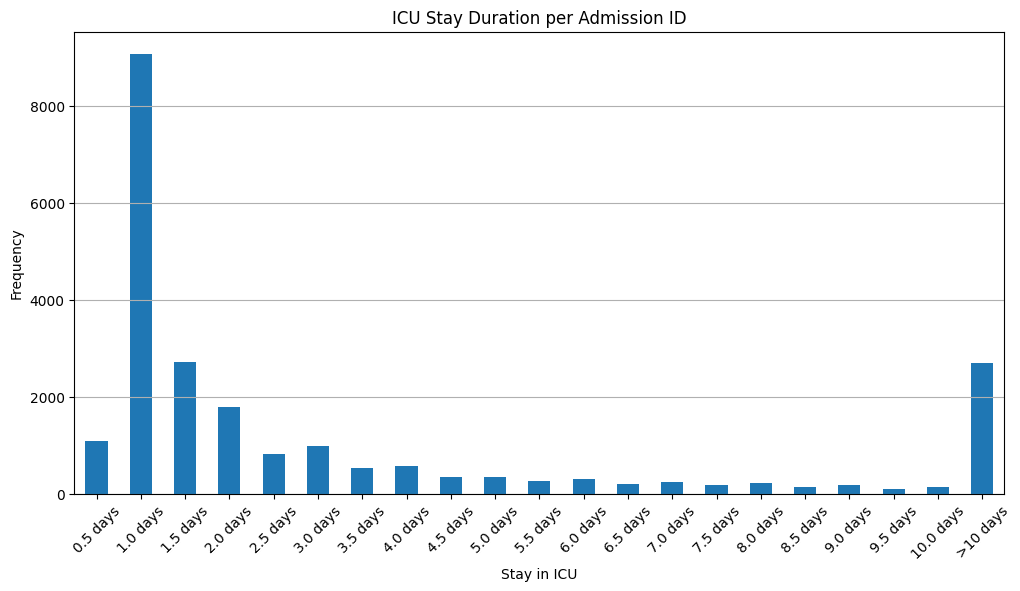

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

creat['stay_in_ICU'] = (creat.groupby('admissionid')['dischargedat'].first() - creat.groupby('admissionid')['admittedat'].first())

max_duration = 20 * 12 * 60 * 60 * 1000

bins = [i * 12 * 60 * 60 * 1000 for i in range(21)] + [float('inf')]
labels = [f"{i/2} days" for i in range(1, 21)] + ['>10 days']

creat['stay_bins'] = pd.cut(creat['stay_in_ICU'], bins=bins, labels=labels, right=False)
frequency = creat['stay_bins'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
frequency.plot(kind='bar')
plt.xlabel('Stay in ICU')
plt.ylabel('Frequency')
plt.title('ICU Stay Duration per Admission ID')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<ipython-input-44-0e5fbdf84fb6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creat_filtered['time_duration'] = (creat_filtered['measuredat'] - creat_filtered['admittedat']) / (1000 * 60 * 60)


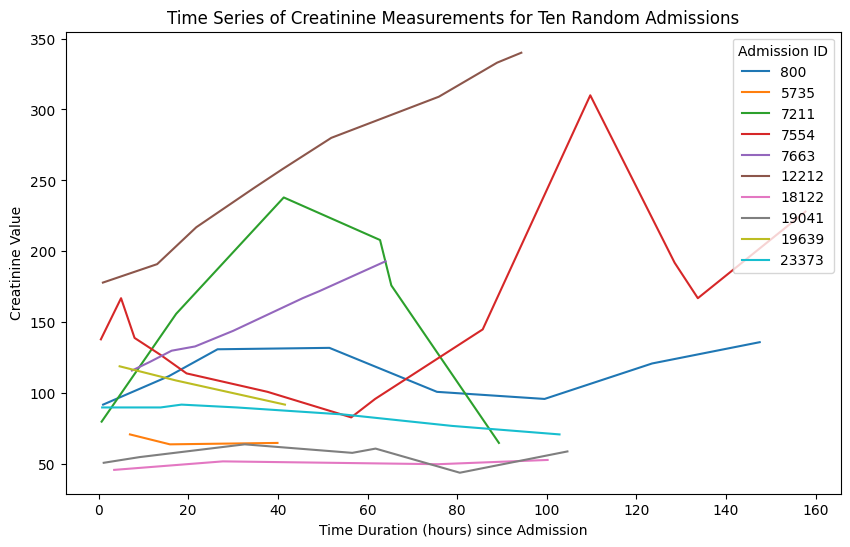

In [ ]:
import numpy as np

# Calculate the time duration between 'admittedat' and 'dischargedat' in milliseconds
creat['admit_discharge_duration'] = creat['dischargedat'] - creat['admittedat']

# Filter out rows where the duration is not within the specified range
min_duration = 48 * 60 * 60 * 1000  # 48 hours in milliseconds
max_duration = 192 * 60 * 60 * 1000  # 192 hours in milliseconds

creat_filtered = creat[(creat['admit_discharge_duration'] >= min_duration) & (creat['admit_discharge_duration'] <= max_duration)]

# Calculate the time duration between 'admittedat' and 'measuredat' in hours
creat_filtered['time_duration'] = (creat_filtered['measuredat'] - creat_filtered['admittedat']) / (1000 * 60 * 60)

# Sort values by 'time_duration' from high to low
creat_sorted = creat_filtered.sort_values(by='time_duration', ascending=False)

# Pick ten random admissions
random_admissions = np.random.choice(creat_sorted['admissionid'].unique(), size=10, replace=False)

# Plotting time series of creatinine values for the selected ten random admissions
plt.figure(figsize=(10, 6))
for admissionid, data in creat_sorted.groupby('admissionid'):
    if admissionid in random_admissions:
        plt.plot(data['time_duration'], data['value'], label=str(admissionid))
plt.xlabel('Time Duration (hours) since Admission')
plt.ylabel('Creatinine Value')
plt.title('Time Series of Creatinine Measurements for Ten Random Admissions')
plt.legend(title='Admission ID')
plt.show()


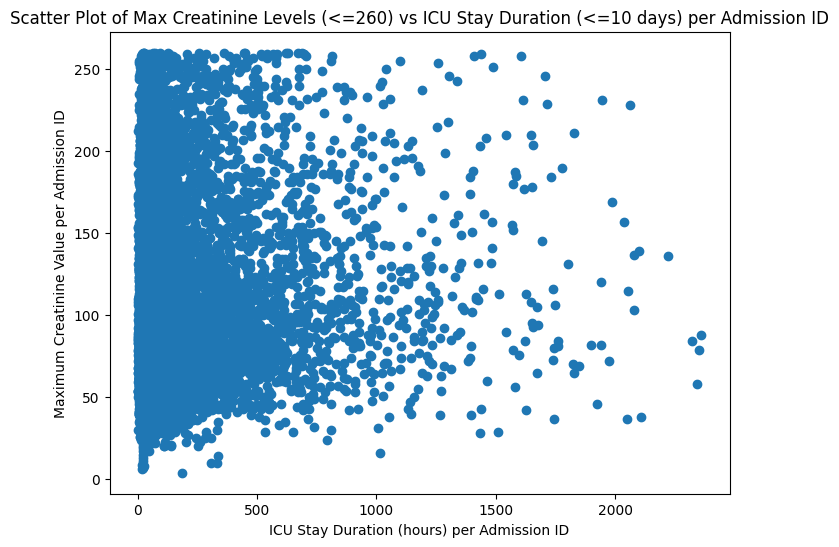

In [ ]:
# Calculate ICU stay duration in hours for each admission
creat['stay_in_ICU'] = (creat['dischargedat'] - creat['admittedat']) / (60 * 60*1000)

# Grouping to find maximum ICU stay duration per admission ID
ICU_stay_duration_per_admission = creat.groupby('admissionid')['stay_in_ICU'].max()

# Grouping to find maximum creatinine level per admission ID
max_creatinine_per_admission = creat.groupby('admissionid')['value'].max()

max_icu_stay_duration = 2400  # in hours
max_creatinine_cutoff = 260

# Filter data for max ICU stay duration and max creatinine level
filtered_data = pd.DataFrame({
    'ICU_stay_duration': ICU_stay_duration_per_admission[
        (ICU_stay_duration_per_admission <= max_icu_stay_duration) &
        (max_creatinine_per_admission <= max_creatinine_cutoff)
    ],
    'Max_Creatinine_Value': max_creatinine_per_admission[
        (ICU_stay_duration_per_admission <= max_icu_stay_duration) &
        (max_creatinine_per_admission <= max_creatinine_cutoff)
    ]
})

# Scatter plot for ICU stay duration <= 2400 hours and max creatinine level <= 500
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['ICU_stay_duration'], filtered_data['Max_Creatinine_Value'])
plt.xlabel('ICU Stay Duration (hours) per Admission ID')
plt.ylabel('Maximum Creatinine Value per Admission ID')
plt.title('Scatter Plot of Max Creatinine Levels (<=260) vs ICU Stay Duration (<=10 days) per Admission ID')
plt.show()

In [ ]:
# Group by 'admissionid' and get the maximum 'comparison_result' value
max_comparison_result = creat.groupby('admissionid')['acute_renal_failure'].max()

# Count the number of 'admissionid' for each value (0, 1, 2, 3) in 'comparison_result'
comparison_result_counts = max_comparison_result.value_counts()

# Display the counts of 'admissionid' for each value in 'comparison_result'
print("Number of 'admissionid' for each value in 'comparison_result':")
print(comparison_result_counts)

KeyError: ignored

In [ ]:
missing_values_creat = creat[creat['value'].isnull()]

# This will give you a DataFrame containing rows where 'creat' column has missing values
print(missing_values_creat)


##### No missing values

In [ ]:
# Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
grouped_stats = creat.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename the lambda functions for quartiles for better understanding
grouped_stats.rename(columns={
    '<lambda_0>': 'Q1',
    '<lambda_1>': 'Q3'
}, inplace=True)

# Calculate IQR for each 'itemid'
grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

# Calculate lower bound and upper bound for outliers detection
grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

# Display the statistics for each unique 'itemid'
print(grouped_stats)

         min     max        mean    Q1     Q3   IQR  lower_bound  upper_bound
itemid                                                                       
6836     0.0  3187.0  124.732449  71.0  148.0  77.0        -44.5        263.5
9941     0.0  2326.0  117.293390  63.0  129.0  66.0        -36.0        228.0
14216   30.0   535.0  118.545455  51.0  132.0  81.0        -70.5        253.5


In [ ]:
# Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
grouped_stats = creat.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename the lambda functions for quartiles for better understanding
grouped_stats.rename(columns={
    '<lambda_0>': 'Q1',
    '<lambda_1>': 'Q3'
}, inplace=True)

# Calculate IQR for each 'itemid'
grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

# Calculate lower bound and upper bound for outliers detection
grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

# Display the statistics for each unique 'itemid'
print(grouped_stats)

         min    max        mean    Q1     Q3   IQR  lower_bound  upper_bound
itemid                                                                      
6836    26.0  325.0  118.400551  69.0  151.0  82.0       -54.00       274.00
9941    25.0  325.0  104.626605  60.0  132.0  72.0       -48.00       240.00
14216   30.0  315.0   86.313636  43.5  108.0  64.5       -53.25       204.75


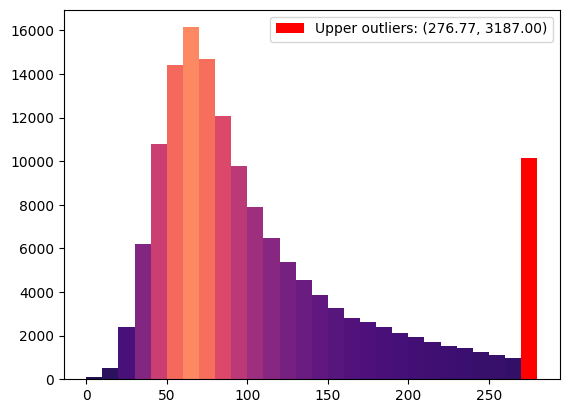

In [ ]:
adb.outliers_histogram(data=creat['value']).show()

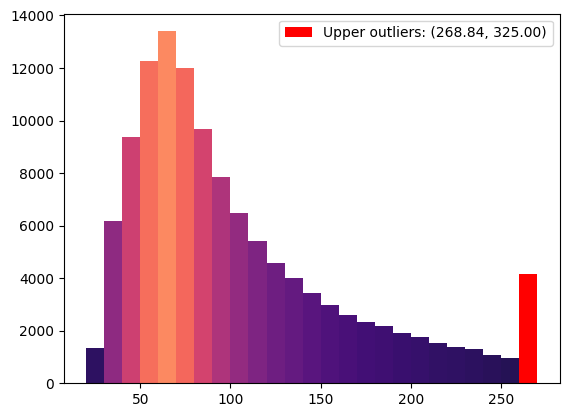

In [ ]:
adb.outliers_histogram(data=creat['value']).show()

In [ ]:
creat

,admissionid,itemid,admittedat,dischargedat,value,unitid,measuredat,registeredby,time_difference_ms,baseline_creatinine,highest_value_half_day,highest_value_1_day,highest_value_2_days,max_creatinine_all_measurements,acute_renal_failure,acute_renal_failure_2_days,acute_renal_failure_1_day,acute_renal_failure_half_day
0,318,14216,0,5158500000,158.000000,99,387660000,Systeem,387660000,87.0,98.000000,98.000000,98.000000,218.711540,2,0,0,0
1,16628,14216,54111180000,58355940000,42.000000,99,56607900000,Systeem,2496720000,77.0,89.000000,101.000000,101.000000,101.000000,0,0,0,0
2,318,14216,0,5158500000,156.000000,99,378120000,Systeem,378120000,87.0,98.000000,98.000000,98.000000,218.711540,2,0,0,0
3,1572,14216,0,1214640000,315.000000,99,756600000,Systeem,756600000,124.0,124.000000,171.000000,268.000000,318.000000,2,2,0,0
4,12302,14216,0,2582100000,51.000000,99,1471200000,Systeem,1471200000,83.0,110.000000,110.000000,110.000000,115.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123431,10423,9941,0,537180000,140.645266,99,244020000,Systeem,244020000,124.0,124.000000,144.978580,144.978580,323.000000,2,0,0,0
123432,15637,9941,104280000,960540000,38.000000,99,151860000,Systeem,47580000,38.0,38.000000,38.000000,72.849718,318.000000,3,0,0,0
123433,14903,9941,0,177360000,38.000000,99,53400000,Systeem,53400000,38.0,65.767039,85.731003,85.731003,85.731003,2,2,2,1
123434,15528,9941,88550100000,89164800000,38.000000,99,88582740000,Systeem,32640000,38.0,117.329450,192.299130,192.299130,306.000000,3,3,3,3


In [ ]:
# Filter rows where 'admissionid' is equal to 318
filtered_data = creat[creat['admissionid'] == 15637]

# Sort the filtered DataFrame by 'measuredat' column in ascending order
sorted_data = filtered_data.sort_values(by='measuredat', ascending=True)

# Display the sorted DataFrame
sorted_data

,admissionid,itemid,admittedat,dischargedat,value,unitid,measuredat,registeredby,time_difference_ms,baseline_creatinine,highest_value_half_day,highest_value_1_day,highest_value_2_days,max_creatinine_all_measurements,acute_renal_failure,acute_renal_failure_2_days,acute_renal_failure_1_day,acute_renal_failure_half_day
45432,15637,9941,104280000,960540000,38.000000,99,105060000,Systeem,780000,38.0,38.0,38.0,72.849718,318.0,3,0,0,0
123432,15637,9941,104280000,960540000,38.000000,99,151860000,Systeem,47580000,38.0,38.0,38.0,72.849718,318.0,3,0,0,0
41043,15637,9941,104280000,960540000,38.000000,99,194640000,Systeem,90360000,38.0,38.0,38.0,72.849718,318.0,3,0,0,0
45334,15637,9941,104280000,960540000,72.849718,99,238260000,Systeem,133980000,38.0,38.0,38.0,72.849718,318.0,3,0,0,0
119222,15637,9941,104280000,960540000,38.000000,99,260220000,Systeem,155940000,38.0,38.0,38.0,72.849718,318.0,3,0,0,0
122617,15637,9941,104280000,960540000,318.000000,99,278400000,Systeem,174120000,38.0,38.0,38.0,72.849718,318.0,3,0,0,0
44920,15637,9941,104280000,960540000,258.000000,99,324660000,Systeem,220380000,38.0,38.0,38.0,72.849718,318.0,3,0,0,0
40154,15637,9941,104280000,960540000,232.000000,99,346740000,Systeem,242460000,38.0,38.0,38.0,72.849718,318.0,3,0,0,0
39524,15637,9941,104280000,960540000,200.000000,99,411060000,Systeem,306780000,38.0,38.0,38.0,72.849718,318.0,3,0,0,0
60837,15637,9941,104280000,960540000,194.000000,99,432900000,Systeem,328620000,38.0,38.0,38.0,72.849718,318.0,3,0,0,0


In [ ]:
# Dropping rows where 'baseline_creatinine' is greater than 260
creat = creat[creat['baseline_creatinine'] <= 260]

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.ensemble import IsolationForest
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats.mstats import winsorize
from tensorflow.keras.models import load_model

columns_to_process = ['value']

# Normalize data before feeding into the autoencoder
normalized_data = creat[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

# Build the autoencoder model
input_dim = len(columns_to_process)
encoding_dim = 5  # Define the size of the encoded representation

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with early stopping
history = autoencoder.fit(
    normalized_data, normalized_data,
    epochs=5,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

autoencoder_save_path = f'/content/drive/MyDrive/MLRH/Autoencoders/creat_autoencoder.h5'

autoencoder.save(autoencoder_save_path)

In [ ]:
from tensorflow.keras.models import load_model

# Path to the saved autoencoder model
autoencoder_model_path = '/content/drive/MyDrive/MLRH/Autoencoders/creat_autoencoder.h5'

# Load the saved autoencoder model
autoencoder = load_model(autoencoder_model_path)

# Use the trained autoencoder to reconstruct the input data
reconstructed_data = autoencoder.predict(normalized_data)
reconstructed_df = pd.DataFrame(reconstructed_data, columns=columns_to_process)

# Calculate the reconstruction error for each sample
reconstruction_errors = np.mean(np.square(normalized_data - reconstructed_data), axis=1)

# Set a threshold for outlier detection (e.g., 95th percentile of reconstruction errors)
threshold = np.percentile(reconstruction_errors, 95)

# Identify outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination if needed
iso_forest.fit(normalized_data)
outliers_iso = creat[iso_forest.predict(normalized_data) == -1]

# Replace outliers using Mean, Gaussian Distribution, Interpolation, Random Sampling, or Trimming
for column in columns_to_process:
    for valuid, group_data in creat.groupby('itemid'):
        outliers_mask = (group_data[column].isin(outliers_iso[column]))  # Check outliers using Isolation Forest
        if outliers_mask.sum() > 0:
            non_outliers_data = group_data.loc[~outliers_mask, column]

            # Method 2: Gaussian Distribution (Ensuring values > 0)
            mean_without_outliers = max(non_outliers_data.mean(), 0)
            std_without_outliers = max(non_outliers_data.std(), 0)

            # Generate replacement values based on a percentile of non-outliers' data distribution
            replacement_values = np.random.normal(mean_without_outliers, std_without_outliers, outliers_mask.sum())
            replacement_values = np.maximum(replacement_values, 0)  # Ensure non-negativity

            # Replacing outliers based on a percentile (e.g., 5th percentile) of non-outliers' data
            percentile_val = np.percentile(non_outliers_data, 5)
            replacement_values = np.where(replacement_values < percentile_val, percentile_val, replacement_values)

            creat.loc[outliers_mask & (creat['itemid'] == valuid), column] = replacement_values

# Drop temporary 'z_score' column if previously created
if 'z_score' in creat.columns:
    creat.drop(columns='z_score', inplace=True)

In [ ]:
outliers_iso

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Assuming 'creat' is your DataFrame
creat = creat[creat['measuredat'] >= 0]

In [ ]:
# Assuming 'creat' is your DataFrame
creat = creat[creat['time_difference_ms'] >= 0]

In [ ]:
# Calculate the time difference in milliseconds
creat['time_difference_ms'] = creat['measuredat'] - creat['admittedat']

mask = creat['time_difference_ms'] <= 24 * 60 * 60 * 1000
filtered_creat = creat[mask]
lowest_values = filtered_creat.groupby('admissionid')['value'].min()

creat['baseline_creatinine'] = creat['admissionid'].map(lowest_values)

In [ ]:
# Find the lowest value for each 'admissionid' within the first 24 hours
highest_values = creat.groupby('admissionid')['value'].max()

# Map the lowest values within 24 hours to their respective 'admissionid'
creat['max_creatinine_all_measurements'] = creat['admissionid'].map(highest_values)

In [ ]:
# Filter rows within different time ranges for each 'admissionid'
mask_half_day = creat['time_difference_ms'] <= 12 * 60 * 60 * 1000
mask_1_day = creat['time_difference_ms'] <= 24 * 60 * 60 * 1000
mask_2_days = creat['time_difference_ms'] <= 2 * 24 * 60 * 60 * 1000

filtered_creat_half_day = creat[mask_half_day]
filtered_creat_1_day = creat[mask_1_day]
filtered_creat_2_days = creat[mask_2_days]

# Calculate the highest value for different time ranges for each 'admissionid'
highest_values_half_day = filtered_creat_half_day.groupby('admissionid')['value'].max()
highest_values_1_day = filtered_creat_1_day.groupby('admissionid')['value'].max()
highest_values_2_days = filtered_creat_2_days.groupby('admissionid')['value'].max()

# Map the highest values within different time ranges to the entire 'value' column
creat['highest_value_half_day'] = creat['admissionid'].map(highest_values_half_day)
creat['highest_value_1_day'] = creat['admissionid'].map(highest_values_1_day)
creat['highest_value_2_days'] = creat['admissionid'].map(highest_values_2_days)

# Replace NaN values in the columns with the highest value from each time range
creat['highest_value_half_day'] = creat['highest_value_half_day'].fillna(creat.groupby('admissionid')['highest_value_half_day'].transform('max'))
creat['highest_value_1_day'] = creat['highest_value_1_day'].fillna(creat.groupby('admissionid')['highest_value_1_day'].transform('max'))
creat['highest_value_2_days'] = creat['highest_value_2_days'].fillna(creat.groupby('admissionid')['highest_value_2_days'].transform('max'))

<ipython-input-18-3c89b559d46c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creat['highest_value_half_day'] = creat['admissionid'].map(highest_values_half_day)
<ipython-input-18-3c89b559d46c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creat['highest_value_1_day'] = creat['admissionid'].map(highest_values_1_day)
<ipython-input-18-3c89b559d46c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
# Recalculate acute renal failure stages based on updated conditions for each 'admissionid'
def calculate_renal_failure_per_id(group):
    group['acute_renal_failure'] = 0

    stage_1_mask = (
        (group['baseline_creatinine'] > 0)
        & (
            (group['max_creatinine_all_measurements'] / group['baseline_creatinine']).between(1.5, 1.9)
           # | (group['max_creatinine_all_measurements'] - group['baseline_creatinine'] >= 26.5)
        )
    )

    stage_2_mask = (
        (group['baseline_creatinine'] > 0)
        & (group['max_creatinine_all_measurements'] / group['baseline_creatinine']).between(2.0, 2.9)
    )

    stage_3_mask = (
        (group['baseline_creatinine'] > 0)
        & (
            (group['max_creatinine_all_measurements'] / group['baseline_creatinine'] > 3)
            # | (
            #     (group['max_creatinine_all_measurements'] >= 354)
            #     & (group['max_creatinine_all_measurements'] - group['baseline_creatinine'] >= 44)
            # )
        )
    )

    # Assign stages based on masks within each group
    group.loc[stage_1_mask, 'acute_renal_failure'] = 1
    group.loc[stage_2_mask, 'acute_renal_failure'] = 2
    group.loc[stage_3_mask, 'acute_renal_failure'] = 3

    return group

# Apply the function per 'admissionid'
creat = creat.groupby('admissionid').apply(calculate_renal_failure_per_id).reset_index(drop=True)

<ipython-input-19-50cdb845182f>:37: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  creat = creat.groupby('admissionid').apply(calculate_renal_failure_per_id).reset_index(drop=True)


In [ ]:
# Renal Failure Calculation Function based on different time ranges
def calculate_renal_failure_per_id(group):
    group['acute_renal_failure_2_days'] = 0
    group['acute_renal_failure_1_day'] = 0
    group['acute_renal_failure_half_day'] = 0

    stage_1_mask_2_days = (
        (group['baseline_creatinine'] > 0)
        & (
            (group['highest_value_2_days'] / group['baseline_creatinine']).between(1.5, 1.9)
        )
    )

    stage_2_mask_2_days = (
        (group['baseline_creatinine'] > 0)
        & (group['highest_value_2_days'] / group['baseline_creatinine']).between(2.0, 2.9)
    )

    stage_3_mask_2_days = (
        (group['baseline_creatinine'] > 0)
        & (
            (group['highest_value_2_days'] / group['baseline_creatinine'] > 3)
        )
    )

    stage_1_mask_1_day = (
        (group['baseline_creatinine'] > 0)
        & (
            (group['highest_value_1_day'] / group['baseline_creatinine']).between(1.5, 1.9)
        )
    )

    stage_2_mask_1_day = (
        (group['baseline_creatinine'] > 0)
        & (group['highest_value_1_day'] / group['baseline_creatinine']).between(2.0, 2.9)
    )

    stage_3_mask_1_day = (
        (group['baseline_creatinine'] > 0)
        & (
            (group['highest_value_1_day'] / group['baseline_creatinine'] > 3)
        )
    )

    stage_1_mask_half_day = (
        (group['baseline_creatinine'] > 0)
        & (
            (group['highest_value_half_day'] / group['baseline_creatinine']).between(1.5, 1.9)
        )
    )

    stage_2_mask_half_day = (
        (group['baseline_creatinine'] > 0)
        & (group['highest_value_half_day'] / group['baseline_creatinine']).between(2.0, 2.9)
    )

    stage_3_mask_half_day = (
        (group['baseline_creatinine'] > 0)
        & (
            (group['highest_value_half_day'] / group['baseline_creatinine'] > 3)
        )
    )

    # Assign stages based on masks within each group
    group.loc[stage_1_mask_2_days, 'acute_renal_failure_2_days'] = 1
    group.loc[stage_2_mask_2_days, 'acute_renal_failure_2_days'] = 2
    group.loc[stage_3_mask_2_days, 'acute_renal_failure_2_days'] = 3

    group.loc[stage_1_mask_1_day, 'acute_renal_failure_1_day'] = 1
    group.loc[stage_2_mask_1_day, 'acute_renal_failure_1_day'] = 2
    group.loc[stage_3_mask_1_day, 'acute_renal_failure_1_day'] = 3

    group.loc[stage_1_mask_half_day, 'acute_renal_failure_half_day'] = 1
    group.loc[stage_2_mask_half_day, 'acute_renal_failure_half_day'] = 2
    group.loc[stage_3_mask_half_day, 'acute_renal_failure_half_day'] = 3

    return group

# Apply the function per 'admissionid'
creat = creat.groupby('admissionid').apply(calculate_renal_failure_per_id).reset_index(drop=True)


<ipython-input-20-7752a9117a67>:80: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  creat = creat.groupby('admissionid').apply(calculate_renal_failure_per_id).reset_index(drop=True)


In [ ]:
# Group by 'admissionid' and get the maximum value for each 'acute_renal_failure' column
max_2_days = creat.groupby('admissionid')['acute_renal_failure_2_days'].max()
max_1_day = creat.groupby('admissionid')['acute_renal_failure_1_day'].max()
max_half_day = creat.groupby('admissionid')['acute_renal_failure_half_day'].max()

# Count the number of 'admissionid' for each value (0, 1, 2, 3) in each 'acute_renal_failure' column
counts_2_days = max_2_days.value_counts()
counts_1_day = max_1_day.value_counts()
counts_half_day = max_half_day.value_counts()

# Display the counts of 'admissionid' for each value in each 'acute_renal_failure' column
print("Number of 'admissionid' for each value in 'acute_renal_failure_2_days':")
print(counts_2_days)

print("\nNumber of 'admissionid' for each value in 'acute_renal_failure_1_day':")
print(counts_1_day)

print("\nNumber of 'admissionid' for each value in 'acute_renal_failure_half_day':")
print(counts_half_day)

Number of 'admissionid' for each value in 'acute_renal_failure_2_days':
0    6765
1     873
2     468
3     144
Name: acute_renal_failure_2_days, dtype: int64

Number of 'admissionid' for each value in 'acute_renal_failure_1_day':
0    7347
1     621
2     224
3      58
Name: acute_renal_failure_1_day, dtype: int64

Number of 'admissionid' for each value in 'acute_renal_failure_half_day':
0    7715
1     366
2     128
3      41
Name: acute_renal_failure_half_day, dtype: int64


### Urine

In [ ]:
urine = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
        8794  --UrineCAD
        , 8796  --UrineSupraPubis
        , 8798 --UrineSpontaan
        , 8800 --UrineIncontinentie
        , 8803 --UrineUP
        , 10743 --Nefrodrain li Uit
        , 10745 --Nefrodrain re Uit
        , 19921 --UrineSplint Li
        , 19922 --UrineSplint Re
    )
    '''
    , configuration=config_gbq)

KeyboardInterrupt: ignored

In [ ]:
missing_values_urine = urine[urine['value'].isnull()]

# This will give you a DataFrame containing rows where 'creat' column has missing values
print(missing_values_urine)


##### No missing values

Empty DataFrame
Columns: [admissionid, itemid, value, unitid, measuredat, registeredby]
Index: []


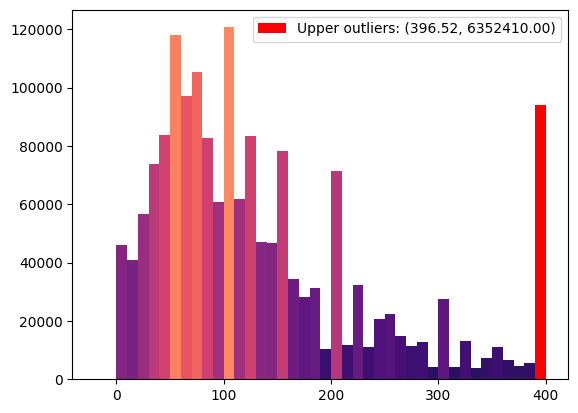

In [ ]:
adb.outliers_histogram(data=urine['value']).show()

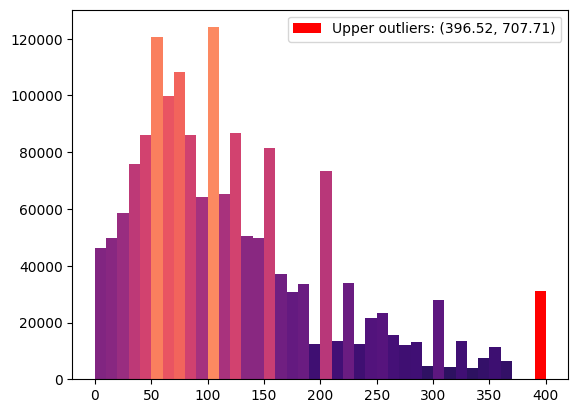

In [ ]:
adb.outliers_histogram(data=urine['value']).show()

In [ ]:
# Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
grouped_stats = urine.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename the lambda functions for quartiles for better understanding
grouped_stats.rename(columns={
    '<lambda_0>': 'Q1',
    '<lambda_1>': 'Q3'
}, inplace=True)

# Calculate IQR for each 'itemid'
grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

# Calculate lower bound and upper bound for outliers detection
grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

# Display the statistics for each unique 'itemid'
print(grouped_stats)

         min        max        mean     Q1     Q3    IQR  lower_bound  \
itemid                                                                  
8794   -20.0  6352410.0  139.194289   60.0  175.0  115.0       -112.5   
8796     0.0     2500.0  127.664545   48.0  165.0  117.0       -127.5   
8798     0.0     2000.0  253.635224  100.0  350.0  250.0       -275.0   
8800     0.0     2000.0  142.490055   50.0  200.0  150.0       -175.0   
8803     0.0     1400.0  140.177415   60.0  180.0  120.0       -120.0   
10743    0.0     1000.0   67.857619   14.0   90.0   76.0       -100.0   
10745    0.0     1200.0   63.710397   15.0   80.0   65.0        -82.5   
19921    0.0      270.0   41.371769   12.0   60.0   48.0        -60.0   
19922    0.0      500.0   64.767901   15.0   90.0   75.0        -97.5   

        upper_bound  
itemid               
8794          347.5  
8796          340.5  
8798          725.0  
8800          425.0  
8803          360.0  
10743         204.0  
10745         177.5 

In [ ]:
# Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
grouped_stats = urine.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename the lambda functions for quartiles for better understanding
grouped_stats.rename(columns={
    '<lambda_0>': 'Q1',
    '<lambda_1>': 'Q3'
}, inplace=True)

# Calculate IQR for each 'itemid'
grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

# Calculate lower bound and upper bound for outliers detection
grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

# Display the statistics for each unique 'itemid'
print(grouped_stats)

        min         max        mean          Q1          Q3         IQR  \
itemid                                                                    
8794    0.0  550.556303  117.773142   54.649237  160.000000  105.350763   
8796    0.0  400.000000  109.230231   44.000000  150.000000  106.000000   
8798    0.0  707.711554  184.833404  100.000000  268.932764  168.932764   
8800    0.0  430.312208  119.691146   50.000000  170.000000  120.000000   
8803    0.0  454.300222  119.597539   55.000000  160.000000  105.000000   
10743   0.0  400.000000   62.284988   12.000000   85.000000   73.000000   
10745   0.0  400.000000   58.216124   15.000000   80.000000   65.000000   
19921   0.0  270.000000   41.371769   12.000000   60.000000   48.000000   
19922   0.0  400.000000   61.728486   15.000000   90.000000   75.000000   

        lower_bound  upper_bound  
itemid                            
8794    -103.376909   318.026145  
8796    -115.000000   309.000000  
8798    -153.399146   522.331911  

In [ ]:
columns_to_process = ['value']

# Normalize data before feeding into the autoencoder
normalized_data = urine[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

# Build the autoencoder model
input_dim = len(columns_to_process)
encoding_dim = 5  # Define the size of the encoded representation

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with early stopping
history = autoencoder.fit(
    normalized_data, normalized_data,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

autoencoder_save_path = f'/content/drive/MyDrive/MLRH/Autoencoders/urine_autoencoder_{history.epoch[-1]+1}_{history.history["loss"][-1]:.6f}.h5'

autoencoder.save(autoencoder_save_path)

Epoch 1/50
42047/42047 [==============================] - 122s 3ms/step - loss: 1.2485 - val_loss: 0.0017
Epoch 2/50
42047/42047 [==============================] - 106s 3ms/step - loss: 1.2466 - val_loss: 0.0017
Epoch 3/50
42047/42047 [==============================] - 98s 2ms/step - loss: 1.2465 - val_loss: 0.0017
Epoch 4/50
42047/42047 [==============================] - 100s 2ms/step - loss: 1.2466 - val_loss: 0.0017
Epoch 5/50
42047/42047 [==============================] - 105s 2ms/step - loss: 1.2465 - val_loss: 0.0017
Epoch 6/50
42047/42047 [==============================] - 99s 2ms/step - loss: 1.2465 - val_loss: 0.0017


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Path to the saved autoencoder model
autoencoder_model_path = '/content/drive/MyDrive/MLRH/Autoencoders/urine_autoencoder_6_1.246529.h5'

# Load the saved autoencoder model
autoencoder = load_model(autoencoder_model_path)

# Use the trained autoencoder to reconstruct the input data
reconstructed_data = autoencoder.predict(normalized_data)
reconstructed_df = pd.DataFrame(reconstructed_data, columns=columns_to_process)

# Calculate the reconstruction error for each sample
reconstruction_errors = np.mean(np.square(normalized_data - reconstructed_data), axis=1)

# Set a threshold for outlier detection (e.g., 95th percentile of reconstruction errors)
threshold = np.percentile(reconstruction_errors, 95)

# Identify outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
iso_forest.fit(normalized_data)
outliers_iso = urine[iso_forest.predict(normalized_data) == -1]

# Replace outliers using Gaussian Distribution (Ensuring values >= 0)
for column in columns_to_process:
    for valuid, group_data in urine.groupby('itemid'):
        outliers_mask = (group_data[column].isin(outliers_iso[column]))  # Check outliers using Isolation Forest
        if outliers_mask.sum() > 0:
            non_outliers_data = group_data.loc[~outliers_mask, column]

            # Method 2: Gaussian Distribution (Ensuring values >= 0)
            mean_without_outliers = max(non_outliers_data.mean(), 0)
            std_without_outliers = max(non_outliers_data.std(), 0)

            # Generate replacement values based on a percentile of non-outliers' data distribution
            replacement_values = np.random.normal(mean_without_outliers, std_without_outliers, outliers_mask.sum())
            replacement_values = np.maximum(replacement_values, 0)  # Ensure non-negativity

            # Replacing outliers based on a percentile (e.g., 5th percentile) of non-outliers' data
            percentile_val = np.percentile(non_outliers_data, 5)
            replacement_values = np.where(replacement_values < percentile_val, percentile_val, replacement_values)

            urine.loc[outliers_mask & (urine['itemid'] == valuid), column] = replacement_values

52559/52559 [==============================] - 87s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
outliers_iso

,admissionid,itemid,value,unitid,measuredat,registeredby
1922,23480,10745,800.0,6,650640000,ICV_IC-Verpleegkundig
1923,23480,10745,800.0,6,859440000,ICV_IC-Verpleegkundig
1949,8462,10745,370.0,6,54360000,ICV_IC-Verpleegkundig
1950,19790,10745,370.0,6,171720000,ICV_IC-Verpleegkundig
1951,19533,10743,370.0,6,487080000,ICV_IC-Verpleegkundig
...,...,...,...,...,...,...
1681868,4264,8794,380.0,6,642480000,MMI_Medische microbiologie
1681869,5241,8794,600.0,6,3956100000,MMI_Medische microbiologie
1681870,2528,8794,430.0,6,14350860000,MMI_Medische microbiologie
1681871,1094,8794,1400.0,6,9540000,MMI_Medische microbiologie


In [ ]:
urine['value'] = urine['value'].apply(lambda x: max(x, 0))  # Replaces negative values with 0

In [ ]:
urine

,admissionid,itemid,value,unitid,measuredat,registeredby
0,12777,10743,0.000000,6,333600000,ICV_Medisch
1,12777,10745,0.000000,6,333600000,ICV_Medisch
2,625,10743,0.000000,6,997500000,ICV_Medisch
3,625,10745,0.000000,6,1037100000,ICV_Medisch
4,22147,10745,0.000000,6,1963200000,ICV_IC-Verpleegkundig
...,...,...,...,...,...,...
1681868,4264,8794,53.776430,6,642480000,MMI_Medische microbiologie
1681869,5241,8794,246.721300,6,3956100000,MMI_Medische microbiologie
1681870,2528,8794,78.360951,6,14350860000,MMI_Medische microbiologie
1681871,1094,8794,74.047578,6,9540000,MMI_Medische microbiologie


### Temp

In [ ]:
temp = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
         8658 --Temp Bloed
        , 8659 --Temperatuur Perifeer 2
        , 8662 --Temperatuur Perifeer 1
        , 16110 --Temp Oesophagus
        , 13058 --Temp Rectaal
        , 13059 --Temp Lies
        , 13060 --Temp Axillair
        , 13061 --Temp Oraal
        , 13062 --Temp Oor
        , 13063 --Temp Huid
        , 13952 --Temp Blaas
        , 16110 --Temp Oesophagus
    )
    '''
    , configuration=config_gbq)

In [ ]:
# Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
grouped_stats = temp.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename the lambda functions for quartiles for better understanding
grouped_stats.rename(columns={
    '<lambda_0>': 'Q1',
    '<lambda_1>': 'Q3'
}, inplace=True)

# Calculate IQR for each 'itemid'
grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

# Calculate lower bound and upper bound for outliers detection
grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

# Display the statistics for each unique 'itemid'
print(grouped_stats)

            min    max       mean    Q1      Q3    IQR  lower_bound  \
itemid                                                                
8658        0.0  371.0  36.482982  36.2  37.100  0.900      34.8500   
8659        0.0  374.0  35.568898  34.8  37.200  2.400      31.2000   
8662        0.0  512.0  36.176693  35.8  37.300  1.500      33.5500   
13058       0.0  373.0  35.817432  34.2  37.400  3.200      29.4000   
13059       0.0  374.0  36.998899  36.4  37.700  1.300      34.4500   
13060    -543.0  376.5  36.769345  36.2  37.300  1.100      34.5500   
13061      31.0   39.3  34.723260  32.8  36.475  3.675      27.2875   
13062       0.0  365.0  37.128694  36.6  37.600  1.000      35.1000   
13063  -23178.0  351.1  35.837127  36.2  37.700  1.500      33.9500   
13952       5.0   40.9  37.118810  36.8  37.700  0.900      35.4500   
16110       0.0  375.0  35.523054  33.7  37.200  3.500      28.4500   

        upper_bound  
itemid               
8658        38.4500  
8659      

In [ ]:
# Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
grouped_stats = temp.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename the lambda functions for quartiles for better understanding
grouped_stats.rename(columns={
    '<lambda_0>': 'Q1',
    '<lambda_1>': 'Q3'
}, inplace=True)

# Calculate IQR for each 'itemid'
grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

# Calculate lower bound and upper bound for outliers detection
grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

# Display the statistics for each unique 'itemid'
print(grouped_stats)

         min        max       mean         Q1         Q3       IQR  \
itemid                                                               
8658    32.2  39.912063  36.650917  36.200000  37.100000  0.900000   
8659    32.2  42.215172  36.328618  35.677373  37.300000  1.622627   
8662    32.2  41.374463  36.558654  36.000000  37.353099  1.353099   
13058   32.2  43.185342  36.147519  35.200000  37.400000  2.200000   
13059   32.2  40.119805  36.967889  36.400000  37.600000  1.200000   
13060   32.2  39.699321  36.763192  36.200000  37.300000  1.100000   
13061   32.2  38.900000  35.131474  33.100000  36.600000  3.500000   
13062   33.8  39.742634  37.064748  36.600000  37.600000  1.000000   
13063   32.2  41.502093  36.880465  36.300000  37.700000  1.400000   
13952   32.2  40.059555  37.127784  36.800000  37.700000  0.900000   
16110   32.2  42.732370  35.924337  34.700000  37.200000  2.500000   

        lower_bound  upper_bound  
itemid                            
8658      34.850000

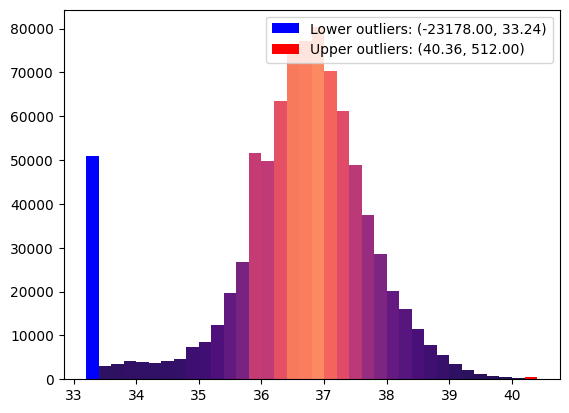

In [ ]:
adb.outliers_histogram(data=temp['value']).show()

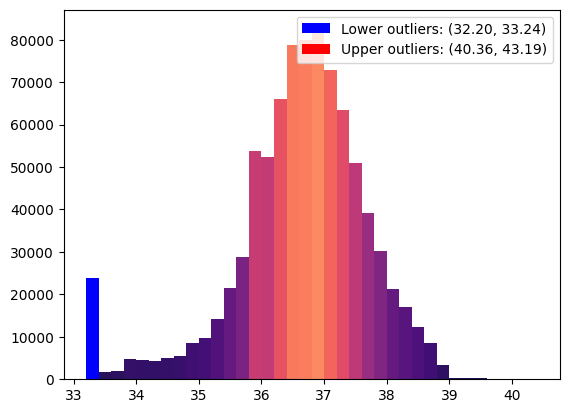

In [ ]:
adb.outliers_histogram(data=temp['value']).show()

In [ ]:
columns_to_process = ['value']

# Normalize data before feeding into the autoencoder
normalized_data = temp[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

# Build the autoencoder model
input_dim = len(columns_to_process)
encoding_dim = 5  # Define the size of the encoded representation

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with early stopping
history = autoencoder.fit(
    normalized_data, normalized_data,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

autoencoder_save_path = f'/content/drive/MyDrive/MLRH/Autoencoders/temp_autoencoder_{history.epoch[-1]+1}_{history.history["val_loss"][-1]:.6f}.h5'

autoencoder.save(autoencoder_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Path to the saved autoencoder model
autoencoder_model_path = '/content/drive/MyDrive/MLRH/Autoencoders/temp_autoencoder_6_0.001662.h5'

# Load the saved autoencoder model
autoencoder = load_model(autoencoder_model_path)

# Use the trained autoencoder to reconstruct the input data
reconstructed_data = autoencoder.predict(normalized_data)
reconstructed_df = pd.DataFrame(reconstructed_data, columns=columns_to_process)

# Calculate the reconstruction error for each sample
reconstruction_errors = np.mean(np.square(normalized_data - reconstructed_data), axis=1)

# Set a threshold for outlier detection (e.g., 95th percentile of reconstruction errors)
threshold = np.percentile(reconstruction_errors, 95)

# Identify outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
iso_forest.fit(normalized_data)
outliers_iso = temp[iso_forest.predict(normalized_data) == -1]

# Replace outliers using Gaussian Distribution (Ensuring values >= 0)
for column in columns_to_process:
    for valuid, group_data in temp.groupby('itemid'):
        outliers_mask = (group_data[column].isin(outliers_iso[column]))  # Check outliers using Isolation Forest
        if outliers_mask.sum() > 0:
            non_outliers_data = group_data.loc[~outliers_mask, column]

            # Method 2: Gaussian Distribution (Ensuring values >= 0)
            mean_without_outliers = max(non_outliers_data.mean(), 0)
            std_without_outliers = max(non_outliers_data.std(), 0)

            # Generate replacement values based on a percentile of non-outliers' data distribution
            replacement_values = np.random.normal(mean_without_outliers, std_without_outliers, outliers_mask.sum())
            replacement_values = np.maximum(replacement_values, 0)  # Ensure non-negativity

            # Replacing outliers based on a percentile (e.g., 5th percentile) of non-outliers' data
            percentile_val = np.percentile(non_outliers_data, 5)
            replacement_values = np.where(replacement_values < percentile_val, percentile_val, replacement_values)

            temp.loc[outliers_mask & (temp['itemid'] == valuid), column] = replacement_values

27079/27079 [==============================] - 48s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
outliers_iso

,admissionid,itemid,value,unitid,measuredat,registeredby
21,18326,8659,0.0,59,37740000,ICV_IC-Verpleegkundig
22,11384,8659,0.0,59,4163880000,ICV_IC-Verpleegkundig
23,3574,8659,0.0,59,994560000,ICV_IC-Verpleegkundig
24,18282,8659,0.0,59,8880000,ICV_IC-Verpleegkundig
25,6056,8659,0.0,59,7237740000,ICV_IC-Verpleegkundig
...,...,...,...,...,...,...
866512,15016,13060,39.6,59,1552980000,ICV_MC-Verpleegkundig
866513,14356,13060,39.6,59,3360720000,ICV_IC-Verpleegkundig
866514,14047,13060,39.6,59,144240000,ICV_IC-Verpleegkundig
866515,8168,13060,39.6,59,234960000,ICV_IC-Verpleegkundig


In [ ]:
temp

,admissionid,itemid,value,unitid,measuredat,registeredby
0,10856,16110,37.200000,59,304080000,Consulent
1,10856,16110,37.200000,59,300480000,Consulent
2,10536,16110,32.400000,59,57060000,ICV_Medisch
3,10609,16110,36.200000,59,164820000,ICV_Medisch
4,7361,16110,31.600000,59,19920000,ICV_Medisch
...,...,...,...,...,...,...
866512,15016,13060,39.600000,59,1552980000,ICV_MC-Verpleegkundig
866513,14356,13060,39.600000,59,3360720000,ICV_IC-Verpleegkundig
866514,14047,13060,39.600000,59,144240000,ICV_IC-Verpleegkundig
866515,8168,13060,39.600000,59,234960000,ICV_IC-Verpleegkundig


### Respiratory rate

In [ ]:
resp_rate = pd.read_gbq('''WITH resp_rate AS (
    SELECT
        n.admissionid,
        n.measuredat,
        n.itemid,
        n.item,
        n.value,
        CASE
            WHEN NOT n.registeredby IS NULL THEN TRUE
            ELSE FALSE
        END as validated,
        (n.measuredat - a.admittedat)/(1000*60) AS time,
        ROW_NUMBER() OVER(
            PARTITION BY n.admissionid, n.measuredat
            ORDER BY
                CASE itemid
                    WHEN 8873 THEN 1 --Ventilator measurements
                    WHEN 12266 THEN 2 --Ventilator measurements
                    ELSE 3  --Patient monitor measurements
                END
            ) AS priority
    FROM numericitems n
    LEFT JOIN admissions a ON
        n.admissionid = a.admissionid
    WHERE itemid IN (
        --Evita Parameters
        8873, --Ademfrequentie Evita: measurement by Evita ventilator, most accurate
        --7726, --Ademfrequentie Spontaan: measurement by Evita ventilator, spontaneous breaths/min, distiction not needed for 'actual' respiratory rate
        --9654, --Ademfrequentie Spontaan(2): measurement by 2nd simultaneously used Evita ventilator (very uncommon), spontaneous breaths/min, distiction not needed for 'actual' respiratory rate

        --Servo-i/Servo-u Parameters
        --12283, --Adem Frequentie (Set): setting on Servo-i/Servo-U ventilator, not needed for 'actual' respiratory rate
        --12322, --Adem Frequentie (Set) (2): setting on 2nd simultaneously used Servo-i/Servo-U ventilator (uncommon), not needed for 'actual' respiratory rate
        12266, --Ademfreq.: measurement by Servo-i/Servo-U ventilator, most accurate
        --12348, --Ademfreq.(2): measurement by 2nd simultaneously used Servo-i/Servo-U ventilator (uncommon), no additional information
        --12577 --Ademfreq. Spontaan nieuw --from Servo-i/Servo-U ventilator, spontaneous breaths/min, distiction not needed for 'actual' respiratory rate

        --Patient monitor
        8874 --Ademfrequentie Monitor: measurement by patient monitor using ECG-impedance, less accurate
        )
    AND (n.measuredat - a.admittedat) <= 1000*60*60*24 --measurements within 24 hours
)
SELECT * FROM
resp_rate
WHERE priority = 1 --only retrieve most accurate measurement
''', configuration=config_gbq)

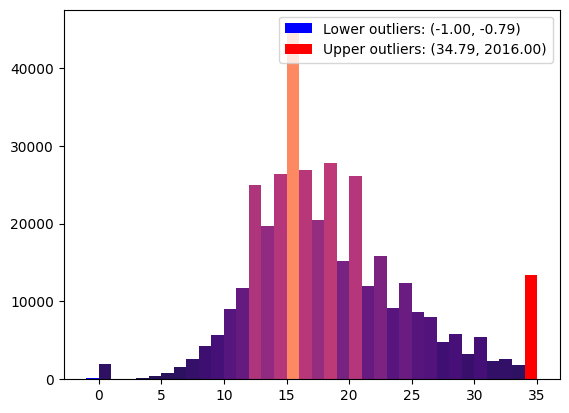

In [ ]:
adb.outliers_histogram(data=resp_rate['value']).show()

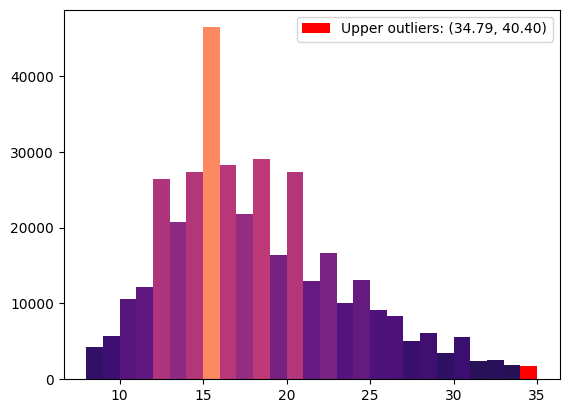

In [ ]:
adb.outliers_histogram(data=resp_rate['value']).show()

In [ ]:
# Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
grouped_stats = resp_rate.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename the lambda functions for quartiles for better understanding
grouped_stats.rename(columns={
    '<lambda_0>': 'Q1',
    '<lambda_1>': 'Q3'
}, inplace=True)

# Calculate IQR for each 'itemid'
grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

# Calculate lower bound and upper bound for outliers detection
grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

# Display the statistics for each unique 'itemid'
print(grouped_stats)

        min     max       mean    Q1    Q3  IQR  lower_bound  upper_bound
itemid                                                                   
8873    0.0  1610.0  15.324378  12.0  18.0  6.0          3.0         27.0
8874   -1.0  2016.0  18.049278  13.0  22.0  9.0         -0.5         35.5
12266   0.0   222.0  18.525765  15.0  22.0  7.0          4.5         32.5


In [ ]:
# Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
grouped_stats = resp_rate.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename the lambda functions for quartiles for better understanding
grouped_stats.rename(columns={
    '<lambda_0>': 'Q1',
    '<lambda_1>': 'Q3'
}, inplace=True)

# Calculate IQR for each 'itemid'
grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

# Calculate lower bound and upper bound for outliers detection
grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

# Display the statistics for each unique 'itemid'
print(grouped_stats)

        min        max       mean    Q1    Q3  IQR  lower_bound  upper_bound
itemid                                                                      
8873    8.0  34.000000  15.570043  12.0  18.0  6.0          3.0         27.0
8874    8.0  40.400172  17.690560  13.0  21.0  8.0          1.0         33.0
12266   8.0  37.765272  18.044402  15.0  21.0  6.0          6.0         30.0


In [ ]:
columns_to_process = ['value']

# Assuming 'resp_rate' is your DataFrame containing 'value' column

# Normalize data before feeding into the autoencoder
normalized_data = resp_rate[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

# Build the autoencoder model
input_dim = len(columns_to_process)
encoding_dim = 5  # Define the size of the encoded representation

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with early stopping
history = autoencoder.fit(
    normalized_data, normalized_data,
    epochs=10,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

autoencoder_save_path = f'/content/drive/MyDrive/MLRH/Autoencoders/resp_rate_autoencoder.h5'

autoencoder.save(autoencoder_save_path)

Epoch 1/10
9385/9385 [==============================] - 38s 4ms/step - loss: 0.6281 - val_loss: 1.1837
Epoch 2/10
9385/9385 [==============================] - 43s 5ms/step - loss: 0.5687 - val_loss: 1.1793
Epoch 3/10
9385/9385 [==============================] - 38s 4ms/step - loss: 0.5679 - val_loss: 1.1790
Epoch 4/10
9385/9385 [==============================] - 43s 5ms/step - loss: 0.5678 - val_loss: 1.1790
Epoch 5/10
9385/9385 [==============================] - 42s 5ms/step - loss: 0.5678 - val_loss: 1.1789
Epoch 6/10
9385/9385 [==============================] - 35s 4ms/step - loss: 0.5678 - val_loss: 1.1789
Epoch 7/10
9385/9385 [==============================] - 34s 4ms/step - loss: 0.5678 - val_loss: 1.1789
Epoch 8/10
9385/9385 [==============================] - 35s 4ms/step - loss: 0.5678 - val_loss: 1.1789
Epoch 9/10
9385/9385 [==============================] - 34s 4ms/step - loss: 0.5678 - val_loss: 1.1789
Epoch 10/10
9385/9385 [==============================] - 40s 4ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Path to the saved autoencoder model
#Todo change this to saved autoencoder model
autoencoder_model_path = '/content/drive/MyDrive/MLRH/Autoencoders/resp_rate_autoencoder.h5'

# Load the saved autoencoder model
autoencoder = load_model(autoencoder_model_path)

normalized_data = resp_rate[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

# Use the trained autoencoder to reconstruct the input data
reconstructed_data = autoencoder.predict(normalized_data)
reconstructed_df = pd.DataFrame(reconstructed_data, columns=columns_to_process)

# Calculate the reconstruction error for each sample
reconstruction_errors = np.mean(np.square(normalized_data - reconstructed_data), axis=1)

# Set a threshold for outlier detection (e.g., 95th percentile of reconstruction errors)
threshold = np.percentile(reconstruction_errors, 95)

# Identify outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
iso_forest.fit(normalized_data)
outliers_iso = resp_rate[iso_forest.predict(normalized_data) == -1]

# Replace outliers using Gaussian Distribution (Ensuring values >= 0)
for column in columns_to_process:
    for valuid, group_data in resp_rate.groupby('itemid'):
        outliers_mask = (group_data[column].isin(outliers_iso[column]))  # Check outliers using Isolation Forest
        if outliers_mask.sum() > 0:
            non_outliers_data = group_data.loc[~outliers_mask, column]

            # Method 2: Gaussian Distribution (Ensuring values >= 0)
            mean_without_outliers = max(non_outliers_data.mean(), 0)
            std_without_outliers = max(non_outliers_data.std(), 0)

            # Generate replacement values based on a percentile of non-outliers' data distribution
            replacement_values = np.random.normal(mean_without_outliers, std_without_outliers, outliers_mask.sum())
            replacement_values = np.maximum(replacement_values, 0)  # Ensure non-negativity

            # Replacing outliers based on a percentile (e.g., 5th percentile) of non-outliers' data
            percentile_val = np.percentile(non_outliers_data, 5)
            replacement_values = np.where(replacement_values < percentile_val, percentile_val, replacement_values)

            resp_rate.loc[outliers_mask & (resp_rate['itemid'] == valuid), column] = replacement_values

11731/11731 [==============================] - 22s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
outliers_iso
#these are WRONG for now, need to create autoencoder first.

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Define the path to save the DataFrames
save_path = '/content/drive/MyDrive/MLRH/Dataframes/'

# Save the DataFrames as CSV files
resp_rate.to_csv(save_path + 'resp_rate.csv', index=False)

### Heart rate

In [ ]:
heart_rate = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
         6640 --Heart rate
    )
    '''
        , configuration=config_gbq)

NameError: ignored

In [ ]:
import pandas as pd

# Convert 'measuredat' from milliseconds to hours
heart_rate['measuredat_hours'] = heart_rate['measuredat'] / (1000 * 60 * 60)

# Sort the DataFrame by 'admissionid' and 'measuredat' in ascending order
heart_rate = heart_rate.sort_values(by=['admissionid', 'measuredat'])

# Group by 'admissionid'
grouped = heart_rate.groupby('admissionid')

# Calculate the time difference between consecutive measurements for each admission ID
heart_rate['time_diff'] = grouped['measuredat_hours'].diff()

# Count the number of measurements per hour for each admission ID
heart_rate['measurements_per_hour'] = 1 / heart_rate['time_diff']

# Calculate the average number of measurements per hour per admission ID
avg_measurements_per_hour = heart_rate.groupby('admissionid')['measurements_per_hour'].mean()

# Print the average number of measurements per hour per admission ID
avg_measurements_per_hour.head()

admissionid
0    1.028571
1    1.083333
2    1.012573
3       0.975
4    0.854911
Name: measurements_per_hour, dtype: Float64

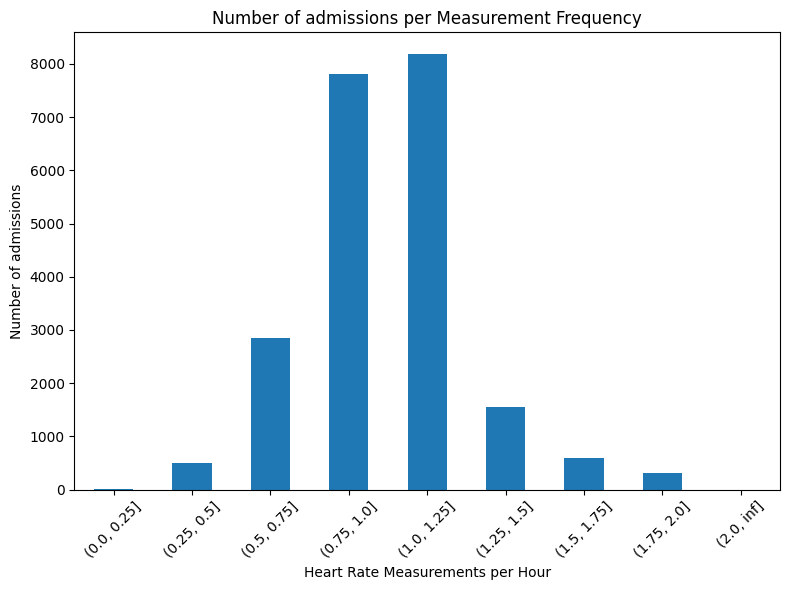

In [ ]:
bins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, float('inf')]

# Group values into specified bins and count the occurrences
grouped = pd.cut(avg_measurements_per_hour, bins=bins).value_counts().sort_index()

# Combine the last group (everything larger than 2) into one bar
last_bin = pd.Interval(2.0, float('inf'))
larger_than_2_sum = grouped[grouped.index > last_bin].sum()
grouped = grouped[grouped.index <= last_bin]
grouped[last_bin] = larger_than_2_sum

# Plotting the bar chart
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar',)
plt.title('Number of admissions per Measurement Frequency')
plt.xlabel('Heart Rate Measurements per Hour')
plt.ylabel('Number of admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

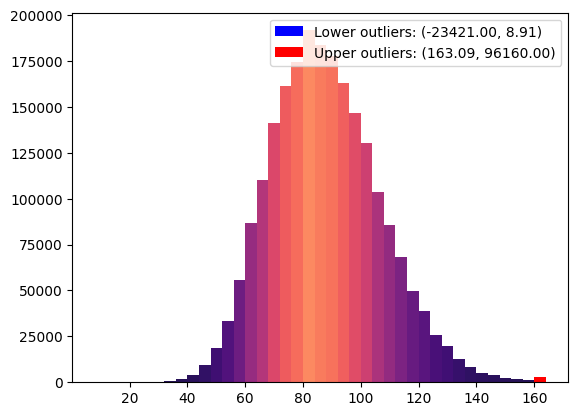

In [ ]:
adb.outliers_histogram(data=heart_rate['value']).show()

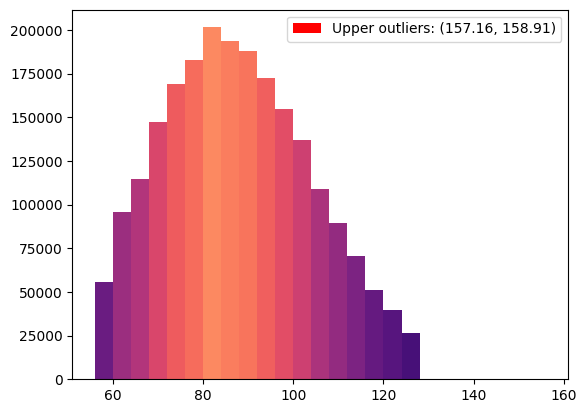

In [ ]:
adb.outliers_histogram(data=heart_rate['value']).show()

In [ ]:
# Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
grouped_stats = heart_rate.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename the lambda functions for quartiles for better understanding
grouped_stats.rename(columns={
    '<lambda_0>': 'Q1',
    '<lambda_1>': 'Q3'
}, inplace=True)

# Calculate IQR for each 'itemid'
grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

# Calculate lower bound and upper bound for outliers detection
grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

# Display the statistics for each unique 'itemid'
print(grouped_stats)

            min      max       mean    Q1     Q3   IQR  lower_bound  \
itemid                                                                
6640   -23421.0  96160.0  87.464232  74.0  100.0  26.0         35.0   

        upper_bound  
itemid               
6640          139.0  


In [ ]:
# Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
grouped_stats = heart_rate.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Rename the lambda functions for quartiles for better understanding
grouped_stats.rename(columns={
    '<lambda_0>': 'Q1',
    '<lambda_1>': 'Q3'
}, inplace=True)

# Calculate IQR for each 'itemid'
grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

# Calculate lower bound and upper bound for outliers detection
grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

# Display the statistics for each unique 'itemid'
print(grouped_stats)

         min         max       mean    Q1    Q3   IQR  lower_bound  \
itemid                                                               
6640    54.0  158.906833  86.980141  75.0  99.0  24.0         39.0   

        upper_bound  
itemid               
6640          135.0  


In [ ]:
columns_to_process = ['value']

# Assuming 'heart_rate' is your DataFrame containing 'value' column

# Normalize data before feeding into the autoencoder
normalized_data = heart_rate[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

# Build the autoencoder model
input_dim = len(columns_to_process)
encoding_dim = 5  # Define the size of the encoded representation

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with early stopping
history = autoencoder.fit(
    normalized_data, normalized_data,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

autoencoder_save_path = f'/content/drive/MyDrive/MLRH/Autoencoders/heart_rate_autoencoder_{history.epoch[-1]+1}_{history.history["val_loss"][-1]:.6f}.h5'

autoencoder.save(autoencoder_save_path)

Epoch 1/50
55466/55466 [==============================] - 151s 3ms/step - loss: 0.0648 - val_loss: 4.5409
Epoch 2/50
55466/55466 [==============================] - 132s 2ms/step - loss: 0.0635 - val_loss: 4.5409
Epoch 3/50
55466/55466 [==============================] - 131s 2ms/step - loss: 0.0635 - val_loss: 4.5409
Epoch 4/50
55466/55466 [==============================] - 134s 2ms/step - loss: 0.0635 - val_loss: 4.5409
Epoch 5/50
55466/55466 [==============================] - 130s 2ms/step - loss: 0.0635 - val_loss: 4.5409
Epoch 6/50
55466/55466 [==============================] - 133s 2ms/step - loss: 0.0635 - val_loss: 4.5409
Epoch 7/50
55466/55466 [==============================] - 130s 2ms/step - loss: 0.0635 - val_loss: 4.5409
Epoch 8/50
55466/55466 [==============================] - 132s 2ms/step - loss: 0.0635 - val_loss: 4.5409
Epoch 9/50
55466/55466 [==============================] - 132s 2ms/step - loss: 0.0635 - val_loss: 4.5409


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Path to the saved autoencoder model
autoencoder_model_path = '/content/drive/MyDrive/MLRH/Autoencoders/heart_rate_autoencoder_9_4.540936.h5'

# Load the saved autoencoder model
autoencoder = load_model(autoencoder_model_path)

normalized_data = heart_rate[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

# Use the trained autoencoder to reconstruct the input data
reconstructed_data = autoencoder.predict(normalized_data)
reconstructed_df = pd.DataFrame(reconstructed_data, columns=columns_to_process)

# Calculate the reconstruction error for each sample
reconstruction_errors = np.mean(np.square(normalized_data - reconstructed_data), axis=1)

# Set a threshold for outlier detection (e.g., 95th percentile of reconstruction errors)
threshold = np.percentile(reconstruction_errors, 95)

# Identify outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
iso_forest.fit(normalized_data)
outliers_iso = heart_rate[iso_forest.predict(normalized_data) == -1]

# Replace outliers using Gaussian Distribution (Ensuring values >= 0)
for column in columns_to_process:
    for valuid, group_data in heart_rate.groupby('itemid'):
        outliers_mask = (group_data[column].isin(outliers_iso[column]))  # Check outliers using Isolation Forest
        if outliers_mask.sum() > 0:
            non_outliers_data = group_data.loc[~outliers_mask, column]

            # Method 2: Gaussian Distribution (Ensuring values >= 0)
            mean_without_outliers = max(non_outliers_data.mean(), 0)
            std_without_outliers = max(non_outliers_data.std(), 0)

            # Generate replacement values based on a percentile of non-outliers' data distribution
            replacement_values = np.random.normal(mean_without_outliers, std_without_outliers, outliers_mask.sum())
            replacement_values = np.maximum(replacement_values, 0)  # Ensure non-negativity

            # Replacing outliers based on a percentile (e.g., 5th percentile) of non-outliers' data
            percentile_val = np.percentile(non_outliers_data, 5)
            replacement_values = np.where(replacement_values < percentile_val, percentile_val, replacement_values)

            heart_rate.loc[outliers_mask & (heart_rate['itemid'] == valuid), column] = replacement_values

69333/69333 [==============================] - 141s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
outliers_iso

,admissionid,itemid,value,unitid,measuredat,registeredby
6,23050,6640,141.0,15,28140000,ICV_Medisch
8,23050,6640,158.0,15,13740000,ICV_Medisch
31,23166,6640,135.0,15,835560000,ICV_Medisch
44,23186,6640,154.0,15,259140000,ICV_Medisch
71,23285,6640,53.0,15,83280000,ICV_Medisch
...,...,...,...,...,...,...
2218621,5425,6640,175.0,15,202203180000,ICV_IC-Verpleegkundig
2218622,4658,6640,175.0,15,93060000,ICV_IC-Verpleegkundig
2218623,6276,6640,175.0,15,180960000,ICV_IC-Verpleegkundig
2218624,7641,6640,183.0,15,2160000,ICV_IC-Verpleegkundig


### ABP

In [ ]:
systolic_ABP = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
        6641 -- systolic ABP
    )
    '''
    , configuration=config_gbq)

mean_ABP = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
        6642 -- mean ABP
    )
    '''
    , configuration=config_gbq)

dystolic_ABP = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
      6643 --dystolic ABP
    )
    '''
    , configuration=config_gbq)

In [ ]:
missing_values_heart = heart_rate[heart_rate['value'].isnull()]

# This will give you a DataFrame containing rows where 'creat' column has missing values
print(missing_values_heart)


##### No missing values

Empty DataFrame
Columns: [admissionid, itemid, value, unitid, measuredat, registeredby]
Index: []


In [ ]:
# List of DataFrames to process
data_frames = [systolic_ABP, mean_ABP, dystolic_ABP]
data_frames_names = ['systolic_ABP', 'mean_ABP', 'dystolic_ABP']

for i, df in enumerate(data_frames):
    # Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
    grouped_stats = df.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

    # Rename the lambda functions for quartiles for better understanding
    grouped_stats.rename(columns={
        '<lambda_0>': 'Q1',
        '<lambda_1>': 'Q3'
    }, inplace=True)

    # Calculate IQR for each 'itemid'
    grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

    # Calculate lower bound and upper bound for outliers detection
    grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
    grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

    # Display the statistics for each unique 'itemid'
    print(f"Statistics for {data_frames_names[i]} DataFrame:")
    print(grouped_stats)
    print('\n')

Statistics for systolic_ABP DataFrame:
            min       max        mean     Q1     Q3   IQR  lower_bound  \
itemid                                                                   
6641   -32697.0  336170.0  131.424508  112.0  148.0  36.0         58.0   

        upper_bound  
itemid               
6641          202.0  


Statistics for mean_ABP DataFrame:
            min        max       mean    Q1    Q3   IQR  lower_bound  \
itemid                                                                 
6642   -32698.0  6395322.0  87.699489  72.0  94.0  22.0         39.0   

        upper_bound  
itemid               
6642          127.0  


Statistics for dystolic_ABP DataFrame:
            min        max       mean    Q1    Q3   IQR  lower_bound  \
itemid                                                                 
6643   -32700.0  8052820.0  65.488881  53.0  69.0  16.0         29.0   

        upper_bound  
itemid               
6643           93.0  




In [ ]:
# List of DataFrames to process
data_frames = [systolic_ABP, mean_ABP, dystolic_ABP]
data_frames_names = ['systolic_ABP', 'mean_ABP', 'dystolic_ABP']

for i, df in enumerate(data_frames):
    # Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
    grouped_stats = df.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

    # Rename the lambda functions for quartiles for better understanding
    grouped_stats.rename(columns={
        '<lambda_0>': 'Q1',
        '<lambda_1>': 'Q3'
    }, inplace=True)

    # Calculate IQR for each 'itemid'
    grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

    # Calculate lower bound and upper bound for outliers detection
    grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
    grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

    # Display the statistics for each unique 'itemid'
    print(f"Statistics for {data_frames_names[i]} DataFrame:")
    print(grouped_stats)
    print('\n')

Statistics for systolic_ABP DataFrame:
         min         max       mean     Q1     Q3   IQR  lower_bound  \
itemid                                                                 
6641    82.0  230.582524  129.54776  112.0  146.0  34.0         61.0   

        upper_bound  
itemid               
6641          197.0  


Statistics for mean_ABP DataFrame:
         min         max       mean    Q1    Q3   IQR  lower_bound  \
itemid                                                               
6642    57.0  141.925621  83.506236  73.0  93.0  20.0         43.0   

        upper_bound  
itemid               
6642          123.0  


Statistics for dystolic_ABP DataFrame:
         min        max       mean    Q1    Q3   IQR  lower_bound  upper_bound
itemid                                                                        
6643    39.0  106.66195  60.981933  53.0  68.0  15.0         30.5         90.5




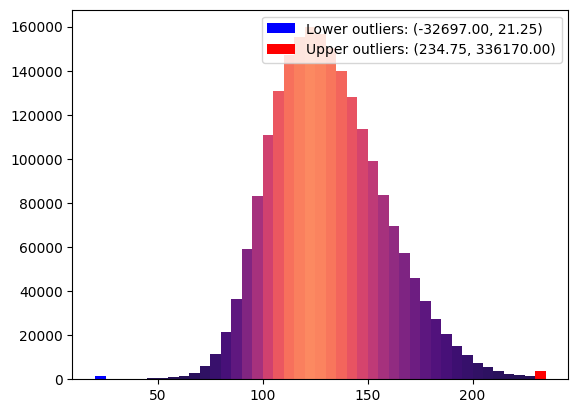

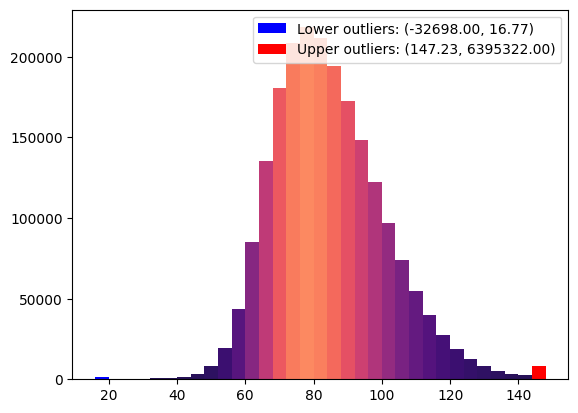

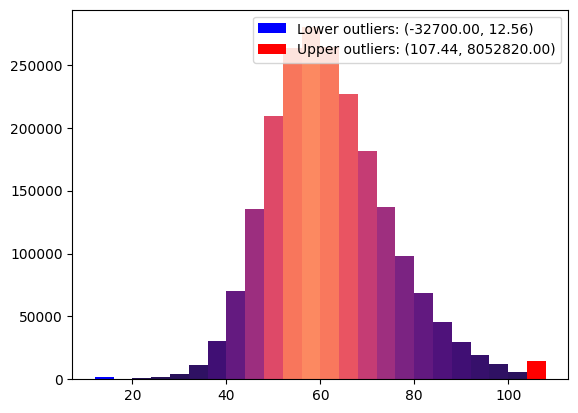

In [ ]:
import matplotlib.pyplot as plt

def outliers_histogram(data_frames):

  adb.outliers_histogram(data_frames).show()

# Assuming systolic_ABP, mean_ABP, diastolic_ABP are your DataFrames
data_frames = [systolic_ABP, mean_ABP, dystolic_ABP]

# Loop through each data frame and generate histograms
for df in data_frames:
    outliers_histogram(df['value'])

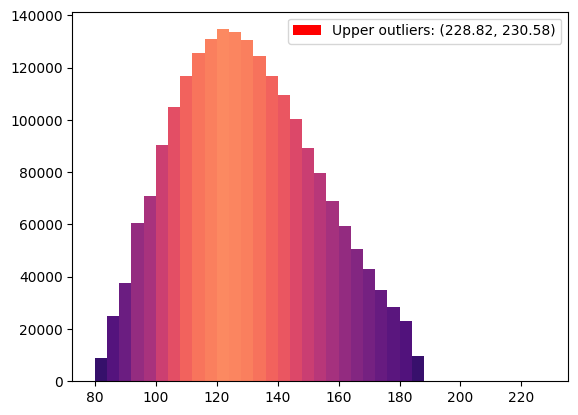

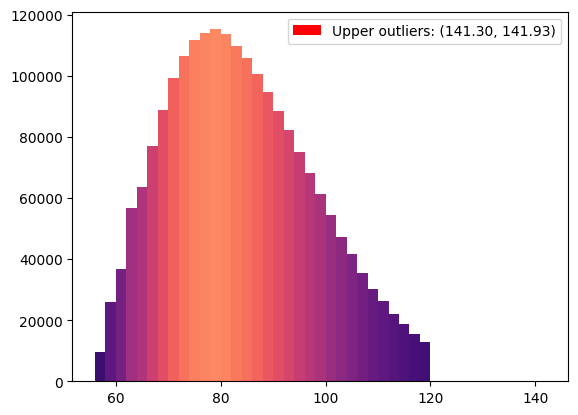

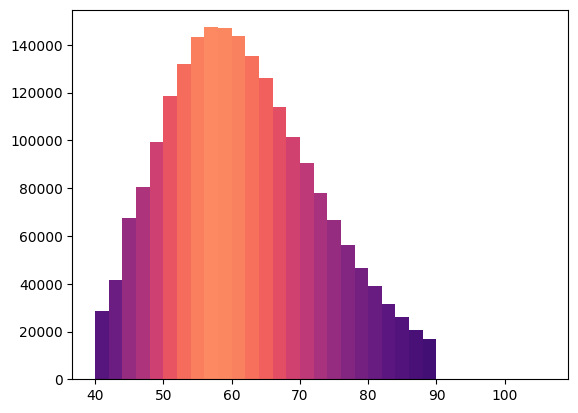

In [ ]:
import matplotlib.pyplot as plt

def outliers_histogram(data_frames):

  adb.outliers_histogram(data_frames).show()

# Assuming systolic_ABP, mean_ABP, diastolic_ABP are your DataFrames
data_frames = [systolic_ABP, mean_ABP, dystolic_ABP]

# Loop through each data frame and generate histograms
for df in data_frames:
    outliers_histogram(df['value'])

In [ ]:
# Function to train an autoencoder
def train_autoencoder(data, columns_to_process, model_save_path):
    # Normalize data before feeding into the autoencoder
    normalized_data = data[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

    # Build the autoencoder model
    input_dim = len(columns_to_process)
    encoding_dim = 5  # Define the size of the encoded representation

    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping criteria
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the autoencoder with early stopping
    history = autoencoder.fit(
        normalized_data, normalized_data,
        epochs=5,
        batch_size=32,
        shuffle=True,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    autoencoder.save(model_save_path)

# Paths to save the models
systolic_ABP_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/systolic_ABP_autoencoder.h5'
mean_ABP_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/mean_ABP_autoencoder.h5'
dystolic_ABP_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/dystolic_ABP_autoencoder.h5'

# Assuming systolic_ABP, mean_ABP, diastolic_ABP are your DataFrames

# # Train autoencoder for systolic_ABP
# train_autoencoder(systolic_ABP, ['value'], systolic_ABP_save_path)

# Train autoencoder for mean_ABP
train_autoencoder(mean_ABP, ['value'], mean_ABP_save_path)

# Train autoencoder for diastolic_ABP
train_autoencoder(dystolic_ABP, ['value'], dystolic_ABP_save_path)

Epoch 1/5
52730/52730 [==============================] - 132s 2ms/step - loss: 1.2500 - val_loss: 1.4355e-04
Epoch 2/5
52730/52730 [==============================] - 131s 2ms/step - loss: 1.2479 - val_loss: 1.4355e-04
Epoch 3/5
52730/52730 [==============================] - 122s 2ms/step - loss: 1.2480 - val_loss: 1.4355e-04
Epoch 4/5
52730/52730 [==============================] - 125s 2ms/step - loss: 1.2480 - val_loss: 1.4355e-04
Epoch 5/5
52730/52730 [==============================] - 125s 2ms/step - loss: 1.2480 - val_loss: 1.4355e-04
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52734/52734 [==============================] - 127s 2ms/step - loss: 1.2498 - val_loss: 1.7256e-04
Epoch 2/5
52734/52734 [==============================] - 127s 2ms/step - loss: 1.2482 - val_loss: 1.7256e-04
Epoch 3/5
52734/52734 [==============================] - 128s 2ms/step - loss: 1.2482 - val_loss: 1.7256e-04
Epoch 4/5
52734/52734 [==============================] - 126s 2ms/step - loss: 1.2482 - val_loss: 1.7256e-04
Epoch 5/5
52734/52734 [==============================] - 131s 2ms/step - loss: 1.2482 - val_loss: 1.7256e-04


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Paths to the saved autoencoder models
systolic_ABP_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/systolic_ABP_autoencoder.h5'
mean_ABP_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/mean_ABP_autoencoder.h5'
dystolic_ABP_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/dystolic_ABP_autoencoder.h5'

# Load the saved autoencoder models for systolic_ABP, mean_ABP, and dystolic_ABP
def load_autoencoder_model(model_save_path):
    return load_model(model_save_path)

systolic_ABP_autoencoder = load_autoencoder_model(systolic_ABP_save_path)
mean_ABP_autoencoder = load_autoencoder_model(mean_ABP_save_path)
dystolic_ABP_autoencoder = load_autoencoder_model(dystolic_ABP_save_path)

# Assuming 'systolic_ABP', 'mean_ABP', 'dystolic_ABP', and 'columns_to_process' exist

# Normalizing the three DataFrames
def normalize_dataframe(df, columns_to_process):
    return df[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

normalized_systolic_ABP = normalize_dataframe(systolic_ABP, columns_to_process)
normalized_mean_ABP = normalize_dataframe(mean_ABP, columns_to_process)
normalized_dystolic_ABP = normalize_dataframe(dystolic_ABP, columns_to_process)

# Define the outlier replacement function
def replace_outliers_with_gaussian(df, autoencoder, normalized_data, columns_to_process):
    # Use the trained autoencoder model to reconstruct the input data
    reconstructed_data = autoencoder.predict(normalized_data)

    # Calculate the reconstruction error for each sample
    reconstruction_errors = np.mean(np.square(normalized_data - reconstructed_data), axis=1)

    # Set a threshold for outlier detection (e.g., 95th percentile of reconstruction errors)
    threshold = np.percentile(reconstruction_errors, 95)

    # Identify outliers using Isolation Forest
    iso_forest = IsolationForest(contamination=0.05)
    iso_forest.fit(normalized_data)
    outliers_iso = df[iso_forest.predict(normalized_data) == -1]

    # Outlier replacement using Gaussian Distribution and percentile replacement
    for column in columns_to_process:
        for valuid, group_data in df.groupby('itemid'):
            outliers_mask = (group_data[column].isin(outliers_iso[column]))
            if outliers_mask.sum() > 0:
                non_outliers_data = group_data.loc[~outliers_mask, column]

                # Method 2: Gaussian Distribution (Ensuring values >= 0)
                mean_without_outliers = max(non_outliers_data.mean(), 0)
                std_without_outliers = max(non_outliers_data.std(), 0)

                # Generate replacement values based on a percentile of non-outliers' data distribution
                replacement_values = np.random.normal(mean_without_outliers, std_without_outliers,
                                                      outliers_mask.sum())
                replacement_values = np.maximum(replacement_values, 0)  # Ensure non-negativity

                # Replacing outliers based on a percentile (e.g., 5th percentile) of non-outliers' data
                percentile_val = np.percentile(non_outliers_data, 5)
                replacement_values = np.where(replacement_values < percentile_val, percentile_val,
                                              replacement_values)

                df.loc[outliers_mask & (df['itemid'] == valuid), column] = replacement_values


# Loop through each DataFrame and perform outlier replacement
for df, autoencoder, normalized_data in zip([systolic_ABP, mean_ABP, dystolic_ABP],
                                            [systolic_ABP_autoencoder, mean_ABP_autoencoder, dystolic_ABP_autoencoder],
                                            [normalized_systolic_ABP, normalized_mean_ABP, normalized_dystolic_ABP]):
    replace_outliers_with_gaussian(df, autoencoder, normalized_data, columns_to_process)

65930/65930 [==============================] - 121s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


65912/65912 [==============================] - 111s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


65918/65918 [==============================] - 106s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
#heart_rate
systolic_ABP

,admissionid,itemid,value,unitid,measuredat,registeredby
0,240,6641,100.0,173,22940760000,Consulent
1,1024,6641,126.0,173,424140000,ICV_Medisch
2,1280,6641,125.0,173,65100000,ICV_Medisch
3,514,6641,183.0,173,1259280000,ICV_Medisch
4,514,6641,133.0,173,2880000,ICV_Medisch
...,...,...,...,...,...,...
2109753,20401,6641,255.0,173,308940000,ICV_IC-Verpleegkundig
2109754,20700,6641,270.0,173,1793700000,ICV_IC-Verpleegkundig
2109755,18757,6641,302.0,173,1419840000,ICV_MC-Verpleegkundig
2109756,18969,6641,271.0,173,97740000,ICV_IC-Verpleegkundig


In [ ]:
save_path = '/content/drive/MyDrive/MLRH/Dataframes/'

creat.to_csv(save_path + 'creat.csv', index=False)
# urine.to_csv(save_path + 'urine.csv', index=False)
# temp.to_csv(save_path + 'temp.csv', index=False)
# heart_rate.to_csv(save_path + 'heart_rate.csv', index=False)
# systolic_ABP.to_csv(save_path + 'systolic_ABP.csv', index=False)
# mean_ABP.to_csv(save_path + 'mean_ABP.csv', index=False)
# dystolic_ABP.to_csv(save_path + 'dystolic_ABP.csv', index=False)

### Other Variables

#### Load in variables

In [ ]:
glucose = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
      9947 -- Glucose
    )
    '''
    , configuration=config_gbq)

hema = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
      6778 -- Hemaglobine
       , 9960 -- Hemoglobine
    )
    '''
    , configuration=config_gbq)

calcium = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
       6817 --Calcium
        , 9933 -- Calcium totaal
        , 9934 -- CALCIUM (overig)
        , 10275 -- Calcium totaal (urine),
        , 10276 -- CALCIUM (verz. urine),,,,,CALCIUM-vur
        , 12216 -- CALCIUM      (overig)
        , 12217 -- Calcium totaal (verz. urine)
    )
    '''
    , configuration=config_gbq)

kalium = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
       9927 -- Kalium (bloed),potassium,
        , 6835 -- Kalium,serum potassium
        , 9929 -- Kalium (overig),,,,,Kalium (overig)
    )
    '''
    , configuration=config_gbq)

ox_sat = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
       6709 -- Oxygen Saturation (monitor)
    )
    '''
    , configuration=config_gbq)

thrombo = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , unitid
        , measuredat
        , registeredby
    FROM numericitems_validated
    WHERE itemid IN (
       6797 --Thrombocyten,platelets
        , 9964 --Thrombo's (bloed),platelets
        , 10409 --Thrombo's citr. bloed (bloed)
        , 14252 --Thrombo CD61 (bloed)
    )
    '''
    , configuration=config_gbq)


In [ ]:
# bilirubine = pd.read_gbq(
#     '''
#     SELECT
#         n.admissionid,
#         n.itemid,
#         n.item,
#         n.measuredat,
#         n.value,
#         n.registeredby,
#         CASE
#             WHEN n.registeredby NOT LIKE '%Systeem%' THEN TRUE
#             ELSE FALSE
#         END AS manual_entry,
#         (n.measuredat - a.admittedat)/(1000*60) AS time
#     FROM numericitems n
#     LEFT JOIN admissions a ON
#         n.admissionid = a.admissionid
#         WHERE n.itemid IN (
#             6813, --Bili Totaal
#             9945 --Bilirubine (bloed)
#         )
#     '''
#     , configuration=config_gbq)

# leukocyten = pd.read_gbq(
#     '''
#     SELECT
#         admissionid
#         , itemid
#         , value
#         , unitid
#         , measuredat
#         , registeredby
#     FROM numericitems_validated
#     WHERE itemid IN (
#        6779, --Leucocyten,white blood cell
#        9965 -- Leuco's (bloed),white blood cell count,LOINC,26464-8,Leukocytes [#/volume] in Blood,
#     )
#     '''
#     , configuration=config_gbq)

hematocryt = pd.read_gbq(
    '''
    SELECT
        n.admissionid,
        n.itemid,
        n.measuredat,
        n.item,
        n.value,
        n.registeredby,
        CASE
            WHEN n.registeredby NOT LIKE '%Systeem%' THEN TRUE
            ELSE FALSE
        END AS manual_entry,
        (n.measuredat - a.admittedat)/(1000*60) AS time
    FROM numericitems n
    LEFT JOIN admissions a ON
        n.admissionid = a.admissionid
    WHERE n.itemid IN (
        6777, --Hematocriet
        11423, --Ht (bloed)
        11545 --Ht(v.Bgs) (bloed)
        )
    '''
    , configuration=config_gbq)


In [ ]:
lactate = pd.read_gbq(
    '''
    SELECT
        n.admissionid,
        n.itemid,
        n.item,
        n.measuredat,
        n.value,
        n.registeredby,
        CASE
            WHEN n.registeredby NOT LIKE '%Systeem%' THEN TRUE
            ELSE FALSE
        END AS manual_entry,
        (n.measuredat - a.admittedat)/(1000*60) AS time
    FROM numericitems n
    LEFT JOIN admissions a ON
        n.admissionid = a.admissionid
    WHERE n.itemid IN (
        10053 --Lactaat (bloed)
        ,6837 --Laktaat
        ,9580 --Laktaat Astrup
        )
    '''
    , configuration=config_gbq)

sodium = pd.read_gbq(
    '''
    SELECT
        n.admissionid,
        n.itemid,
        n.item,
        n.measuredat,
        n.value,
        n.registeredby,
        CASE
            WHEN n.registeredby NOT LIKE '%Systeem%' THEN TRUE
            ELSE FALSE
        END AS manual_entry,
        (n.measuredat - a.admittedat)/(1000*60) AS time
    FROM numericitems n
    LEFT JOIN admissions a ON
        n.admissionid = a.admissionid
    WHERE n.itemid IN (
        6840, --Natrium
        9555, --Natrium Astrup
        9924, --Natrium (bloed)
        10284 --Na (onv.ISE) (bloed)
        )
    '''
    , configuration=config_gbq)

osmo = pd.read_gbq(
    '''
    SELECT
        n.admissionid,
        n.itemid,
        n.item,
        n.measuredat,
        n.value,
        n.registeredby,
        CASE
            WHEN n.registeredby NOT LIKE '%Systeem%' THEN TRUE
            ELSE FALSE
        END AS manual_entry,
        (n.measuredat - a.admittedat)/(1000*60) AS time
    FROM numericitems n
    LEFT JOIN admissions a ON
        n.admissionid = a.admissionid
    WHERE n.itemid IN (
        7840, --Osmolaliteit van urine
        11921 --Osmolaliteit (urine),,,,,Osmolaliteit

        )
    '''
    , configuration=config_gbq)

In [ ]:
ph = pd.read_gbq(
    '''
    SELECT
        n.admissionid,
        n.itemid,
        n.item,
        n.measuredat,
        n.value,
        f.value AS specimen_source,
        n.registeredby,
        CASE
            WHEN n.registeredby NOT LIKE '%Systeem%' THEN TRUE
            ELSE FALSE
        END AS manual_entry,
        (n.measuredat - a.admittedat)/(1000*60) AS time
    FROM numericitems n
    LEFT JOIN admissions a ON
        n.admissionid = a.admissionid
    LEFT JOIN freetextitems f ON
        n.admissionid = f.admissionid AND
        n.measuredat = f.measuredat AND
        f.itemid = 11646 --Afname (bloed): source of specimen (arterial)
    WHERE n.itemid IN (
        6848, --PH
        12310 --pH (bloed)
        )
    AND (f.value LIKE '%art.%' OR f.value IS NULL) -- source is arterial or undefined (assume arterial)
    '''
    , configuration=config_gbq)


In [ ]:
dataframes = ['osmo']

# Albumine, ph, osmo

# Loop through each DataFrame and print the count of unique admission IDs
for df_name in dataframes:
    df = globals()[df_name]  # Get the DataFrame using its name
    unique_admission_ids = df['admissionid'].nunique()  # Count unique admission IDs
    print(f"DataFrame '{df_name}' has {unique_admission_ids} unique admission IDs.")

DataFrame 'osmo' has 2657 unique admission IDs.


In [ ]:
# List of dataframe names as strings
dataframes = ['glucose', 'hema', 'calcium', 'kalium', 'ox_sat', 'thrombo', 'bilirubine', 'troponine', 'albumine', 'leukocyten', 'hematocryt', 'ph', 'lactate', 'sodium', 'osmo']

# Albumine, ph, osmo

# Loop through each DataFrame and print the count of unique admission IDs
for df_name in dataframes:
    df = globals()[df_name]  # Get the DataFrame using its name
    unique_admission_ids = df['admissionid'].nunique()  # Count unique admission IDs
    print(f"DataFrame '{df_name}' has {unique_admission_ids} unique admission IDs.")

DataFrame 'glucose' has 22262 unique admission IDs.
DataFrame 'hema' has 22951 unique admission IDs.
DataFrame 'calcium' has 20099 unique admission IDs.
DataFrame 'kalium' has 22661 unique admission IDs.
DataFrame 'ox_sat' has 22978 unique admission IDs.
DataFrame 'thrombo' has 22942 unique admission IDs.
DataFrame 'bilirubine' has 12791 unique admission IDs.
DataFrame 'troponine' has 8784 unique admission IDs.
DataFrame 'albumine' has 69 unique admission IDs.
DataFrame 'leukocyten' has 22922 unique admission IDs.
DataFrame 'hematocryt' has 22993 unique admission IDs.
DataFrame 'ph' has 9446 unique admission IDs.
DataFrame 'lactate' has 17461 unique admission IDs.
DataFrame 'sodium' has 23012 unique admission IDs.
DataFrame 'osmo' has 1942 unique admission IDs.


#### Imputation

In [ ]:
# List of dataframe names as strings
data_frames_names = [
    'glucose', 'hema', 'calcium', 'kalium', 'ox_sat', 'thrombo', 'bilirubine',
    'troponine', 'leukocyten', 'hematocryt', 'lactate', 'sodium' #,ph
]

# Fetching the dataframes using their names
data_frames = [globals()[df_name] for df_name in dataframe_names]


for i, df in enumerate(data_frames):
    # Calculate lower bound, upper bound, and mean for 'value' column per unique 'itemid'
    grouped_stats = df.groupby('itemid')['value'].agg(['min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

    # Rename the lambda functions for quartiles for better understanding
    grouped_stats.rename(columns={
        '<lambda_0>': 'Q1',
        '<lambda_1>': 'Q3'
    }, inplace=True)

    # Calculate IQR for each 'itemid'
    grouped_stats['IQR'] = grouped_stats['Q3'] - grouped_stats['Q1']

    # Calculate lower bound and upper bound for outliers detection
    grouped_stats['lower_bound'] = grouped_stats['Q1'] - 1.5 * grouped_stats['IQR']
    grouped_stats['upper_bound'] = grouped_stats['Q3'] + 1.5 * grouped_stats['IQR']

    # Display the statistics for each unique 'itemid'
    print(f"Statistics for {data_frames_names[i]} DataFrame:")
    print(grouped_stats)
    print('\n')

Statistics for glucose DataFrame:
        min       max      mean   Q1   Q3  IQR  lower_bound  upper_bound
itemid                                                                  
9947   -1.0  444444.0  8.336074  6.2  8.8  2.6     2.299999    12.700001


Statistics for hema DataFrame:
        min    max      mean   Q1   Q3  IQR  lower_bound  upper_bound
itemid                                                               
6778    0.0  502.0  5.983848  5.2  6.4  1.2     3.399999     8.200001
9960    0.0  308.0  6.563166  5.6  7.3  1.7     3.049999     9.850001


Statistics for calcium DataFrame:
         min     max      mean     Q1     Q3    IQR  lower_bound  upper_bound
itemid                                                                       
6817    0.00  233.00  3.391869  1.810  2.130  0.320       1.3300       2.6100
9933    0.00  197.00  2.031331  1.900  2.150  0.250       1.5250       2.5250
9934    0.84    8.61  1.790000  1.410  1.615  0.205       1.1025       1.9225
10275   

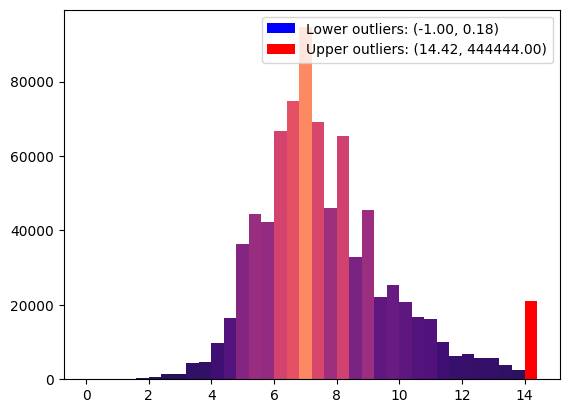

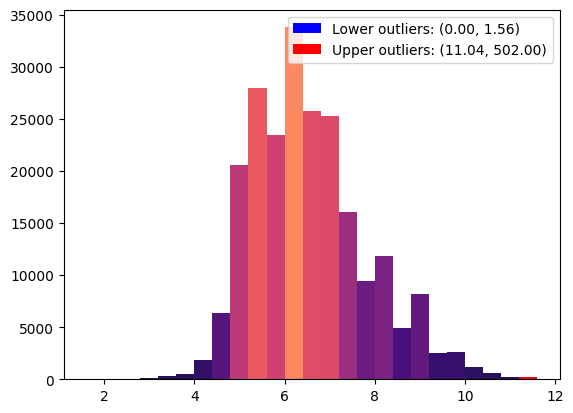

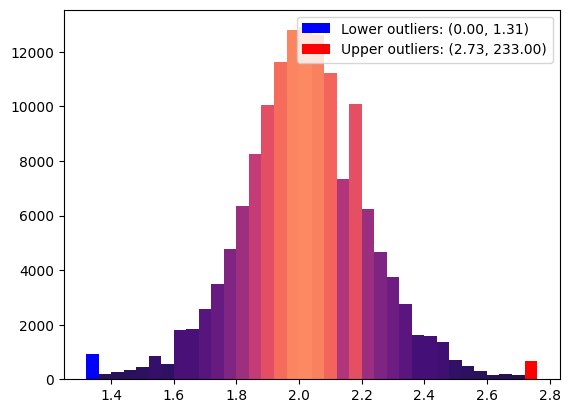

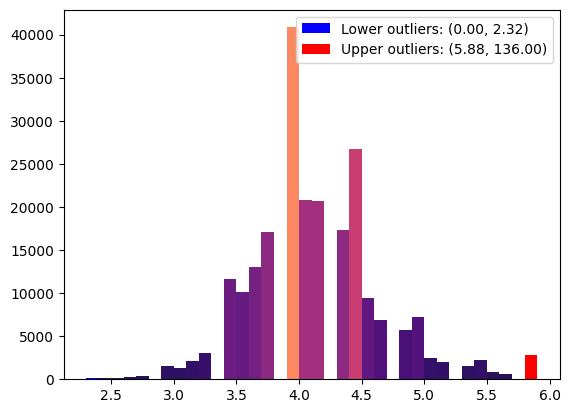

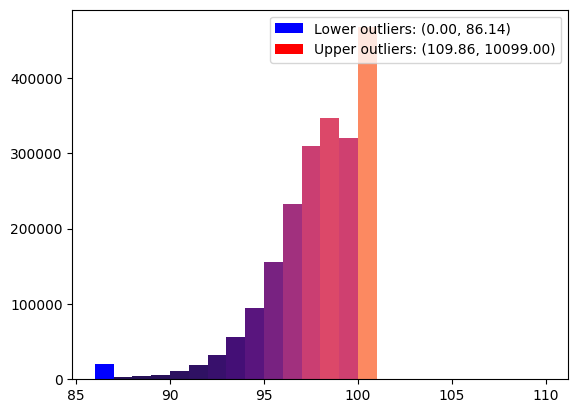

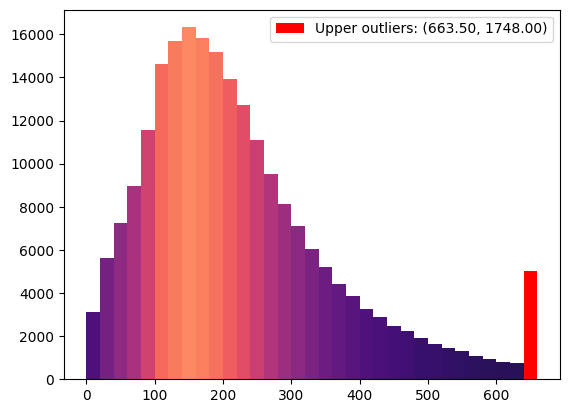

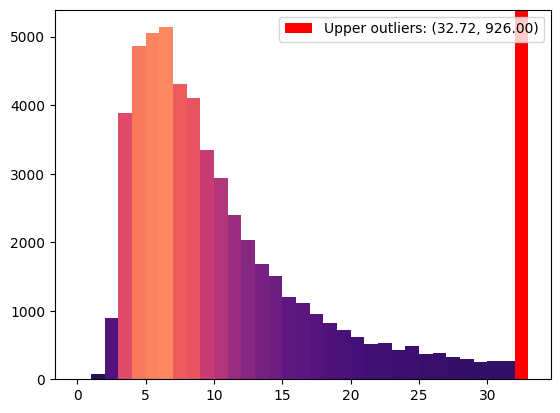

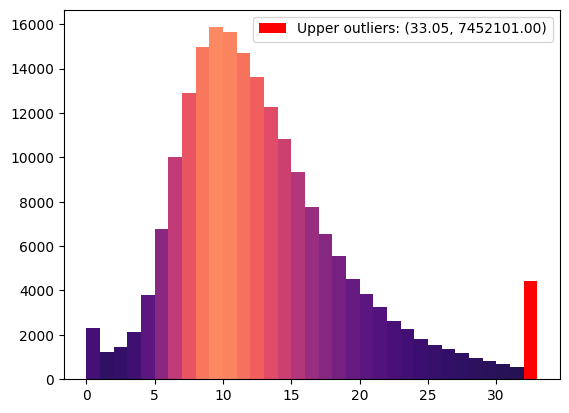

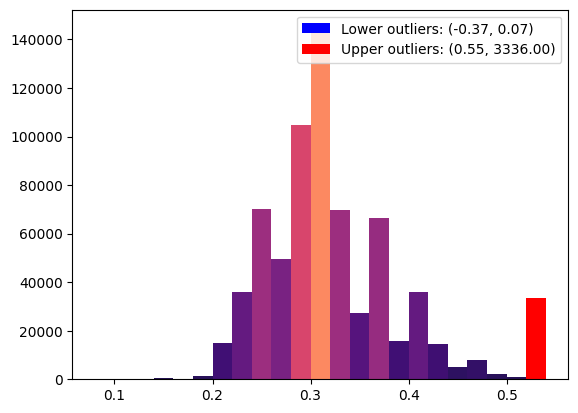

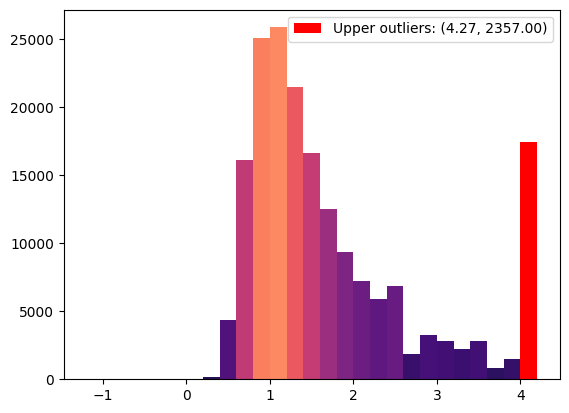

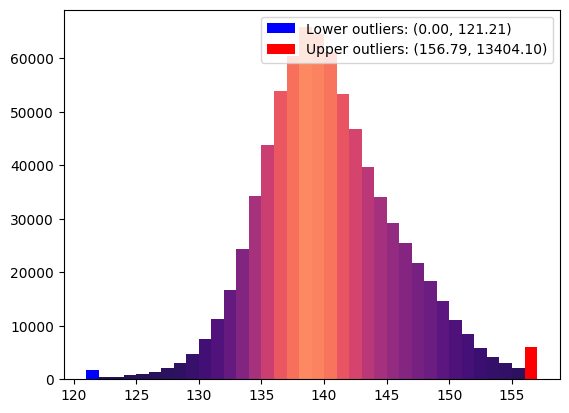

In [ ]:
import matplotlib.pyplot as plt

def outliers_histogram(data_frames):

  adb.outliers_histogram(data_frames).show()

data_frames_names = [
    'glucose', 'hema', 'calcium', 'kalium', 'ox_sat', 'thrombo', 'bilirubine',
    'leukocyten', 'hematocryt',  'lactate', 'sodium' #,ph
]

# Fetching the dataframes using their names
data_frames = [globals()[df_name] for df_name in data_frames_names]

# Loop through each data frame and generate histograms
for df in data_frames:
    outliers_histogram(df['value'])

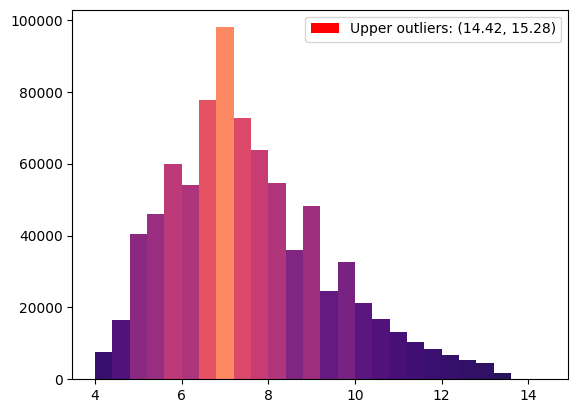

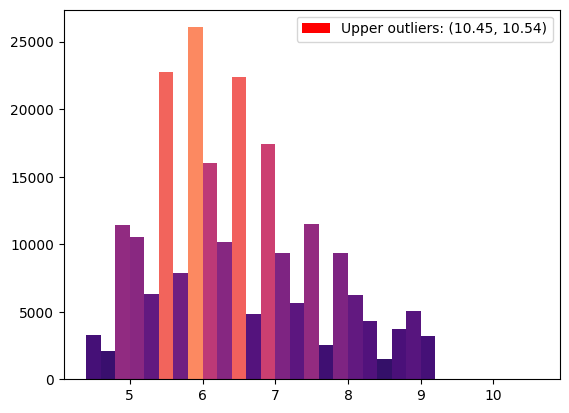

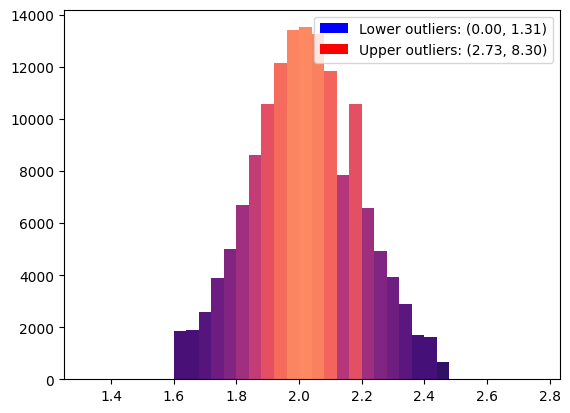

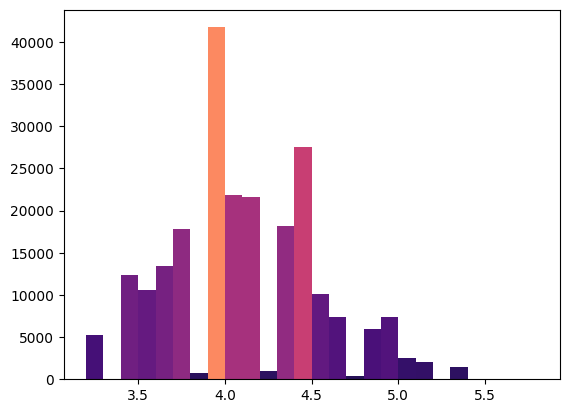

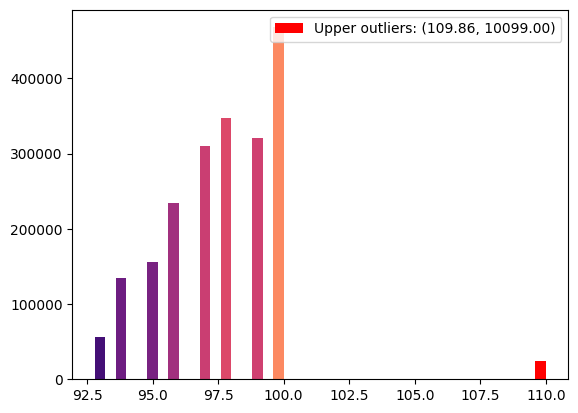

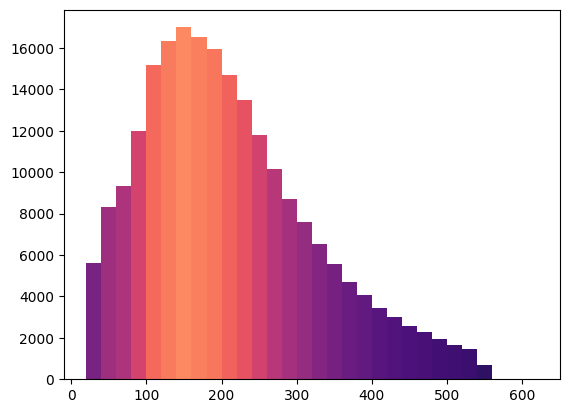

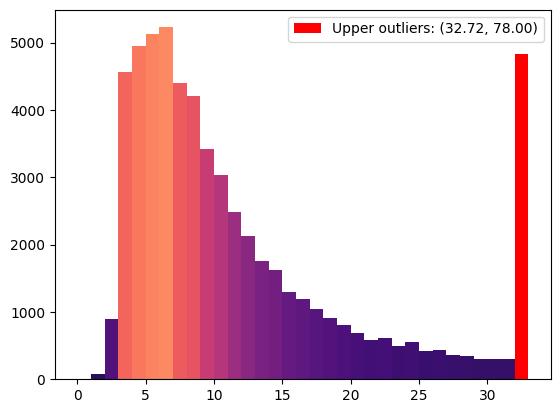

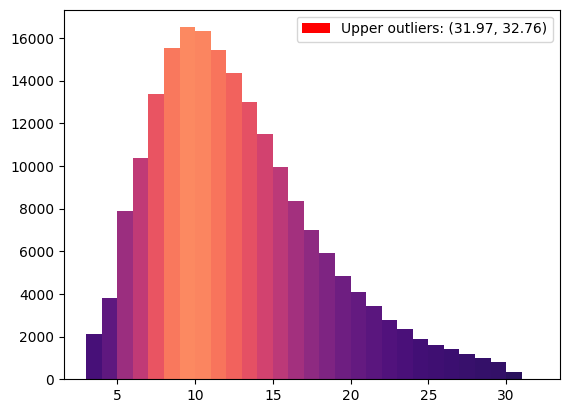

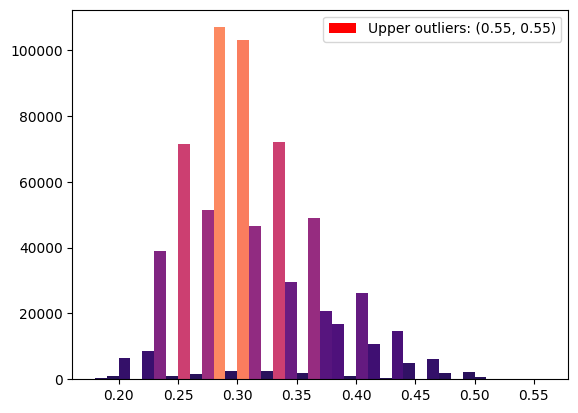

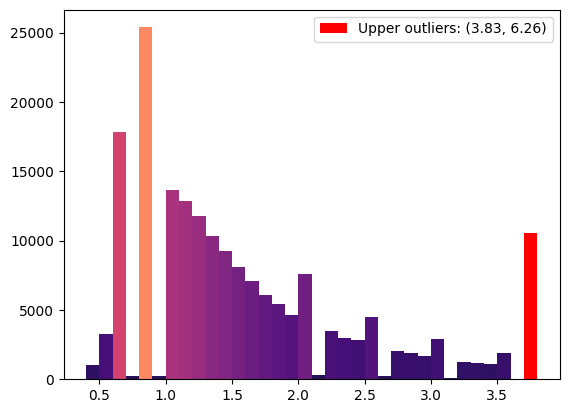

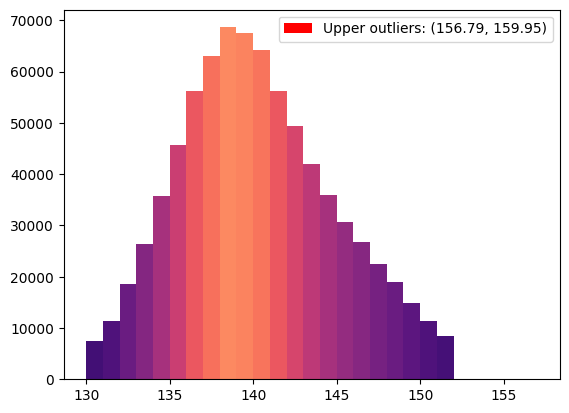

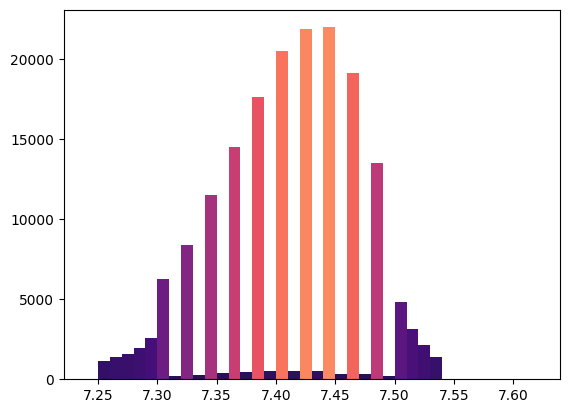

In [ ]:
import matplotlib.pyplot as plt

def outliers_histogram(data_frames):

  adb.outliers_histogram(data_frames).show()

data_frames_names = [
    'glucose', 'hema', 'calcium', 'kalium', 'ox_sat', 'thrombo', 'bilirubine', 'leukocyten', 'hematocryt',  'lactate', 'sodium' ,'ph'
]

# Fetching the dataframes using their names
data_frames = [globals()[df_name] for df_name in data_frames_names]

# Loop through each data frame and generate histograms
for df in data_frames:
    outliers_histogram(df['value'])

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
import os

# List of dataframe names as strings
dataframe_names = [
    #'glucose', 'hema', 'calcium', 'kalium', 'ox_sat', 'thrombo', 'bilirubine',
    #'troponine', 'leukocyten',
    #'hematocryt', 'lactate', 'sodium'
    'ph'
] #ph

columns_to_process = ['value']

# Define autoencoder parameters
input_dim = len(columns_to_process)
encoding_dim = 5  # Define the size of the encoded representation
autoencoder_models = {}  # Dictionary to store autoencoder models for each dataframe

save_directory = '/content/drive/MyDrive/MLRH/Autoencoders/Other/'

for df_name in dataframe_names:
    # Fetching the dataframe using its name
    df = globals()[df_name]  # Assuming the dataframes are in the global scope

    # Normalize data before feeding into the autoencoder
    normalized_data = df[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

    # Build the autoencoder model
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping criteria
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the autoencoder with early stopping
    history = autoencoder.fit(
        normalized_data, normalized_data,
        epochs=10,
        batch_size=32,
        shuffle=True,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Save the trained autoencoder model
    autoencoder_models[df_name] = autoencoder  # Storing the model in a dictionary for later access

    # Path to save the autoencoder model
    autoencoder_save_path = os.path.join(save_directory, f'{df_name}_autoencoder.h5')
    autoencoder.save(autoencoder_save_path)

Epoch 1/10
4509/4509 [==============================] - 27s 6ms/step - loss: 0.7928 - val_loss: 1.8858
Epoch 2/10
4509/4509 [==============================] - 17s 4ms/step - loss: 0.7319 - val_loss: 1.8779
Epoch 3/10
4509/4509 [==============================] - 17s 4ms/step - loss: 0.7287 - val_loss: 1.8769
Epoch 4/10
4509/4509 [==============================] - 17s 4ms/step - loss: 0.7281 - val_loss: 1.8767
Epoch 5/10
4509/4509 [==============================] - 17s 4ms/step - loss: 0.7281 - val_loss: 1.8766
Epoch 6/10
4509/4509 [==============================] - 18s 4ms/step - loss: 0.7280 - val_loss: 1.8766
Epoch 7/10
4509/4509 [==============================] - 17s 4ms/step - loss: 0.7280 - val_loss: 1.8766
Epoch 8/10
4509/4509 [==============================] - 18s 4ms/step - loss: 0.7280 - val_loss: 1.8766
Epoch 9/10
4509/4509 [==============================] - 17s 4ms/step - loss: 0.7280 - val_loss: 1.8766
Epoch 10/10
4509/4509 [==============================] - 20s 4ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.ensemble import IsolationForest
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats.mstats import winsorize
from tensorflow.keras.models import load_model

columns_to_process = ['value']

# Load the saved autoencoder models for systolic_ABP, mean_ABP, and dystolic_ABP
def load_autoencoder_model(model_save_path):
    return load_model(model_save_path)

# Paths to the saved autoencoder models
# glucose_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/glucose_autoencoder.h5'
# hema_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/hema_autoencoder.h5'
# calcium_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/calcium_autoencoder.h5'
# kalium_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/kalium_autoencoder.h5'
# ox_sat_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/ox_sat_autoencoder.h5'
# thrombo_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/thrombo_autoencoder.h5'
bilirubine_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/bilirubine_autoencoder.h5'
# leukocyten_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/leukocyten_autoencoder.h5'
hematocryt_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/hematocryt_autoencoder.h5'
lactate_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/lactate_autoencoder.h5'
sodium_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/sodium_autoencoder.h5'
# ph_save_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/ph_autoencoder.h5'


# Load the saved autoencoder models for each variable
# glucose_autoencoder = load_autoencoder_model(glucose_save_path)
# hema_autoencoder = load_autoencoder_model(hema_save_path)
# calcium_autoencoder = load_autoencoder_model(calcium_save_path)
# kalium_autoencoder = load_autoencoder_model(kalium_save_path)
# ox_sat_autoencoder = load_autoencoder_model(ox_sat_save_path)
# thrombo_autoencoder = load_autoencoder_model(thrombo_save_path)
bilirubine_autoencoder = load_autoencoder_model(bilirubine_save_path)
# leukocyten_autoencoder = load_autoencoder_model(leukocyten_save_path)
hematocryt_autoencoder = load_autoencoder_model(hematocryt_save_path)
lactate_autoencoder = load_autoencoder_model(lactate_save_path)
sodium_autoencoder = load_autoencoder_model(sodium_save_path)
# ph_autoencoder = load_autoencoder_model(ph_save_path)


# Normalizing the three DataFrames
def normalize_dataframe(df, columns_to_process):
    return df[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

# Normalizing the different DataFrames
# normalized_glucose = normalize_dataframe(glucose, columns_to_process)
# normalized_hema = normalize_dataframe(hema, columns_to_process)
# normalized_calcium = normalize_dataframe(calcium, columns_to_process)
# normalized_kalium = normalize_dataframe(kalium, columns_to_process)
# normalized_ox_sat = normalize_dataframe(ox_sat, columns_to_process)
# normalized_thrombo = normalize_dataframe(thrombo, columns_to_process)
normalized_bilirubine = normalize_dataframe(bilirubine, columns_to_process)
# normalized_leukocyten = normalize_dataframe(leukocyten, columns_to_process)
normalized_hematocryt = normalize_dataframe(hematocryt, columns_to_process)
normalized_lactate = normalize_dataframe(lactate, columns_to_process)
normalized_sodium = normalize_dataframe(sodium, columns_to_process)
# normalized_ph = normalize_dataframe(ph, columns_to_process)



# Define the outlier replacement function
def replace_outliers_with_gaussian(df, autoencoder, normalized_data, columns_to_process):
    # Use the trained autoencoder model to reconstruct the input data
    reconstructed_data = autoencoder.predict(normalized_data)

    # Calculate the reconstruction error for each sample
    reconstruction_errors = np.mean(np.square(normalized_data - reconstructed_data), axis=1)

    # Set a threshold for outlier detection (e.g., 95th percentile of reconstruction errors)
    threshold = np.percentile(reconstruction_errors, 95)

    # Identify outliers using Isolation Forest
    iso_forest = IsolationForest(contamination=0.05)
    iso_forest.fit(normalized_data)
    outliers_iso = df[iso_forest.predict(normalized_data) == -1]

    # Outlier replacement using Gaussian Distribution and percentile replacement
    for column in columns_to_process:
        for valuid, group_data in df.groupby('itemid'):
            outliers_mask = (group_data[column].isin(outliers_iso[column]))
            if outliers_mask.sum() > 0:
                non_outliers_data = group_data.loc[~outliers_mask, column]

                # Replace NaN values in non_outliers_data with Gaussian-distributed random values
                non_outliers_data.fillna(np.random.normal(non_outliers_data.mean(), non_outliers_data.std()),
                                         inplace=True)

                # Method 2: Gaussian Distribution (Ensuring values >= 0)
                mean_without_outliers = max(non_outliers_data.mean(), 0)
                std_without_outliers = max(non_outliers_data.std(), 0)

                # Generate replacement values based on a percentile of non-outliers' data distribution
                replacement_values = np.random.normal(mean_without_outliers, std_without_outliers,
                                                      outliers_mask.sum())
                replacement_values = np.maximum(replacement_values, 0)  # Ensure non-negativity

                # Replacing outliers based on a percentile (e.g., 5th percentile) of non-outliers' data
                percentile_val = np.percentile(non_outliers_data, 5)
                replacement_values = np.where(replacement_values < percentile_val, percentile_val,
                                              replacement_values)

                df.loc[outliers_mask & (df['itemid'] == valuid), column] = replacement_values

# Loop through each DataFrame and perform outlier replacement
# for df, autoencoder, normalized_data in zip(
#     #glucose, hema, calcium,
#      #kalium, ox_sat, thrombo, leukocyten,
#     [bilirubine,
#     hematocryt, lactate, sodium]
#     [#glucose_autoencoder, hema_autoencoder, calcium_autoencoder,
#     # kalium_autoencoder, ox_sat_autoencoder, thrombo_autoencoder, leukocyten_autoencoder,
#      bilirubine_autoencoder, hematocryt_autoencoder, lactate_autoencoder, sodium_autoencoder]
#     [#normalized_glucose, normalized_hema, normalized_calcium,
#     # normalized_kalium, normalized_ox_sat, normalized_thrombo, normalized_leukocyten,
#      normalized_bilirubine,  normalized_hematocryt, normalized_lactate, normalized_sodium]
# ):
#     replace_outliers_with_gaussian(df, autoencoder, normalized_data, columns_to_process)

# Define your lists of data frames, autoencoders, and normalized data
data_frames = [bilirubine, hematocryt, lactate, sodium]
autoencoders = [bilirubine_autoencoder, hematocryt_autoencoder, lactate_autoencoder, sodium_autoencoder]
normalized_data = [normalized_bilirubine, normalized_hematocryt, normalized_lactate, normalized_sodium]

columns_to_process = ['value']

# Loop through each set of data using zip
for df, autoencoder, norm_data in zip(data_frames, autoencoders, normalized_data):
    replace_outliers_with_gaussian(df, autoencoder, norm_data, columns_to_process)



1848/1848 [==============================] - 5s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


21951/21951 [==============================] - 39s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


5768/5768 [==============================] - 10s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


24448/24448 [==============================] - 44s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
autoencoder_model_path = '/content/drive/MyDrive/MLRH/Autoencoders/Other/hematocryt_autoencoder.h5'

# Load the saved autoencoder model
autoencoder = load_model(autoencoder_model_path)

normalized_data = hematocryt[columns_to_process].apply(lambda x: (x - x.mean()) / x.std())

# Use the trained autoencoder to reconstruct the input data
reconstructed_data = autoencoder.predict(normalized_data)
reconstructed_df = pd.DataFrame(reconstructed_data, columns=columns_to_process)

# Calculate the reconstruction error for each sample
reconstruction_errors = np.mean(np.square(normalized_data - reconstructed_data), axis=1)

# Set a threshold for outlier detection (e.g., 95th percentile of reconstruction errors)
threshold = np.percentile(reconstruction_errors, 95)

# Identify outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
iso_forest.fit(normalized_data)
outliers_iso = hematocryt[iso_forest.predict(normalized_data) == -1]

# Replace outliers using Gaussian Distribution (Ensuring values >= 0)
for column in columns_to_process:
    for valuid, group_data in hematocryt.groupby('itemid'):
        outliers_mask = (group_data[column].isin(outliers_iso[column]))  # Check outliers using Isolation Forest
        if outliers_mask.sum() > 0:
            non_outliers_data = group_data.loc[~outliers_mask, column]

            # Method 2: Gaussian Distribution (Ensuring values >= 0)
            mean_without_outliers = max(non_outliers_data.mean(), 0)
            std_without_outliers = max(non_outliers_data.std(), 0)

            # Generate replacement values based on a percentile of non-outliers' data distribution
            replacement_values = np.random.normal(mean_without_outliers, std_without_outliers, outliers_mask.sum())
            replacement_values = np.maximum(replacement_values, 0)  # Ensure non-negativity

            # Replacing outliers based on a percentile (e.g., 5th percentile) of non-outliers' data
            percentile_val = np.percentile(non_outliers_data, 5)
            replacement_values = np.where(replacement_values < percentile_val, percentile_val, replacement_values)

            hematocryt.loc[outliers_mask & (hematocryt['itemid'] == valuid), column] = replacement_values



21951/21951 [==============================] - 48s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# Define the path to save the DataFrames
save_path = '/content/drive/MyDrive/MLRH/Dataframes/Other/'

# Save the DataFrames as CSV files
# glucose.to_csv(save_path + 'glucose.csv', index=False)
# hema.to_csv(save_path + 'hema.csv', index=False)
# calcium.to_csv(save_path + 'calcium.csv', index=False)
# kalium.to_csv(save_path + 'kalium.csv', index=False)
# ox_sat.to_csv(save_path + 'ox_sat.csv', index=False)
# thrombo.to_csv(save_path + 'thrombo.csv', index=False)
# bilirubine.to_csv(save_path + 'bilirubine.csv', index=False)
# leukocyten.to_csv(save_path + 'leukocyten.csv', index=False)
hematocryt.to_csv(save_path + 'hematocryt.csv', index=False)
# lactate.to_csv(save_path + 'lactate.csv', index=False)
# sodium.to_csv(save_path + 'sodium.csv', index=False)
# ph.to_csv(save_path + 'ph.csv', index=False)

# Aggregation

In [ ]:
import pandas as pd
import os


load_path = '/content/drive/MyDrive/MLRH/Dataframes/'

# List of file names to load
file_names = [
    'creat.csv', 'urine.csv', 'temp.csv', 'heart_rate.csv',
    'systolic_ABP.csv', 'mean_ABP.csv', 'dystolic_ABP.csv', 'resp_rate.csv'
]

for file_name in file_names:
    file_path = os.path.join(load_path, file_name)
    df_name = file_name.split('.')[0]
    globals()[df_name] = pd.read_csv(file_path)

load_path = '/content/drive/MyDrive/MLRH/Dataframes/Other/'

# List of file names to load
file_names = [
    'glucose.csv', 'hema.csv', 'calcium.csv', 'kalium.csv',
    'ox_sat.csv', 'thrombo.csv', 'bilirubine.csv', 'leukocyten.csv',
    'hematocryt.csv', 'lactate.csv', 'sodium.csv', 'ph.csv'
]

# Load each CSV file into separate DataFrames with names derived from file names
for file_name in file_names:
    file_path = os.path.join(load_path, file_name)
    df_name = file_name.split('.')[0]
    globals()[df_name] = pd.read_csv(file_path)


<ipython-input-192-10d08663c968>:33: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[df_name] = pd.read_csv(file_path)


In [ ]:
baseline = creat[['admissionid', 'baseline_creatinine', 'measuredat']]
baseline = baseline.rename(columns={'baseline_creatinine': 'value'})

In [ ]:
#del temp, systolic_ABP, mean_ABP, dystolic_ABP, resp_rate, glucose, hema, calcium, kalium, ox_sat, thrombo, bilirubine, leukocyten, hematocryt, lactate, sodium, ph

In [ ]:
# Example aggregation for creatinine measurements
creat['hour'] = creat['measuredat'] // (12 * 3600000)  # Convert 'measuredat' to hours
creat_agg_105 = creat.groupby(['admissionid', 'hour'])['value'].max().reset_index()
#creat_agg_105 = creat_agg[creat_agg['admissionid'] == 4355]  # Filter for admission ID 105

# Example aggregation for urine measurements
urine['hour'] = urine['measuredat'] // (12* 3600000)  # Convert 'measuredat' to hours
urine_agg_105 = urine.groupby(['admissionid', 'hour'])['value'].sum().reset_index()
#urine_agg_105 = urine_agg[urine_agg['admissionid'] == 4355]  # Filter for admission ID 105

# Merge the aggregated results for admission ID 105
result_105 = pd.merge(creat_agg_105, urine_agg_105, on=['admissionid', 'hour'], how='outer')

result_105.sort_values(by=['admissionid', 'hour'], inplace=True)

# Adjust 'measuredat' based on the hour * 3600
result_105['measuredat'] = result_105['hour'] * (12 * 3600000)


# Resetting index after sorting
result_105 = result_105.reset_index(drop=True)

# Renaming columns
result_105 = result_105.rename(columns={'value_x': 'creatinine', 'value_y': 'urine'})

# Forward-fill NaN values in 'urine' and 'creatinine' columns for the first occurrences
result_105['creatinine'] = result_105['creatinine'].fillna(method='ffill')
result_105['urine'] = result_105['urine'].fillna(method='ffill')

second_creatinine_value = result_105['creatinine'].iloc[1]
second_urine_value = result_105['urine'].iloc[1]

result_105.loc[0, 'creatinine'] = second_creatinine_value if pd.isnull(result_105.loc[0, 'creatinine']) else result_105.loc[0, 'creatinine']
result_105.loc[0, 'urine'] = second_urine_value if pd.isnull(result_105.loc[0, 'urine']) else result_105.loc[0, 'urine']

# Remove all rows with negative 'measuredat'
result_105 = result_105[result_105['measuredat'] >= 0]


In [ ]:
result_105

,admissionid,hour,creatinine,urine,measuredat
0,0,2,NaN,90.0,14400000
1,0,3,NaN,670.0,21600000
2,0,4,NaN,300.0,28800000
3,0,5,NaN,220.0,36000000
4,0,6,NaN,140.0,43200000
...,...,...,...,...,...
1166583,23551,21,41.0,60.0,151200000
1166584,23552,0,41.0,150.0,0
1166585,23552,3,41.0,250.0,21600000
1166586,23552,5,41.0,250.0,36000000


In [ ]:
def process_frames(df, result, name):
    # Filter rows where 'measuredat' is greater than or equal to 0
    df = df[df['measuredat'] >= 0]

    # Example aggregation for temp measurements
    df['hour'] = df['measuredat'] // (12 * 3600000)  # Convert 'measuredat' to hours
    df_agg = df.groupby(['admissionid', 'hour'])['value'].mean().reset_index()

    # Merge the aggregated results with previous results
    result = pd.merge(result, df_agg, on=['admissionid', 'hour'], how='outer')

    # Adjust 'measuredat' based on the hour * 3600
    result['measuredat'] = result['hour'] * (12 * 3600000)  # Convert 'hour' back to seconds in 'measuredat' column

    result.sort_values(by=['admissionid', 'hour'], inplace=True)

    # Resetting index after sorting
    result = result.reset_index(drop=True)

    # Renaming columns
    result = result.rename(columns={'value': name})

    result[name] = result[name].fillna(method='ffill')

    second_temp_value = result[name].iloc[1]
    result.loc[0, name] = second_temp_value if pd.isnull(result.loc[0, name]) else result.loc[0, name]

    return result

In [ ]:
#result_105 = process_frames(temp, result_105, 'temp')


file_names = ['baseline_creatinine', 'temp', 'heart_rate', 'systolic_ABP', 'mean_ABP', 'dystolic_ABP', 'resp_rate',
              'glucose', 'hema', 'calcium', 'kalium', 'ox_sat', 'thrombo',
              'bilirubine', 'leukocyten', 'hematocryt', 'lactate', 'sodium', 'ph']

dataframes = [baseline, temp, heart_rate, systolic_ABP, mean_ABP, dystolic_ABP, resp_rate,
              glucose, hema, calcium, kalium, ox_sat, thrombo,
              bilirubine, leukocyten, hematocryt, lactate, sodium, ph]

for df, col_name in zip(dataframes, file_names):
    result_105 = process_frames(df, result_105, col_name)


<ipython-input-195-92feffd5426f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['measuredat'] // (12 * 3600000)  # Convert 'measuredat' to hours
<ipython-input-195-92feffd5426f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['measuredat'] // (12 * 3600000)  # Convert 'measuredat' to hours
<ipython-input-195-92feffd5426f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
# Filter admission IDs present in 'creat'
admission_ids_in_creat = creat['admissionid'].unique()
admission_ids_in_creat = sorted(admission_ids_in_creat)
print(len(admission_ids_in_creat))

8064


In [ ]:
result_105 = result_105.loc[result_105['admissionid'].isin(admission_ids_in_creat)]

In [ ]:
result_105

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,calcium,kalium,ox_sat,thrombo,bilirubine,leukocyten,hematocryt,lactate,sodium,ph
55,4,0,98.0,60.000000,0,91.0,35.45,74.5,114.5,70.0,...,1.95,3.8,95.5,239.0,8.0,19.299999,0.33,2.350000,138.5,7.47
56,4,1,98.0,170.000000,7200000,91.0,35.30,75.0,115.5,69.0,...,1.95,3.8,96.0,239.0,8.0,19.299999,0.34,1.500000,139.0,7.47
57,4,2,98.0,135.000000,14400000,91.0,35.70,71.5,109.0,64.0,...,1.95,3.8,96.5,305.0,8.0,19.299999,0.33,1.700000,139.0,7.47
58,4,3,98.0,110.000000,21600000,91.0,36.25,71.5,121.5,70.0,...,1.95,3.8,97.0,305.0,8.0,19.299999,0.33,3.100000,139.0,7.47
59,4,4,98.0,130.000000,28800000,91.0,36.50,88.0,156.5,88.5,...,1.95,3.8,98.0,281.0,8.0,19.299999,0.32,4.266667,139.0,7.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317968,23548,127,39.0,132.772135,914400000,47.0,36.70,88.0,154.0,118.0,...,2.11,3.8,97.0,283.0,10.0,16.200001,0.37,0.900000,138.0,7.36
1317969,23548,128,39.0,253.072673,921600000,47.0,36.70,88.0,154.0,118.0,...,2.11,3.8,99.0,283.0,10.0,16.200001,0.37,0.900000,138.0,7.36
1317970,23548,129,41.0,320.000000,928800000,47.0,36.80,95.0,154.0,118.0,...,2.11,4.1,98.0,301.0,10.0,17.900000,0.34,0.900000,137.0,7.36
1317971,23548,130,41.0,360.000000,936000000,47.0,36.80,103.0,154.0,118.0,...,2.11,4.1,100.0,301.0,10.0,17.900000,0.34,0.900000,137.0,7.36


In [ ]:
# Group by 'admissionid' and sort 'measuredat' within each group
result_105 = result_105.sort_values(by=['admissionid', 'measuredat'])

In [ ]:
# Rule 1
condition_1 = (
    (result_105['baseline_creatinine'] > 0)
    & (
        (result_105['creatinine'] / result_105['baseline_creatinine']).between(1.5, 1.9)
        | (result_105['creatinine'] - result_105['baseline_creatinine'] >= 26.5)
    )
)

# Rule 2
condition_2 = (
    (result_105['baseline_creatinine'] > 0)
    & (result_105['creatinine'] / result_105['baseline_creatinine']).between(2.0, 2.9)
)

# Rule 3
condition_3 = (
    (result_105['baseline_creatinine'] > 0)
    & (
        (result_105['creatinine'] / result_105['baseline_creatinine'] > 3)
        | (
            (result_105['creatinine'] >= 354)
            & (result_105['creatinine'] - result_105['baseline_creatinine'] >= 44)
        )
    )
)

# Applying conditions and assigning results to a new column 'comparison_result'
result_105['comparison_result'] = 0  # Default value

result_105.loc[condition_1, 'comparison_result'] = 1
result_105.loc[condition_2, 'comparison_result'] = 2
result_105.loc[condition_3, 'comparison_result'] = 3

In [ ]:
# Sort the DataFrame by 'admissionid' and 'index'
result_105.sort_values(by=['admissionid', 'hour'], inplace=True)

# Group by 'admissionid' and perform the logic to update 'comparison_result'
result_105['comparison_result'] = result_105.groupby('admissionid')['comparison_result'].cummax()

In [ ]:
dropped_df = result_105.sort_values('comparison_result', ascending=False).drop_duplicates(subset='admissionid')

In [ ]:
unique_counts = dropped_df.groupby('comparison_result')['admissionid'].nunique()

# Print the counts for each unique value in 'comparison_result'
print("Number of unique 'admissionid' for each unique value in 'comparison_result':")
print(unique_counts)

Number of unique 'admissionid' for each unique value in 'comparison_result':
comparison_result
0    4756
1    2025
2     717
3     566
Name: admissionid, dtype: int64


In [ ]:
unique_counts = result_105.groupby('comparison_result')['admissionid'].nunique()

# Print the counts for each unique value in 'comparison_result'
print("Number of unique 'admissionid' for each unique value in 'comparison_result':")
print(unique_counts)

In [ ]:
# DataFrame names
dataframes = ['glucose', 'hba1c', 'hema', 'calcium', 'kalium', 'ox_sat', 'cci', 'protro', 'thrombo', 'micro']

# Loop through each DataFrame and print the count of unique admission IDs
for df_name in dataframes:
    df = globals()[df_name]  # Get the DataFrame using its name
    unique_admission_ids = df['admissionid'].nunique()  # Count unique admission IDs
    print(f"DataFrame '{df_name}' has {unique_admission_ids} unique admission IDs.")

DataFrame 'glucose' has 22029 unique admission IDs.
DataFrame 'hba1c' has 66 unique admission IDs.
DataFrame 'hema' has 22611 unique admission IDs.
DataFrame 'calcium' has 19694 unique admission IDs.
DataFrame 'kalium' has 21691 unique admission IDs.
DataFrame 'ox_sat' has 22977 unique admission IDs.
DataFrame 'cci' has 33 unique admission IDs.
DataFrame 'protro' has 930 unique admission IDs.
DataFrame 'thrombo' has 22585 unique admission IDs.
DataFrame 'micro' has 153 unique admission IDs.


# Treatment and admission variables

In [ ]:
#import numpy as np

In [ ]:
#result_105 = pd.read_csv('result_105.csv', on_bad_lines='skip')


<ipython-input-41-de2e831b6f8d>:1: DtypeWarning: Columns (16,17,18,19,20,21,22,27) have mixed types. Specify dtype option on import or set low_memory=False.
  result_105 = pd.read_csv('result_105.csv', on_bad_lines='skip')


In [ ]:
#shock = adb.get_shock_patients(config_gbq)

# Merge aki_stage with shock on 'admissionid' and create a new column 'has_shock'
result_105['has_shock'] = result_105['admissionid'].isin(shock['admissionid']).astype(int)

In [ ]:
#sepsis = adb.get_sepsis_patients(config_gbq)

result_105['has_sepsis'] = result_105['admissionid'].isin(sepsis['admissionid']).astype(int)

### Mechanical Ventilation

In [ ]:
vent = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid
        , value
        , measuredat
        , registeredby
    FROM listitems
    WHERE itemid IN (
        9534
    )
    '''
    , configuration=config_gbq)


In [ ]:
vent

,admissionid,itemid,value,measuredat,registeredby,time
0,17296,9534,CPPV_Assist,14880000,ICV_IC-Verpleegkundig,3.0
1,2193,9534,CPAP_ASB,78600000,ICV_IC-Verpleegkundig,11.0
2,8787,9534,CPPV_Assist,28920000,ICV_IC-Verpleegkundig,5.0
3,4311,9534,CPPV_Assist,194880000,ICV_IC-Verpleegkundig,28.0
4,4295,9534,CPAP_ASB,328200000,ICV_IC-Verpleegkundig,46.0
...,...,...,...,...,...,...
36976,9471,9534,Pressure Controled,284580000,ICV_IC-Verpleegkundig,40.0
36977,9471,9534,Pressure Controled,223380000,ICV_IC-Verpleegkundig,32.0
36978,9471,9534,Pressure Controled,313380000,ICV_IC-Verpleegkundig,44.0
36979,9471,9534,Pressure Controled,198180000,ICV_IC-Verpleegkundig,28.0


In [ ]:
import numpy as np

vent['time'] = vent['measuredat'] / (12 * 3600000)
vent['time'] = vent['time'].apply(np.ceil)

In [ ]:
# Merge dataframes on Patient_ID and hour
result_105 = pd.merge(result_105, vent[['admissionid','time']], how='left', left_on=['admissionid', 'hour'], right_on=['admissionid', 'time'])

# Create a boolean column based on whether medication was taken or not
result_105['has_ventilation'] = ~result_105['time'].isna()

# Fill NaN values in the medication_hour column with 0 (optional)
result_105['time'].fillna(0, inplace=True)

# Drop the redundant medication_hour column if needed
result_105 = result_105.drop('time', axis=1)

display(result_105)

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,bilirubine,leukocyten,hematocryt,lactate,sodium,ph,comparison_result,has_shock,has_sepsis,has_ventilation
0,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,8.0,19.299999,0.327,3.170,138.900000,7.456667,0,1,0,False
1,4,1,91.0,425.000000,43200000,91.0,36.342857,102.666667,139.206445,89.777778,...,8.0,21.600000,0.320,2.500,139.000000,7.456667,0,1,0,False
2,4,2,91.0,380.000000,86400000,91.0,36.200000,83.000000,135.333333,89.166667,...,8.0,21.600000,0.310,1.600,136.000000,7.456667,0,1,0,False
3,4,3,136.0,490.000000,129600000,91.0,36.000000,70.333333,135.800000,87.200000,...,7.0,18.799999,0.300,1.600,137.500000,7.456667,1,1,0,False
4,5,0,60.0,330.000000,0,60.0,36.166667,94.498714,103.617918,72.500000,...,5.0,19.200001,0.426,1.675,139.500000,7.456667,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226726,23548,17,38.0,651.412605,734400000,47.0,36.500000,88.714286,143.000000,116.000000,...,7.5,17.600000,0.370,1.100,137.500000,7.363333,0,0,0,False
226727,23548,18,38.0,1184.999354,777600000,47.0,37.233333,90.833333,143.000000,116.000000,...,7.5,17.600000,0.370,1.100,136.666667,7.363333,0,0,0,False
226728,23548,19,39.0,1266.750649,820800000,47.0,36.700000,88.666667,143.000000,116.000000,...,7.5,16.200001,0.370,1.100,136.500000,7.363333,0,0,0,False
226729,23548,20,39.0,1277.447775,864000000,47.0,36.550000,104.000000,143.333333,107.585459,...,7.5,16.200001,0.370,1.100,137.000000,7.363333,0,0,0,False


In [ ]:
# vent = pd.read_gbq(
#     '''
#     SELECT
#         admissionid
#         , itemid
#         , value
#     FROM listitems
#     WHERE itemid IN (
#         9534
#     )
#     '''
#     , configuration=config_gbq)

# result_105['has_ventilation'] = result_105['admissionid'].isin(vent['admissionid']).astype(int)

### Nephotoxic drugs and vasopressors

In [ ]:
nsaid = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid,
        start,
        stop,
        duration,
        item,
        solutionadministered,
        rate,
        dose,
        doseunitid,
        doserateunitid,
        administered
    FROM drugitems
    WHERE itemid IN (
  9081, ---Ibuprofen
9103, ---Naproxen
9063, ---Diclofenac natrium
9064, ---Diclofenac Retard
7407---Indometazine
    )
    '''
    , configuration=config_gbq)

In [ ]:
nsaid

,admissionid,itemid,start,stop,duration,item,solutionadministered,rate,dose,doseunitid,doserateunitid,administered
0,6355,9063,4836240000,4836300000,1,Diclofenac natrium (Voltaren),NaN,NaN,50.0,10,<NA>,50.0
1,12512,9103,7152960000,7153020000,1,Naproxen (Naprosyne),NaN,NaN,250.0,10,<NA>,250.0
2,18943,9063,4084140000,4084200000,1,Diclofenac natrium (Voltaren),NaN,NaN,50.0,10,<NA>,50.0
3,18973,9103,37380000,37440000,1,Naproxen (Naprosyne),NaN,NaN,250.0,10,<NA>,250.0
4,8372,9063,1171080000,1171140000,1,Diclofenac natrium (Voltaren),NaN,NaN,50.0,10,<NA>,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2115,13982,9063,2698500000,2698560000,1,Diclofenac natrium (Voltaren),NaN,NaN,50.0,10,<NA>,50.0
2116,21708,9063,189420000,189480000,1,Diclofenac natrium (Voltaren),NaN,NaN,50.0,10,<NA>,50.0
2117,16843,9063,4862160000,4862220000,1,Diclofenac natrium (Voltaren),NaN,NaN,100.0,10,<NA>,100.0
2118,16843,9063,6086160000,6086220000,1,Diclofenac natrium (Voltaren),NaN,NaN,50.0,10,<NA>,50.0


In [ ]:
nsaid['time'] = nsaid['start'] / (12 * 3600000)

In [ ]:
nsaid['time'] = nsaid['time'].apply(np.ceil)

In [ ]:
# Merge dataframes on Patient_ID and hour
result_105 = pd.merge(result_105, nsaid[['admissionid','time']], how='left', left_on=['admissionid', 'hour'], right_on=['admissionid', 'time'])

# Create a boolean column based on whether medication was taken or not
result_105['nsaid_taken'] = ~result_105['time'].isna()

# Fill NaN values in the medication_hour column with 0 (optional)
result_105['time'].fillna(0, inplace=True)

# Drop the redundant medication_hour column if needed
result_105 = result_105.drop('time', axis=1)

display(result_105)

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,leukocyten,hematocryt,lactate,sodium,ph,comparison_result,has_shock,has_sepsis,has_ventilation,nsaid_taken
0,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,19.299999,0.327,3.170,138.900000,7.456667,0,1,0,False,False
1,4,1,91.0,425.000000,43200000,91.0,36.342857,102.666667,139.206445,89.777778,...,21.600000,0.320,2.500,139.000000,7.456667,0,1,0,False,False
2,4,2,91.0,380.000000,86400000,91.0,36.200000,83.000000,135.333333,89.166667,...,21.600000,0.310,1.600,136.000000,7.456667,0,1,0,False,False
3,4,3,136.0,490.000000,129600000,91.0,36.000000,70.333333,135.800000,87.200000,...,18.799999,0.300,1.600,137.500000,7.456667,1,1,0,False,False
4,5,0,60.0,330.000000,0,60.0,36.166667,94.498714,103.617918,72.500000,...,19.200001,0.426,1.675,139.500000,7.456667,0,1,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227251,23548,17,38.0,651.412605,734400000,47.0,36.500000,88.714286,143.000000,116.000000,...,17.600000,0.370,1.100,137.500000,7.363333,0,0,0,False,False
227252,23548,18,38.0,1184.999354,777600000,47.0,37.233333,90.833333,143.000000,116.000000,...,17.600000,0.370,1.100,136.666667,7.363333,0,0,0,False,False
227253,23548,19,39.0,1266.750649,820800000,47.0,36.700000,88.666667,143.000000,116.000000,...,16.200001,0.370,1.100,136.500000,7.363333,0,0,0,False,False
227254,23548,20,39.0,1277.447775,864000000,47.0,36.550000,104.000000,143.333333,107.585459,...,16.200001,0.370,1.100,137.000000,7.363333,0,0,0,False,False


In [ ]:
vasopressor = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid,
        start,
        stop,
        duration,
        item,
        solutionadministered,
        rate,
        dose,
        doseunitid,
        doserateunitid,
        administered
    FROM drugitems
    WHERE itemid IN (
            7179, -- Dopamine (Inotropin)
            7178, -- Dobutamine (Dobutrex)
            6818, -- Adrenaline (Epinefrine)
            7229  -- Noradrenaline (Norepinefrine)

    )
    '''
    , configuration=config_gbq)

In [ ]:
vasopressor

,admissionid,itemid,start,stop,duration,item,solutionadministered,rate,dose,doseunitid,doserateunitid,administered
0,20211,6818,1486500000,1495740000,154,Adrenaline (Epinefrine),1.5,0.6,0.120000,10,5,0.31
1,8151,6818,4140000,4860000,12,Adrenaline (Epinefrine),10.0,50.0,10.000000,10,5,2.00
2,7020,6818,191700000,212880000,353,Adrenaline (Epinefrine),18.9,3.2,0.640000,10,5,3.77
3,1105,6818,34620000,35460000,14,Adrenaline (Epinefrine),18.9,80.0,16.219999,10,5,3.78
4,8096,6818,71820000,73260000,24,Adrenaline (Epinefrine),10.4,26.0,5.220000,10,5,2.09
...,...,...,...,...,...,...,...,...,...,...,...,...
304828,2778,7229,2478540000,2483340000,80,Noradrenaline (Norepinefrine),2.4,1.8,0.360000,10,5,0.48
304829,16547,7229,1521360000,1522320000,16,Noradrenaline (Norepinefrine),0.5,1.8,0.360000,10,5,0.10
304830,4291,7229,100260000,102360000,35,Noradrenaline (Norepinefrine),1.0,1.8,0.360000,10,5,0.21
304831,16730,7229,363300000,373860000,176,Noradrenaline (Norepinefrine),5.3,1.8,0.360000,10,5,1.06


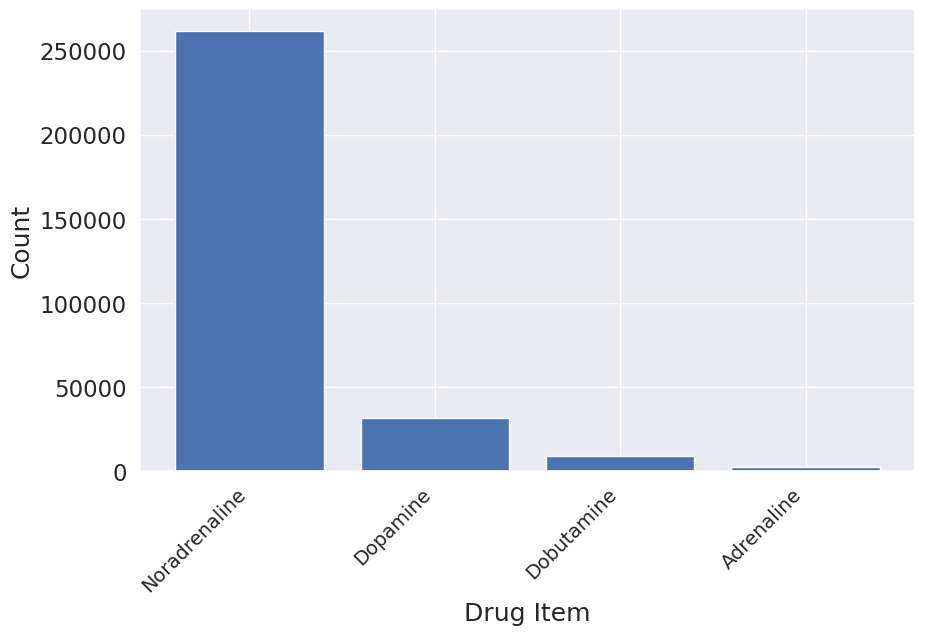

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df and contains a column named 'item'
# For example:
# df = pd.DataFrame({'item': ['A', 'B', 'A', 'C', 'B', 'A', 'C']})

# Create a countplot using Seaborn
#vasopressor['item'] = vasopressor['item'].str.replace(r'\s*\([^)]*\)\s*', '')

# sns.set(style="darkgrid")
# sns.set(font_scale=1.5)  # Set the font scale to adjust overall font size
# plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
# sns.countplot(x='item', data=vasopressor, order=vasopressor['item'].value_counts().index)

# # Show the plot
# plt.show()


# Assuming 'vasopressor' is your DataFrame and 'item' is the column of interest
item_counts = vasopressor['item'].value_counts()

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Create a countplot with larger font size using plt.bar
plt.bar(item_counts.index, item_counts)  # Adjust color as needed
plt.xlabel('Drug Item', fontsize=18)  # Adjust the font size for the x-axis label
plt.ylabel('Count', fontsize=18)  # Adjust the font size for the y-axis label
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


In [ ]:
drug = pd.read_gbq(
    '''
    SELECT
        itemid,
        item
    FROM drugitems
    '''
    , configuration=config_gbq)


print(len(drug))

4907269


In [ ]:
len(drug['itemid'].unique())

1117

In [ ]:
new_rows = []
for i, row in vasopressor.iterrows():
  start = row['start'] / (12 * 3600000)
  end = row['stop'] / (12 * 3600000)

  for hour in range(int(start), int(end) + 1):
          new_rows.append({
              'admissionid': row['admissionid'],
              'medication_hour': hour
          })

vasopressor_complete = pd.DataFrame(new_rows)


vasopressor_complete.head(20)

,admissionid,medication_hour
0,8096,4
1,19862,3456
2,21611,0
3,11567,1
4,11567,2
5,16483,6
6,6921,0
7,6921,1
8,6921,2
9,13970,0


In [ ]:
# Merge dataframes on Patient_ID and hour
result_105 = pd.merge(result_105, vasopressor_complete, how='left', left_on=['admissionid', 'hour'], right_on=['admissionid', 'medication_hour'])

# Create a boolean column based on whether medication was taken or not
result_105['vassopressor_taken'] = ~result_105['medication_hour'].isna()

# Fill NaN values in the medication_hour column with 0 (optional)
result_105['medication_hour'].fillna(0, inplace=True)

# Drop the redundant medication_hour column if needed
result_105 = result_105.drop('medication_hour', axis=1)

display(result_105)

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,hematocryt,lactate,sodium,ph,comparison_result,has_shock,has_sepsis,has_ventilation,nsaid_taken,vassopressor_taken
0,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,0.327,3.17,138.900000,7.456667,0,1,0,False,False,True
1,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,0.327,3.17,138.900000,7.456667,0,1,0,False,False,True
2,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,0.327,3.17,138.900000,7.456667,0,1,0,False,False,True
3,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,0.327,3.17,138.900000,7.456667,0,1,0,False,False,True
4,4,1,91.0,425.000000,43200000,91.0,36.342857,102.666667,139.206445,89.777778,...,0.320,2.50,139.000000,7.456667,0,1,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527440,23548,17,38.0,651.412605,734400000,47.0,36.500000,88.714286,143.000000,116.000000,...,0.370,1.10,137.500000,7.363333,0,0,0,False,False,False
527441,23548,18,38.0,1184.999354,777600000,47.0,37.233333,90.833333,143.000000,116.000000,...,0.370,1.10,136.666667,7.363333,0,0,0,False,False,False
527442,23548,19,39.0,1266.750649,820800000,47.0,36.700000,88.666667,143.000000,116.000000,...,0.370,1.10,136.500000,7.363333,0,0,0,False,False,False
527443,23548,20,39.0,1277.447775,864000000,47.0,36.550000,104.000000,143.333333,107.585459,...,0.370,1.10,137.000000,7.363333,0,0,0,False,False,False


In [ ]:
antimicrobiotic = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid,
        start,
        stop,
        duration,
        item,
        solutionadministered,
        rate,
        dose,
        doseunitid,
        doserateunitid,
        administered
    FROM drugitems
    WHERE ordercategoryid in(15,21)
    '''
    , configuration=config_gbq)

In [ ]:
antimicrobiotic['time'] = antimicrobiotic['start'] / (12 * 3600000)
antimicrobiotic['time'] = antimicrobiotic['time'].apply(np.ceil)

In [ ]:
antimicrobiotic = antimicrobiotic[antimicrobiotic.item == 'Velosuline (Insuline)']

In [ ]:
# Merge dataframes on Patient_ID and hour
result_105 = pd.merge(result_105, antimicrobiotic[['admissionid','time']], how='left', left_on=['admissionid', 'hour'], right_on=['admissionid', 'time'])

# Create a boolean column based on whether medication was taken or not
result_105['antimicrobiotic_taken'] = ~result_105['time'].isna()

# Fill NaN values in the medication_hour column with 0 (optional)
result_105['time'].fillna(0, inplace=True)

# Drop the redundant medication_hour column if needed
result_105 = result_105.drop('time', axis=1)

display(result_105)

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,lactate,sodium,ph,comparison_result,has_shock,has_sepsis,has_ventilation,nsaid_taken,vassopressor_taken,antimicrobiotic_taken
0,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,3.17,138.900000,7.456667,0,1,0,False,False,True,False
1,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,3.17,138.900000,7.456667,0,1,0,False,False,True,False
2,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,3.17,138.900000,7.456667,0,1,0,False,False,True,False
3,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,3.17,138.900000,7.456667,0,1,0,False,False,True,False
4,4,1,91.0,425.000000,43200000,91.0,36.342857,102.666667,139.206445,89.777778,...,2.50,139.000000,7.456667,0,1,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527440,23548,17,38.0,651.412605,734400000,47.0,36.500000,88.714286,143.000000,116.000000,...,1.10,137.500000,7.363333,0,0,0,False,False,False,False
527441,23548,18,38.0,1184.999354,777600000,47.0,37.233333,90.833333,143.000000,116.000000,...,1.10,136.666667,7.363333,0,0,0,False,False,False,False
527442,23548,19,39.0,1266.750649,820800000,47.0,36.700000,88.666667,143.000000,116.000000,...,1.10,136.500000,7.363333,0,0,0,False,False,False,False
527443,23548,20,39.0,1277.447775,864000000,47.0,36.550000,104.000000,143.333333,107.585459,...,1.10,137.000000,7.363333,0,0,0,False,False,False,False


contrast (not enough admissionids, will be skipped)

In [ ]:
contrast = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid,
        start,
        stop,
        duration,
        item,
        solutionadministered,
        rate,
        dose,
        doseunitid,
        doserateunitid,
        administered
    FROM drugitems
    WHERE itemid IN (
      13501, --- E-Z-CAT(Contrastvloeistof)
      15719 ---Ultravist 300 (Contrastvloeistof),
    )
    '''
    , configuration=config_gbq)

In [ ]:
contrast

,admissionid,itemid,start,stop,duration,item,solutionadministered,rate,dose,doseunitid,doserateunitid,administered
0,7929,13501,865860000,865920000,1,E-Z-CAT (Contrastvloeistof),750.0,0.0,1.0,306,<NA>,1.0
1,15566,13501,861660000,861720000,1,E-Z-CAT (Contrastvloeistof),500.0,0.0,1.0,306,<NA>,1.0
2,21119,13501,475020000,475080000,1,E-Z-CAT (Contrastvloeistof),1000.0,0.0,1.0,306,<NA>,1.0
3,10367,13501,2222160000,2222220000,1,E-Z-CAT (Contrastvloeistof),1000.0,0.0,1.0,306,<NA>,1.0
4,13749,13501,1698780000,1698840000,1,E-Z-CAT (Contrastvloeistof),500.0,0.0,1.0,306,<NA>,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
143,20341,15719,1670040000,1670100000,1,Ultravist 300 (Contrastvloeistof),1000.0,0.0,1.0,306,<NA>,1.0
144,16206,13501,1461420000,1461480000,1,E-Z-CAT (Contrastvloeistof),900.0,0.0,1.0,306,<NA>,1.0
145,21906,13501,1386180000,1386240000,1,E-Z-CAT (Contrastvloeistof),900.0,0.0,1.0,306,<NA>,1.0
146,5284,13501,997500000,997560000,1,E-Z-CAT (Contrastvloeistof),0.0,0.0,1.0,306,<NA>,1.0


In [ ]:
contrast['time'] = contrast['start'] / (12 * 3600000)
contrast['time'] = contrast['time'].apply(np.ceil)

In [ ]:
# Merge dataframes on Patient_ID and hour
test_df = pd.merge(result_105, contrast[['admissionid','time']], how='left', left_on=['admissionid', 'hour'], right_on=['admissionid', 'time'])

# Create a boolean column based on whether medication was taken or not
test_df['contrast_taken'] = ~test_df['time'].isna()

# Fill NaN values in the medication_hour column with 0 (optional)
test_df['time'].fillna(0, inplace=True)

# Drop the redundant medication_hour column if needed
test_df = test_df.drop('time', axis=1)

display(test_df)

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,sodium,ph,comparison_result,has_shock,has_sepsis,has_ventilation,nsaid_taken,vassopressor_taken,antimicrobiotic_taken,contrast_taken
0,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,138.0,7.47,0,1,0,False,False,True,False,False
1,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,138.0,7.47,0,1,0,False,False,True,False,False
2,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,138.0,7.47,0,1,0,False,False,True,False,False
3,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,138.0,7.47,0,1,0,False,False,True,False,False
4,4,1,98.0,60.000000,3600000,91.0,35.45,74.5,114.5,70.0,...,139.0,7.47,0,1,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257319,23548,254,39.0,132.772135,914400000,47.0,36.70,88.0,154.0,118.0,...,138.0,7.36,0,0,0,False,False,False,False,False
2257320,23548,256,39.0,253.072673,921600000,47.0,36.70,88.0,154.0,118.0,...,138.0,7.36,0,0,0,False,False,False,False,False
2257321,23548,258,41.0,320.000000,928800000,47.0,36.80,95.0,154.0,118.0,...,137.0,7.36,0,0,0,False,False,False,False,False
2257322,23548,260,41.0,360.000000,936000000,47.0,36.80,103.0,154.0,118.0,...,137.0,7.36,0,0,0,False,False,False,False,False


In [ ]:
test_df['contrast_taken'].sum() #WILL NOT BE ADDED

0

In [ ]:
acei = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid,
        start,
        stop,
        duration,
        item,
        solutionadministered,
        rate,
        dose,
        doseunitid,
        doserateunitid,
        administered
    FROM drugitems
    WHERE itemid IN (
      6902, ---Captopril (Capoten),
      7193, ---Enalaprilaat(Renitec)
      10756, ---Fosinopril (Newace),
      10581, ---Lisinopril (Zestril)
      19213 ---Perindopril (Coversyl)
    )
    '''
    , configuration=config_gbq)

In [ ]:
acei['time'] = acei['start'] / (12 * 3600000)
acei['time'] = acei['time'].apply(np.ceil)

In [ ]:
# Merge dataframes on Patient_ID and hour
result_105 = pd.merge(result_105, acei[['admissionid','time']], how='left', left_on=['admissionid', 'hour'], right_on=['admissionid', 'time'])

# Create a boolean column based on whether medication was taken or not
result_105['acei_taken'] = ~result_105['time'].isna()

# Fill NaN values in the medication_hour column with 0 (optional)
result_105['time'].fillna(0, inplace=True)

# Drop the redundant medication_hour column if needed
result_105 = result_105.drop('time', axis=1)

display(result_105)

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,sodium,ph,comparison_result,has_shock,has_sepsis,has_ventilation,nsaid_taken,vassopressor_taken,antimicrobiotic_taken,acei_taken
0,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,138.900000,7.456667,0,1,0,False,False,True,False,False
1,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,138.900000,7.456667,0,1,0,False,False,True,False,False
2,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,138.900000,7.456667,0,1,0,False,False,True,False,False
3,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,138.900000,7.456667,0,1,0,False,False,True,False,False
4,4,1,91.0,425.000000,43200000,91.0,36.342857,102.666667,139.206445,89.777778,...,139.000000,7.456667,0,1,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536298,23548,17,38.0,651.412605,734400000,47.0,36.500000,88.714286,143.000000,116.000000,...,137.500000,7.363333,0,0,0,False,False,False,False,False
536299,23548,18,38.0,1184.999354,777600000,47.0,37.233333,90.833333,143.000000,116.000000,...,136.666667,7.363333,0,0,0,False,False,False,False,False
536300,23548,19,39.0,1266.750649,820800000,47.0,36.700000,88.666667,143.000000,116.000000,...,136.500000,7.363333,0,0,0,False,False,False,False,False
536301,23548,20,39.0,1277.447775,864000000,47.0,36.550000,104.000000,143.333333,107.585459,...,137.000000,7.363333,0,0,0,False,False,False,False,False


In [ ]:
test_df['acei_taken'].sum()

3905

In [ ]:
arb = pd.read_gbq(
    '''
    SELECT
        admissionid
        , itemid,
        start,
        stop,
        duration,
        item,
        solutionadministered,
        rate,
        dose,
        doseunitid,
        doserateunitid,
        administered
    FROM drugitems
    WHERE itemid IN (
      12950, ---Candesartan (Atacand),
      19225, ---Irbesartan (Aprovel),
      7166, ---Losartan (Cozaar),,,,,Losartan
      13007 ---Valsartan (Diovan),,,
    )
    '''
    , configuration=config_gbq)

In [ ]:
arb['time'] = arb['start'] / (12 * 3600000)
arb['time'] = arb['time'].apply(np.ceil)

In [ ]:
# Merge dataframes on Patient_ID and hour
result_105 = pd.merge(result_105, arb[['admissionid','time']], how='left', left_on=['admissionid', 'hour'], right_on=['admissionid', 'time'])

# Create a boolean column based on whether medication was taken or not
result_105['arb_taken'] = ~result_105['time'].isna()

# Fill NaN values in the medication_hour column with 0 (optional)
result_105['time'].fillna(0, inplace=True)

# Drop the redundant medication_hour column if needed
result_105 = result_105.drop('time', axis=1)

display(result_105)

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,ph,comparison_result,has_shock,has_sepsis,has_ventilation,nsaid_taken,vassopressor_taken,antimicrobiotic_taken,acei_taken,arb_taken
0,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,7.456667,0,1,0,False,False,True,False,False,False
1,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,7.456667,0,1,0,False,False,True,False,False,False
2,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,7.456667,0,1,0,False,False,True,False,False,False
3,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,7.456667,0,1,0,False,False,True,False,False,False
4,4,1,91.0,425.000000,43200000,91.0,36.342857,102.666667,139.206445,89.777778,...,7.456667,0,1,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536315,23548,17,38.0,651.412605,734400000,47.0,36.500000,88.714286,143.000000,116.000000,...,7.363333,0,0,0,False,False,False,False,False,False
536316,23548,18,38.0,1184.999354,777600000,47.0,37.233333,90.833333,143.000000,116.000000,...,7.363333,0,0,0,False,False,False,False,False,False
536317,23548,19,39.0,1266.750649,820800000,47.0,36.700000,88.666667,143.000000,116.000000,...,7.363333,0,0,0,False,False,False,False,False,False
536318,23548,20,39.0,1277.447775,864000000,47.0,36.550000,104.000000,143.333333,107.585459,...,7.363333,0,0,0,False,False,False,False,False,False


In [ ]:
test['arb_taken'].sum()

266

### Baseline creatinine

In [ ]:
# Filter admission IDs present in 'creat'
admission_ids_in_creat = creat['admissionid'].unique()
admission_ids_in_creat = sorted(admission_ids_in_creat)
print(len(admission_ids_in_creat))

8064


In [ ]:
result_105 = result_105.loc[result_105['admissionid'].isin(admission_ids_in_creat)]

In [ ]:
result_105.drop_duplicates(inplace=True)

In [ ]:
result_105

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,ph,comparison_result,has_shock,has_sepsis,has_ventilation,nsaid_taken,vassopressor_taken,antimicrobiotic_taken,acei_taken,arb_taken
0,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,7.47,0,1,0,False,False,True,False,False,False
4,4,1,98.0,60.000000,3600000,91.0,35.45,74.5,114.5,70.0,...,7.47,0,1,0,False,False,False,False,False,False
5,4,2,98.0,135.000000,7200000,91.0,35.30,76.0,111.0,67.0,...,7.47,0,1,0,False,False,False,False,True,False
7,4,3,98.0,35.000000,10800000,91.0,35.30,74.0,120.0,71.0,...,7.47,0,1,0,False,False,False,False,True,False
9,4,4,98.0,60.000000,14400000,91.0,35.60,74.0,106.0,63.0,...,7.47,0,1,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264299,23548,254,39.0,132.772135,914400000,47.0,36.70,88.0,154.0,118.0,...,7.36,0,0,0,False,False,False,False,False,False
2264300,23548,256,39.0,253.072673,921600000,47.0,36.70,88.0,154.0,118.0,...,7.36,0,0,0,False,False,False,False,False,False
2264301,23548,258,41.0,320.000000,928800000,47.0,36.80,95.0,154.0,118.0,...,7.36,0,0,0,False,False,False,False,False,False
2264302,23548,260,41.0,360.000000,936000000,47.0,36.80,103.0,154.0,118.0,...,7.36,0,0,0,False,False,False,False,False,False


In [ ]:
a = result_105['admissionid'].unique()
print(a)

[    4     5     6 ... 23546 23547 23548]


In [ ]:
result_105 = result_105.groupby('admissionid').apply(lambda group: group.ffill().bfill())

<ipython-input-221-53716769ec19>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  result_105 = result_105.groupby('admissionid').apply(lambda group: group.ffill().bfill())


In [ ]:
# Dropping rows where 'baseline_creatinine' is greater than 260
result_105 = result_105[result_105['baseline_creatinine'] <= 260]

In [ ]:
# Get unique admissionid values with comparison_result 1, 2, or 3
admissionids_with_aki = result_105[result_105['comparison_result'].isin([1, 2, 3])]['admissionid'].unique()

# Create a new column 'has_aki' and set values based on admissionid presence in admissionids_with_aki
result_105['has_aki'] = result_105['admissionid'].isin(admissionids_with_aki)

In [ ]:
# Assuming 'result_105' is your DataFrame
# Replace 'result_105' with your actual DataFrame name

# Group by 'has_aki' column and count unique 'admissionid'
unique_admissionid_counts = result_105.groupby('has_aki')['admissionid'].nunique()

# Display the count of unique 'admissionid' for 'True' and 'False' in 'has_aki' column
print("Number of unique 'admissionid' for 'True' and 'False' in 'has_aki':")
print(unique_admissionid_counts)


Number of unique 'admissionid' for 'True' and 'False' in 'has_aki':
has_aki
False    4756
True     3308
Name: admissionid, dtype: int64


### Surgery types

In [ ]:
specialties = pd.read_gbq(
    '''
    SELECT admissionid,
    specialty--, COUNT(*) AS number_of_admissions
    FROM admissions
    --GROUP BY specialty
    --ORDER BY number_of_admissions DESC
    '''
    , configuration=config_gbq)

In [ ]:
specialties

,admissionid,specialty
0,12821,ders
1,21215,Plastische chirurgie
2,6527,Plastische chirurgie
3,5675,ders
4,9451,Plastische chirurgie
...,...,...
23101,20437,Heelkunde Gastro-enterologie
23102,21597,Heelkunde Gastro-enterologie
23103,21608,Heelkunde Gastro-enterologie
23104,21655,Heelkunde Gastro-enterologie


In [ ]:


# Print all unique values in the 'specialty' column
unique_specialties = specialties['specialty'].unique()
print("Unique Specialties:")
print(unique_specialties)

# Print the number of unique admissionid values per unique specialty
for specialty in unique_specialties:
    unique_admission_ids = specialties[specialties['specialty'] == specialty]['admissionid'].nunique()
    print(f"Specialty: {specialty}, Number of Unique Admission IDs: {unique_admission_ids}")


Unique Specialties:
['ders' 'Plastische chirurgie' 'Oogheelkunde' 'Mondheelkunde'
 'Verloskunde' 'Obstetrie' 'Oncologie Inwendig' 'Reumatologie' None
 'Inwendig' 'Urologie' 'Longziekte' 'Nefrologie' 'Neurologie' 'Orthopedie'
 'Cardiologie' 'Hematologie' 'Gynaecologie' 'Traumatologie'
 'Vaatchirurgie' 'Neurochirurgie' 'Cardiochirurgie' 'Heelkunde Oncologie'
 'Keel, Neus & Oorarts' 'Maag-,Darm-,Leverziekten'
 'Heelkunde Longen/Oncologie' 'Intensive Care Volwassenen'
 'Heelkunde Gastro-enterologie']
Specialty: ders, Number of Unique Admission IDs: 64
Specialty: Plastische chirurgie, Number of Unique Admission IDs: 40
Specialty: Oogheelkunde, Number of Unique Admission IDs: 5
Specialty: Mondheelkunde, Number of Unique Admission IDs: 20
Specialty: Verloskunde, Number of Unique Admission IDs: 16
Specialty: Obstetrie, Number of Unique Admission IDs: 15
Specialty: Oncologie Inwendig, Number of Unique Admission IDs: 84
Specialty: Reumatologie, Number of Unique Admission IDs: 4
Specialty: None, 

In [ ]:
# Assuming 'specialties' is your Pandas DataFrame

# Create new columns and set initial values to 0
specialties['cardiochirurgie'] = 0
specialties['traumatologie'] = 0
specialties['vaatchirurgie'] = 0

# Group by 'admissionid' and set values to 1 based on conditions for each unique 'admissionid'
for admissionid, group in specialties.groupby('admissionid'):
    if 'Cardiochirurgie' in group['specialty'].values:
        specialties.loc[specialties['admissionid'] == admissionid, 'cardiac_surgery'] = 1
    if 'Traumatologie' in group['specialty'].values:
        specialties.loc[specialties['admissionid'] == admissionid, 'traumatology'] = 1
    if 'Vaatchirurgie' in group['specialty'].values:
        specialties.loc[specialties['admissionid'] == admissionid, 'vascular_surgery'] = 1
    if 'Heelkunde Gastro-enterologie' in group['specialty'].values:
        specialties.loc[specialties['admissionid'] == admissionid, 'gastroenterology_surgery'] = 1
    if 'Heelkunde Longen/Oncologie' in group['specialty'].values:
        specialties.loc[specialties['admissionid'] == admissionid, 'lungs_oncology_surgery'] = 1
    if 'Heelkunde Oncologie' in group['specialty'].values:
        specialties.loc[specialties['admissionid'] == admissionid, 'oncology_surgery'] = 1
    if 'Neurochirurgie' in group['specialty'].values:
        specialties.loc[specialties['admissionid'] == admissionid, 'neuro_surgery'] = 1

In [ ]:
specialties

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
specialties = specialties.loc[specialties['admissionid'].isin(admission_ids_in_creat)]

In [ ]:
specialties.fillna(0, inplace=True)

In [ ]:
specified_columns = [
    'admissionid', 'cardiac_surgery', 'traumatology', 'vascular_surgery',
    'gastroenterology_surgery', 'lungs_oncology_surgery', 'oncology_surgery', 'neuro_surgery'
]

# Merging only the specified columns based on 'admissionid'
result_105 = pd.merge(result_105, specialties[specified_columns], on='admissionid')

In [ ]:
result_105

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,antimicrobiotic_taken,acei_taken,arb_taken,cardiac_surgery,traumatology,vascular_surgery,gastroenterology_surgery,lungs_oncology_surgery,oncology_surgery,neuro_surgery
0,4,0,98.0,60.000000,0,91.0,35.45,74.5,114.5,70.0,...,False,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1,98.0,60.000000,3600000,91.0,35.45,74.5,114.5,70.0,...,False,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2,98.0,135.000000,7200000,91.0,35.30,76.0,111.0,67.0,...,False,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3,98.0,35.000000,10800000,91.0,35.30,74.0,120.0,71.0,...,False,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,98.0,60.000000,14400000,91.0,35.60,74.0,106.0,63.0,...,False,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993369,23548,254,39.0,132.772135,914400000,47.0,36.70,88.0,154.0,118.0,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1993370,23548,256,39.0,253.072673,921600000,47.0,36.70,88.0,154.0,118.0,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1993371,23548,258,41.0,320.000000,928800000,47.0,36.80,95.0,154.0,118.0,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1993372,23548,260,41.0,360.000000,936000000,47.0,36.80,103.0,154.0,118.0,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Patient characteristics (Age, etc.)

In [ ]:
char = pd.read_gbq(
    '''
    SELECT
      patientid,
      admissionid,
      admittedat,
      gender,
      agegroup,
      weightgroup,
      heightgroup,
      CASE
        WHEN dateofdeath > 0
        THEN 1
        ELSE 0
      END as Death,
      admissionyeargroup,
      admittedat as time_since_first_admission
    FROM admissions as a
    '''
    , configuration=config_gbq)


In [ ]:
import numpy as np

# Custom function for mode imputation considering empty strings or NaN
def mode_imputation(column):
    # Replace empty strings with NaN
    column.replace('', np.nan, inplace=True)

    # Find the most frequent category (mode) excluding NaN
    mode_value = column.mode()[0] if not column.dropna().empty else None

    # Fill missing values and NaN with the mode value
    column.fillna(mode_value, inplace=True)
    return column

# Columns to perform mode imputation
#columns_to_impute = ['gender', 'agegroup', 'weightgroup', 'heightgroup', 'admissionyeargroup']
columns_to_impute = ['agegroup', 'admissionyeargroup', 'gender']
# Applying mode imputation to columns in the DataFrame 'char'
for col in columns_to_impute:
    char[col] = mode_imputation(char[col])

ordinal_encoder_height = OrdinalEncoder(categories=[['18-39', '40-49', '50-59', '60-69', '70-79', '80+']], handle_unknown='use_encoded_value', unknown_value=np.nan)
char['agegroup'] = ordinal_encoder_height.fit_transform(char['agegroup'])


NameError: ignored

In [ ]:
columns_to_impute = ['weightgroup', 'heightgroup']

for column in columns_to_impute:
    char[column].replace('', np.nan, inplace=True)
    char[column].replace('None', np.nan, inplace=True)


<ipython-input-104-909548426534>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char[column].replace('', np.nan, inplace=True)
<ipython-input-104-909548426534>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char[column].replace('None', np.nan, inplace=True)


In [ ]:
# Separate nominal, ordinal, and numeric columns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer

gender = ['gender']
height = ['heightgroup']
weight = ['weightgroup']

# One-hot encode nominal features
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
df_nominal_encoded = pd.DataFrame(onehot_encoder.fit_transform(char[gender]), columns=onehot_encoder.get_feature_names_out(gender))
char = pd.concat([char, df_nominal_encoded], axis=1)
char = char.drop(gender, axis=1)

# Ordinal encode ordinal features
ordinal_encoder_height = OrdinalEncoder(categories=[['159-', '160-169', '170-179', '180-189', '190+']], handle_unknown='use_encoded_value', unknown_value=np.nan)
char[height] = ordinal_encoder_height.fit_transform(char[height])

ordinal_encoder_weight = OrdinalEncoder(categories=[['59-',  '60-69', '70-79','80-89', '90-99','100-109', '110+' ]], handle_unknown='use_encoded_value', unknown_value=np.nan)
char[weight] = ordinal_encoder_weight.fit_transform(char[weight])



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=2)

# Fit and transform the DataFrame
df_imputed = pd.DataFrame(knn_imputer.fit_transform(char[['gender_Man', 'gender_Vrouw', 'weightgroup', 'heightgroup']]), columns=['gender_Man', 'gender_Vrouw', 'weightgroup', 'heightgroup'])

In [ ]:
# df_imputed['weightgroup'] = np.ceil(df_imputed.weightgroup)
# df_imputed['heightgroup'] = np.ceil(df_imputed.heightgroup)
df_imputed

,gender_Man,gender_Vrouw,weightgroup,heightgroup
0,0.0,0.0,3.5,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,3.5,0.0
3,0.0,0.0,3.5,0.0
4,1.0,0.0,2.5,0.0
...,...,...,...,...
23101,1.0,0.0,3.0,3.0
23102,1.0,0.0,5.0,3.0
23103,1.0,0.0,2.0,3.0
23104,1.0,0.0,4.0,3.0


In [ ]:
# Inverse transform for one-hot encoded nominal features
df_imputed[gender] = onehot_encoder.inverse_transform(df_imputed[df_nominal_encoded.columns])


KeyError: ignored

In [ ]:
char['weightgroup']=  df_imputed['weightgroup']
char['heightgroup']=  df_imputed['heightgroup']

In [ ]:
char

,patientid,admissionid,admittedat,agegroup,weightgroup,heightgroup,Death,admissionyeargroup,time_since_first_admission,gender_,gender_Man,gender_Vrouw
0,3514,4043,0,60-69,3.5,0.0,0,2003-2009,0,1.0,0.0,0.0
1,6076,7037,0,40-49,0.0,0.0,0,2003-2009,0,0.0,0.0,1.0
2,6317,7331,0,70-79,3.5,0.0,1,2003-2009,0,1.0,0.0,0.0
3,13982,16202,0,40-49,3.5,0.0,0,2003-2009,0,1.0,0.0,0.0
4,17108,19827,0,70-79,2.5,0.0,0,2003-2009,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23101,19685,22790,0,70-79,3.0,3.0,1,2010-2016,0,0.0,1.0,0.0
23102,19839,22968,0,60-69,5.0,3.0,1,2010-2016,0,0.0,1.0,0.0
23103,19880,23022,704700000,80+,2.0,3.0,1,2010-2016,704700000,0.0,1.0,0.0
23104,20077,23256,0,80+,4.0,3.0,1,2010-2016,0,0.0,1.0,0.0


In [ ]:
# Filter 'char' DataFrame to include only rows with admission IDs in 'admission_ids_in_creat'
char = char[char['admissionid'].isin(admission_ids_in_creat)]

# Merge the selected columns from 'char' to 'result_105' based on 'admissionid'
result_105 = pd.merge(result_105, char[['admissionid','patientid', 'gender_Man', 'gender_Vrouw', 'agegroup', 'weightgroup', 'heightgroup', 'Death', 'admissionyeargroup']],
                      on='admissionid', how='left')

In [ ]:
result_105

,admissionid,hour,creatinine,urine,measuredat,baseline_creatinine,temp,heart_rate,systolic_ABP,mean_ABP,...,ox_sat_change,thrombo_change,bilirubine_change,leukocyten_change,hematocryt_change,lactate_change,sodium_change,ph_change,stage_24hours,AKI_24hours
0,4,0,98.0,730.000000,0,91.0,35.958333,79.916667,130.583333,76.250000,...,0.000000,0.0,0.0,0.000000,0.000,0.00,0.000000,0.0,0.0,0
1,4,1,91.0,425.000000,43200000,91.0,36.342857,102.666667,139.206445,89.777778,...,-0.500000,26.0,0.0,2.300001,-0.007,-0.67,0.100000,0.0,1.0,1
2,4,2,91.0,380.000000,86400000,91.0,36.200000,83.000000,135.333333,89.166667,...,-0.333333,0.0,0.0,0.000000,-0.010,-0.90,-3.000000,0.0,NaN,0
3,4,3,136.0,490.000000,129600000,91.0,36.000000,70.333333,135.800000,87.200000,...,-0.066667,-19.0,-1.0,-2.800001,-0.010,0.00,1.500000,0.0,NaN,0
4,5,0,60.0,330.000000,0,60.0,36.166667,94.498714,103.617918,72.500000,...,0.000000,0.0,0.0,0.000000,0.000,0.00,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198883,23548,17,38.0,651.412605,734400000,47.0,36.500000,88.714286,143.000000,116.000000,...,1.500000,12.0,0.0,-0.600001,0.000,0.00,-0.500000,0.0,0.0,0
198884,23548,18,38.0,1184.999354,777600000,47.0,37.233333,90.833333,143.000000,116.000000,...,-0.166667,0.0,0.0,0.000000,0.000,0.00,-0.833333,0.0,0.0,0
198885,23548,19,39.0,1266.750649,820800000,47.0,36.700000,88.666667,143.000000,116.000000,...,0.366667,48.0,0.0,-1.399999,0.000,0.00,-0.166667,0.0,0.0,0
198886,23548,20,39.0,1277.447775,864000000,47.0,36.550000,104.000000,143.333333,107.585459,...,0.300000,0.0,0.0,0.000000,0.000,0.00,0.500000,0.0,NaN,0


In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
variables = ['creatinine', 'urine', 'temp', 'heart_rate', 'systolic_ABP',
             'mean_ABP', 'dystolic_ABP', 'resp_rate', 'glucose', 'hema',
             'calcium', 'kalium', 'ox_sat', 'thrombo', 'bilirubine',
             'leukocyten', 'hematocryt', 'lactate', 'sodium', 'ph']

# Calculate the change for each variable
for variable in variables:
    result_105[f'{variable}_change'] = result_105.groupby('admissionid')[variable].diff()

# Handle missing values
result_105 = result_105.fillna(0)

In [ ]:
# Dropping the 'AKI_1hours' column
result_105.drop('stage_6hours', axis=1, inplace=True)

In [ ]:
result_105['stage_24hours'] = result_105.groupby('admissionid')['comparison_result'].shift(-2)

In [ ]:
result_105['AKI_24hours'] = (result_105['stage_24hours']>= 1).astype(int)

In [ ]:
#result_105 = result_105[result_105['acute_renal_failure_48'] != True].copy()

In [ ]:
# Drop the column 'acute_renal_failure_48'
#result_105.drop('acute_renal_failure_48', axis=1, inplace=True)

In [ ]:
import pandas as pd

# Load the CSV file from the specified path
file_path = '/content/drive/MyDrive/MLRH/data.csv'  # Replace this with the actual file path in your environment
result_105 = pd.read_csv(file_path)

In [ ]:
from google.colab import files

result_105.to_csv('data_12.csv', index=False)
files.download('data_12.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

result_105.to_csv('data_6.csv', index=False)
files.download('data_6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Columns to check for unique 'admissionid' counts based on values
columns_to_check = ['has_sepsis', 'has_shock', 'has_ventilation']

# Dictionary to store counts for each column
unique_counts = {}

# Iterate over columns and count unique 'admissionid' for values 1 and 0
for column in columns_to_check:
    # Count unique 'admissionid' for value 1 and value 0 separately
    unique_counts[column + '_1'] = result_105[result_105[column] == 1]['admissionid'].nunique()
    unique_counts[column + '_0'] = result_105[result_105[column] == 0]['admissionid'].nunique()

# Display the counts of unique 'admissionid' for each column and value
print("Number of unique 'admissionid' for each column and value:")
print(unique_counts)

Number of unique 'admissionid' for each column and value:
{'has_sepsis_1': 2004, 'has_sepsis_0': 6060, 'has_shock_1': 3197, 'has_shock_0': 4867, 'has_ventilation_1': 157, 'has_ventilation_0': 8064}


In [ ]:
# Group by 'admissionid' and get the maximum 'comparison_result' value
max_comparison_result = result_105.groupby('admissionid')['comparison_result'].max()

# Count the number of 'admissionid' for each value (0, 1, 2, 3) in 'comparison_result'
comparison_result_counts = max_comparison_result.value_counts()

# Display the counts of 'admissionid' for each value in 'comparison_result'
print("Number of 'admissionid' for each value in 'comparison_result':")
print(comparison_result_counts)

Number of 'admissionid' for each value in 'comparison_result':
0    4756
1    2025
2     717
3     566
Name: comparison_result, dtype: int64


# Data Exploration: Interesting plots

In [ ]:
file_path = '/content/drive/MyDrive/MLRH/Final_sets/data 12 hours/data_12.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.info())

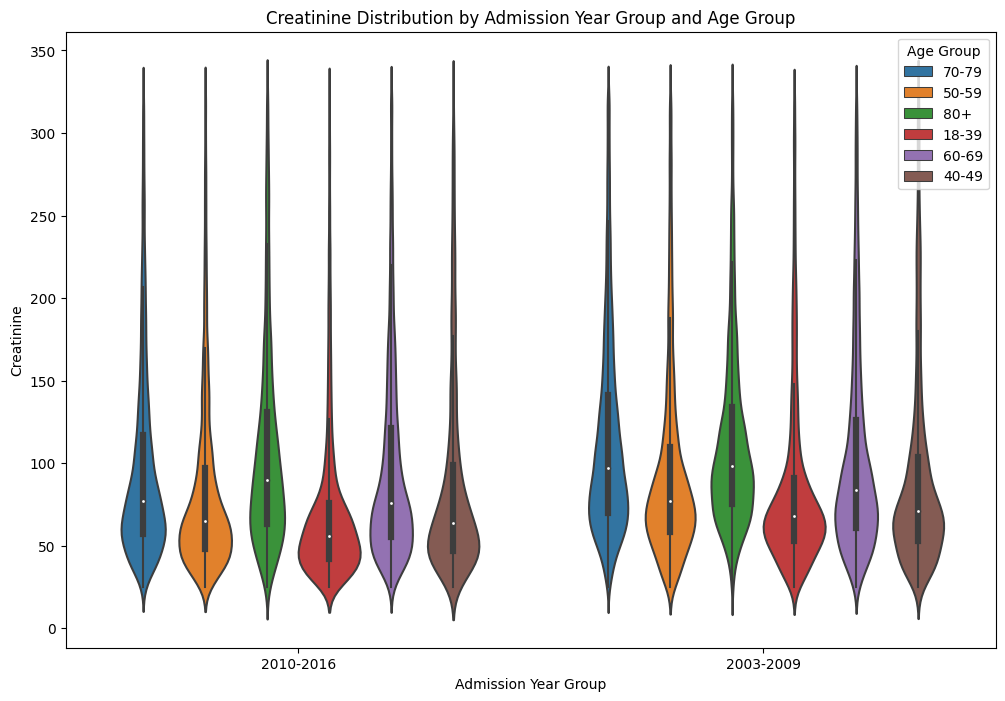

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.violinplot(x='admissionyeargroup', y='creatinine', hue='agegroup', data=df)
plt.title('Creatinine Distribution by Admission Year Group and Age Group')
plt.xlabel('Admission Year Group')
plt.ylabel('Creatinine')
plt.legend(title='Age Group')
plt.show()

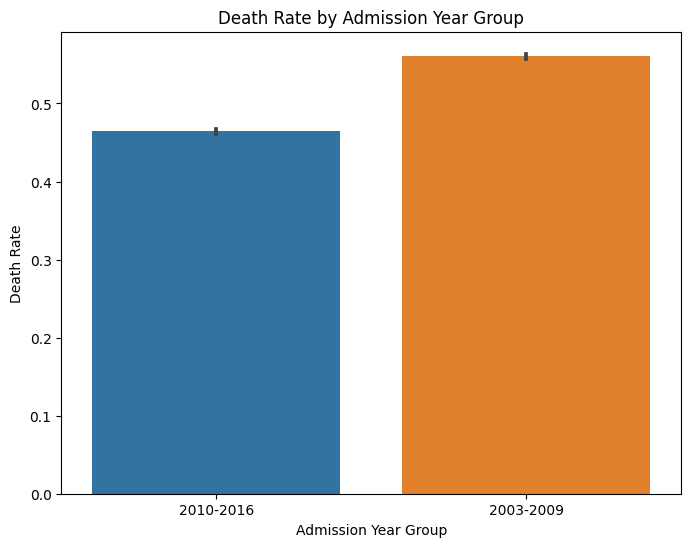

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='admissionyeargroup', y='Death', data=df)
plt.title('Death Rate by Admission Year Group')
plt.xlabel('Admission Year Group')
plt.ylabel('Death Rate')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_stats/counting.py:179: RuntimeWarning: invalid value encountered in add
  center = edges[:-1] + width / 2
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:479: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:496: RuntimeWarning: invalid value encountered in multiply
  edges = edges + (1 - shrink) / 2 * widths
/usr/local/lib/python3.10/dist-packages/seaborn/_stats/counting.py:179: RuntimeWarning: invalid value encountered in add
  center = edges[:-1] + width / 2
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:479: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:496: RuntimeWarning: invalid value encountered in multiply
  edges = edges + (1 - shrink) / 2 * widths


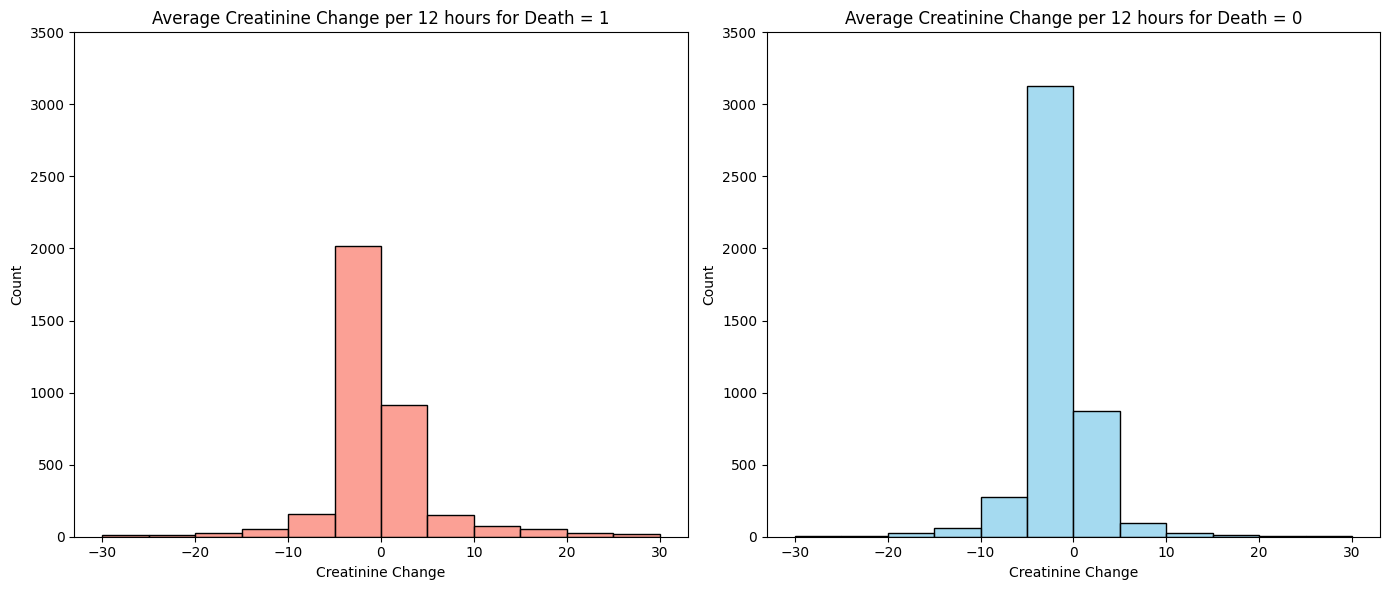

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate creatinine_change values for each admissionid
agg_df = df.groupby(['admissionid', 'Death'])['creatinine_change'].mean().reset_index()

bins = [-float('inf'), -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, float('inf')]

# Create two side-by-side histograms for death = 1 and death = 0
plt.figure(figsize=(14, 6))

# Plot histogram for death = 1
plt.subplot(1, 2, 1)
sns.histplot(data=agg_df[agg_df['Death'] == 1], x='creatinine_change', bins=bins, kde=False, color='salmon')
plt.title('Average Creatinine Change per 12 hours for Death = 1')
plt.xlabel('Creatinine Change')
plt.ylabel('Count')
plt.ylim(0, 3500)

# Plot histogram for death = 0
plt.subplot(1, 2, 2)
sns.histplot(data=agg_df[agg_df['Death'] == 0], x='creatinine_change', bins=bins, kde=False, color='skyblue')
plt.title('Average Creatinine Change per 12 hours for Death = 0')
plt.xlabel('Creatinine Change')
plt.ylabel('Count')
plt.ylim(0, 3500)
plt.tight_layout()
plt.show()



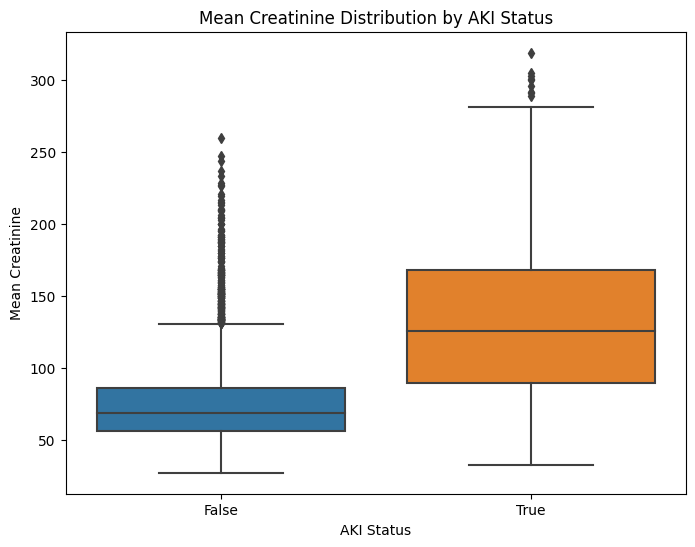

In [ ]:
grouped_df = df.groupby('admissionid').agg({'creatinine': 'mean', 'has_aki': 'first'}).reset_index()

plt.figure(figsize=(8, 6))
sns.boxplot(x='has_aki', y='creatinine', data=grouped_df)
plt.title('Mean Creatinine Distribution by AKI Status')
plt.xlabel('AKI Status')
plt.ylabel('Mean Creatinine')
plt.show()


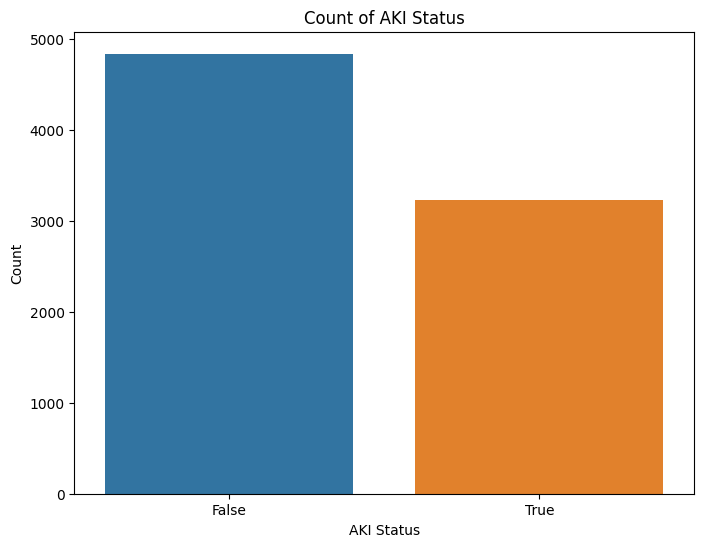

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='has_aki', data=grouped_df)
plt.title('Count of AKI Status')
plt.xlabel('AKI Status')
plt.ylabel('Count')
plt.show()

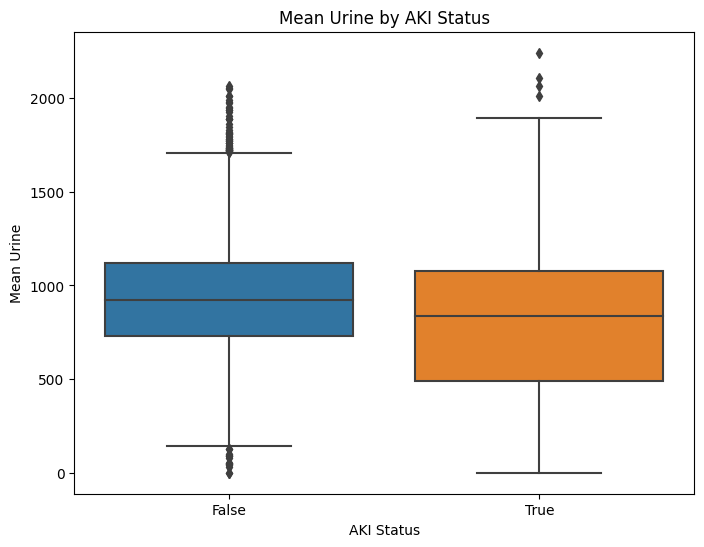

In [ ]:
grouped_df = df.groupby('admissionid').agg({
    'urine': 'mean',
    'has_aki': 'first'
}).reset_index()

plt.figure(figsize=(8, 6))
sns.boxplot(x='has_aki', y='urine', data=grouped_df)
plt.title('Mean Urine by AKI Status')
plt.xlabel('AKI Status')
plt.ylabel('Mean Urine')
plt.show()


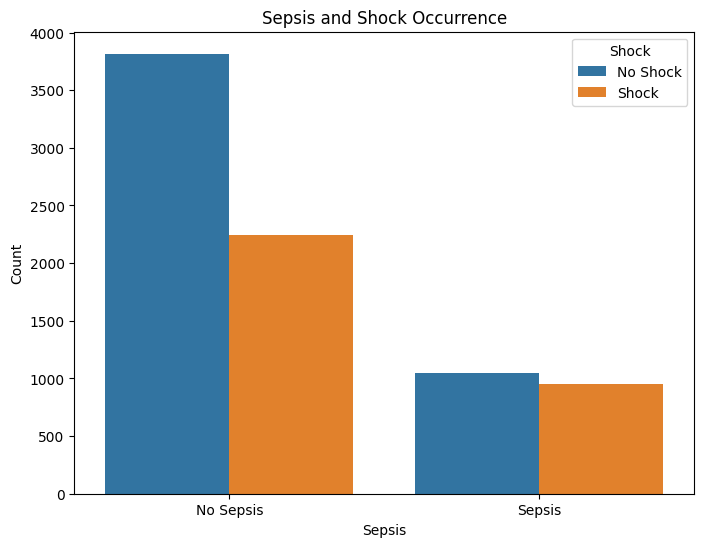

In [ ]:
unique_admissions = df.drop_duplicates(subset='admissionid')

# Creating a countplot for sepsis and shock
plt.figure(figsize=(8, 6))
sns.countplot(data=unique_admissions, x='has_sepsis', hue='has_shock')
plt.title('Sepsis and Shock Occurrence')
plt.xlabel('Sepsis')
plt.ylabel('Count')
plt.legend(title='Shock', labels=['No Shock', 'Shock'])
plt.xticks([0, 1], ['No Sepsis', 'Sepsis'])
plt.show()

<Figure size 1000x800 with 0 Axes>

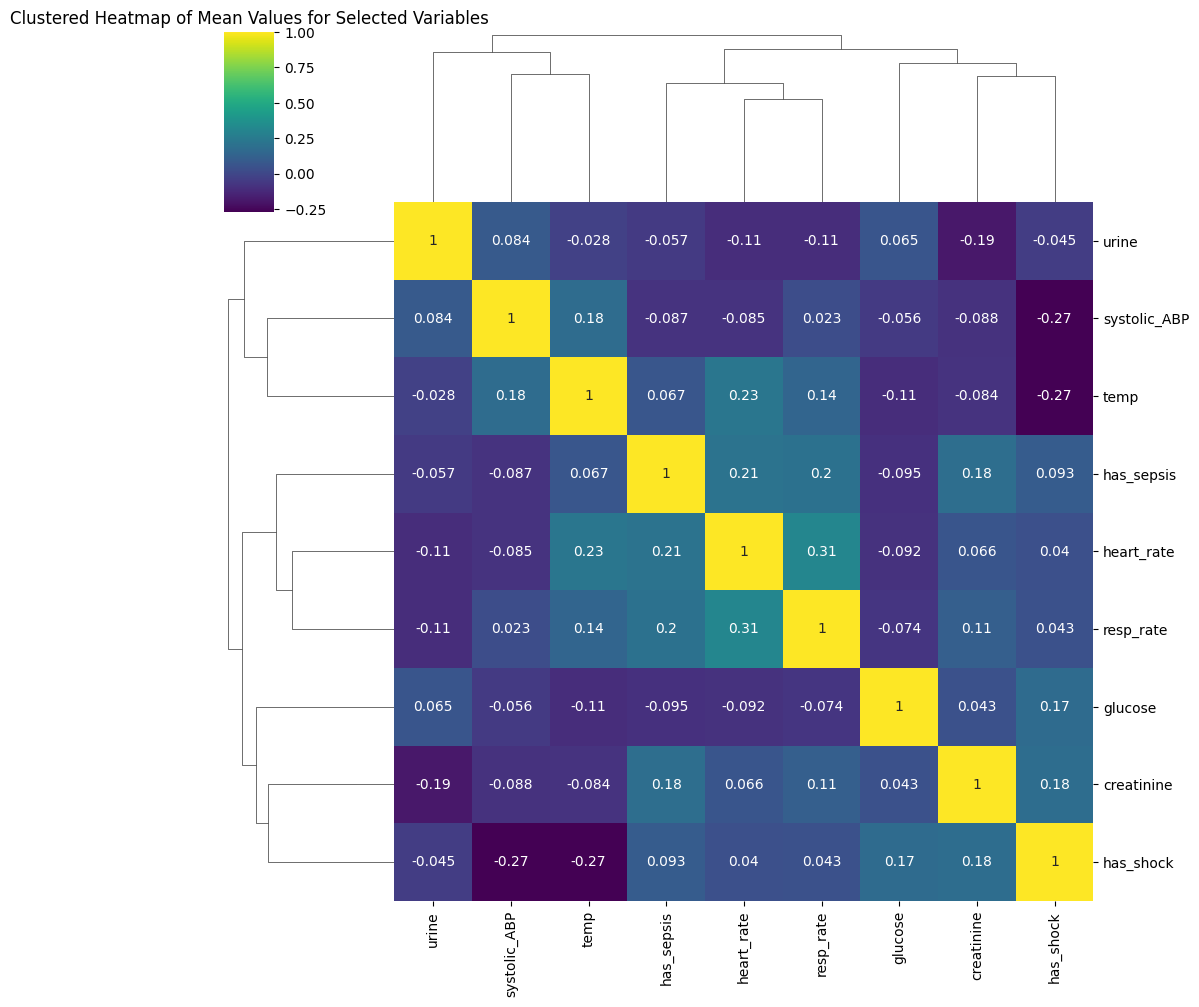

In [ ]:
selected_columns = ['creatinine', 'glucose', 'systolic_ABP', 'heart_rate', 'has_shock', 'has_sepsis','urine','temp','resp_rate']

# Selected columns for the clustered heatmap
selected_columns = ['creatinine', 'glucose', 'systolic_ABP', 'heart_rate', 'has_shock', 'has_sepsis', 'urine', 'temp', 'resp_rate']

# Calculate the mean values for selected columns grouped by admissionid
mean_values = df.drop_duplicates(subset='admissionid')[selected_columns].groupby(df['admissionid']).mean()

# Creating a clustered heatmap using mean values
plt.figure(figsize=(10, 8))
clustered_heatmap = sns.clustermap(mean_values.corr(), cmap='viridis', annot=True)
plt.title('Clustered Heatmap of Mean Values for Selected Variables')
plt.show()

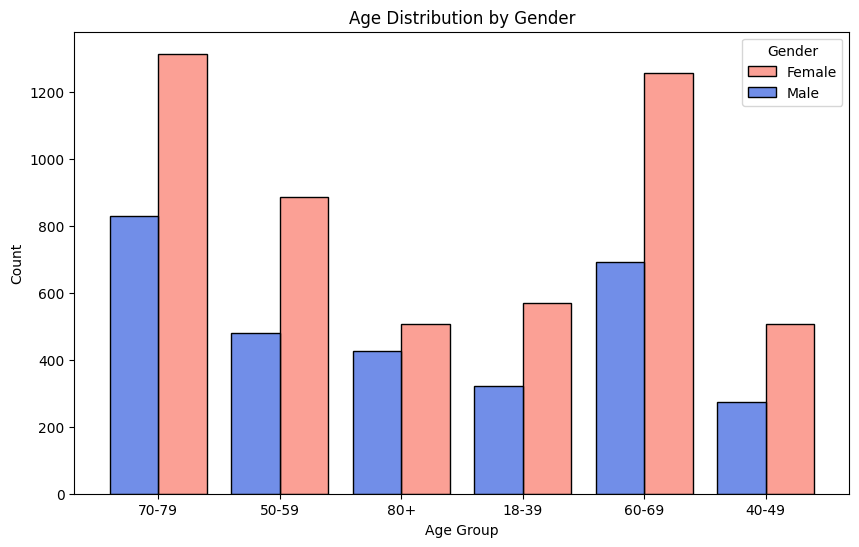

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defining custom colors for the gender categories
gender_colors = {0: 'royalblue', 1: 'salmon'}

# Creating multiple histograms for age distribution by gender with explicit legend labels
plt.figure(figsize=(10, 6))
sns.histplot(data=df.drop_duplicates(subset='admissionid'), x='agegroup', hue='gender_Man', multiple='dodge', shrink=0.8, palette=gender_colors)
plt.title('Age Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right')
plt.show()


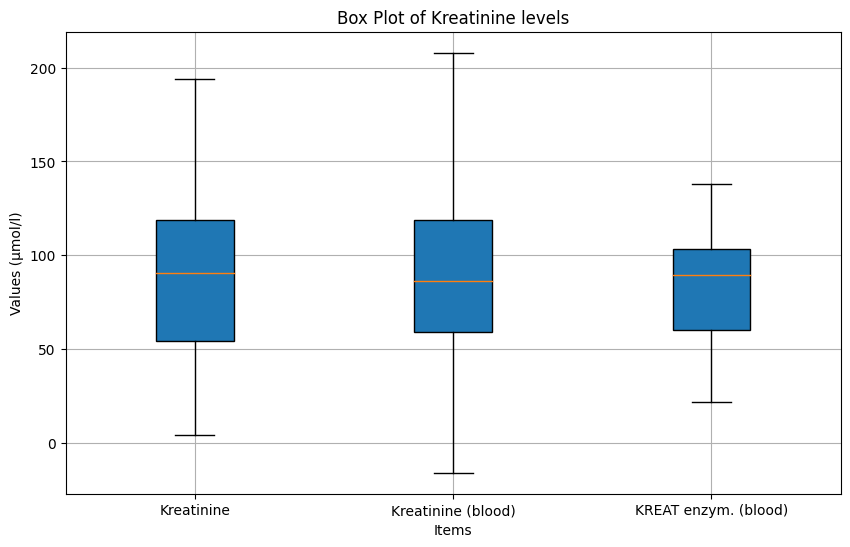

In [ ]:
import matplotlib.pyplot as plt

# Data for box plot with updated labels
data = {
    'Kreatinine (erroneously documented as µmol)': [0.0, 262.0, 106.019640, 75.5, 123.0, 47.5, 4.25, 194.25],
    'Kreatinine (bloed) µmol': [3.0, 302.0, 103.974612, 68.0, 124.0, 56.0, -16.00, 208.00],
    'KREAT enzym. (bloed) µmol': [72.0, 115.0, 94.666667, 84.5, 106.0, 21.5, 52.25, 138.25]
}

# Creating box plot
plt.figure(figsize=(10, 6))
plt.boxplot([data['Kreatinine (erroneously documented as µmol)'][2:],
             data['Kreatinine (bloed) µmol'][2:],
             data['KREAT enzym. (bloed) µmol'][2:]],
            labels=['Kreatinine',
                    'Kreatinine (blood)',
                    'KREAT enzym. (blood)'],
            patch_artist=True)

# Adding titles and labels
plt.title('Box Plot of Kreatinine levels')
plt.xlabel('Items')
plt.ylabel('Values (µmol/l)')

# Show plot
plt.grid(True)
plt.show()


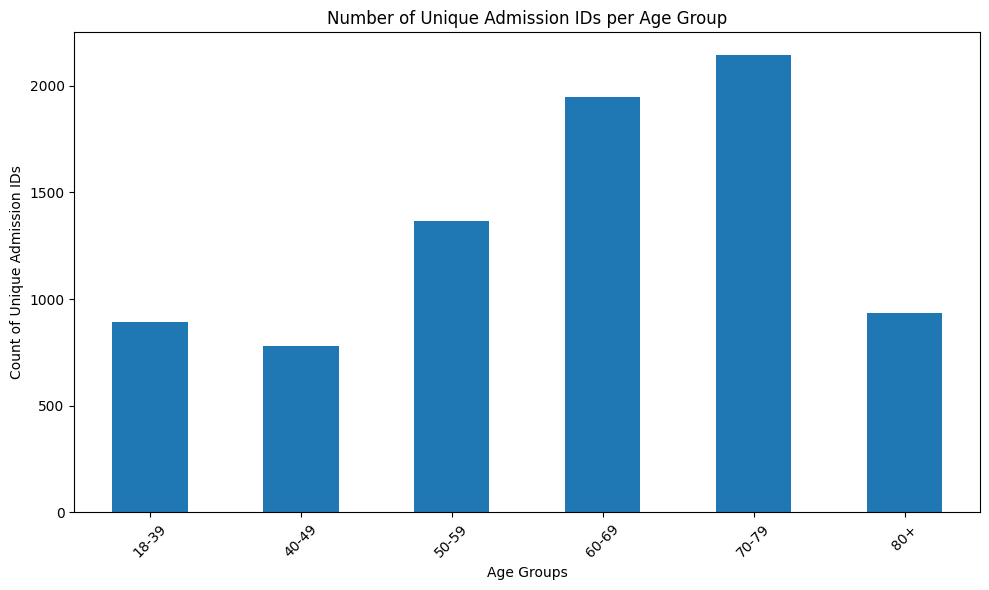

In [ ]:
# Counting the number of unique 'admissionid' values per unique 'agegroup'
unique_admission_per_agegroup = result_105.groupby('agegroup')['admissionid'].nunique()

# Sorting by index (agegroup) to maintain order in the plot
unique_admission_per_agegroup = unique_admission_per_agegroup.sort_index()

# Plotting number of unique 'admissionid' values per 'agegroup'
plt.figure(figsize=(10, 6))
unique_admission_per_agegroup.plot(kind='bar')

plt.title('Number of Unique Admission IDs per Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Count of Unique Admission IDs')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

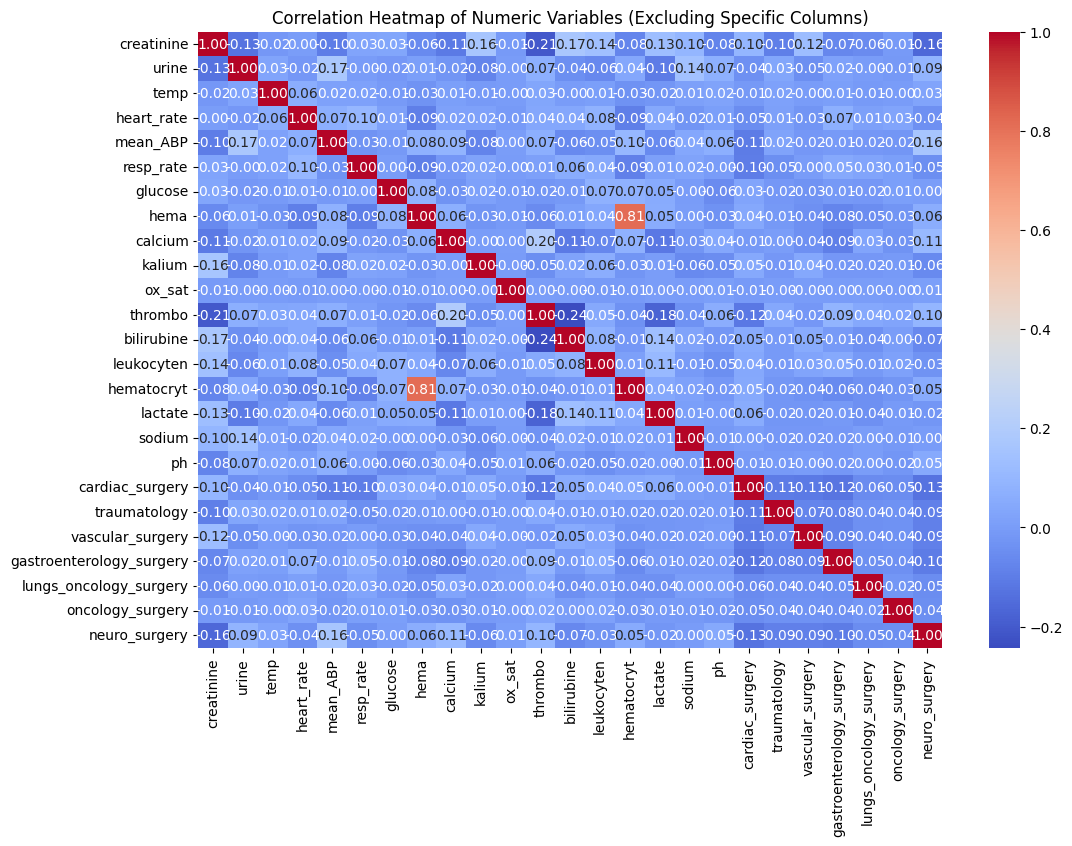

In [ ]:
import seaborn as sns

# Columns to exclude from the correlation heatmap
columns_to_exclude = ['admissionid', 'patientid', 'measuredat', 'comparison_result', 'hour', 'max_creatinine', 'min_creatinine', 'creatinine_difference',
                      'max_creatinine_7days', 'min_creatinine_7days', 'creatinine_difference_7days',
                      'acute_renal_failure', 'max_creatinine_2days', 'min_creatinine_2days',
                      'creatinine_difference_2days', 'max_creatinine_1days', 'creatinine_difference_1days',
                      'percentage_change_creat_max_base', 'percentage_change_creat_2_7days', 'has_shock', 'has_sepsis', 'has_ventilation', 'baseline_creatinine',
                      'gender', 'agegroup', 'weightgroup', 'heightgroup', 'Death', 'admissionyeargroup','systolic_ABP', 'dystolic_ABP','gender_Man', 'gender_Vrouw']

# Select numeric columns
numeric_columns = result_105.select_dtypes(include='number')

# Exclude non-numeric columns and specified columns
numeric_columns_filtered = numeric_columns.drop(columns_to_exclude, axis=1, errors='ignore')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns_filtered.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables (Excluding Specific Columns)')
plt.show()


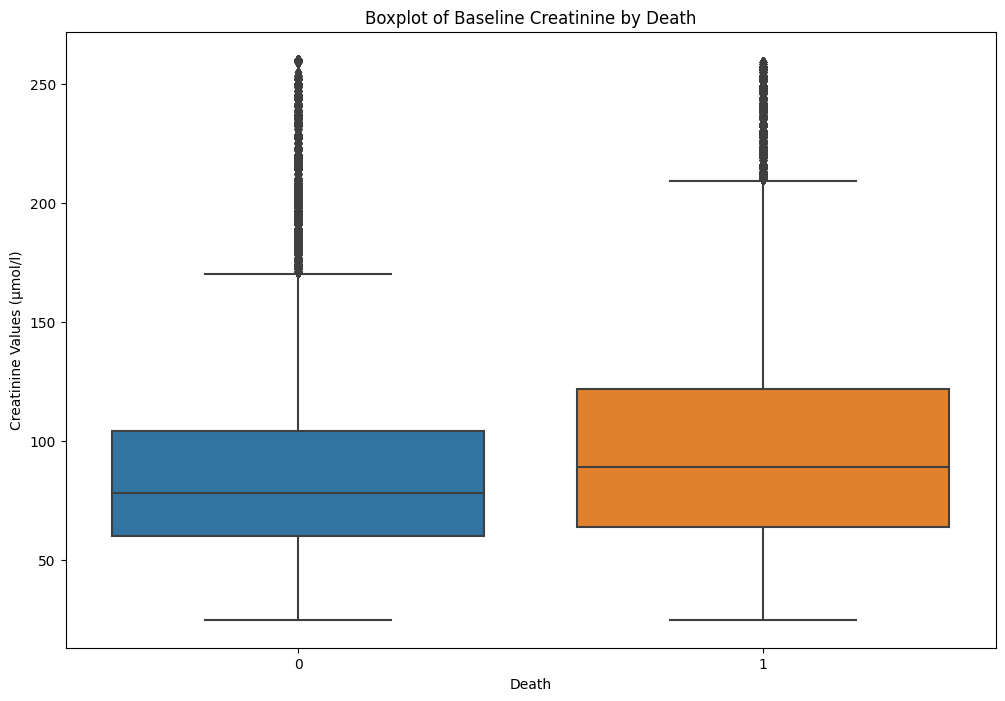

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Death', y='baseline_creatinine', data=result_105)
plt.title('Boxplot of Baseline Creatinine by Death')
plt.xlabel('Death')
plt.ylabel('Creatinine Values (µmol/l)')
plt.show()

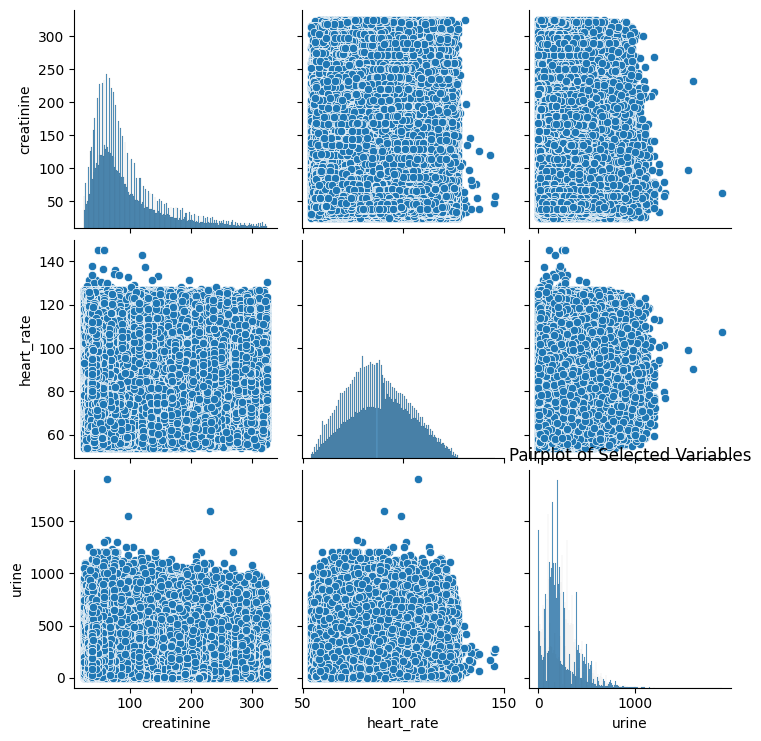

In [ ]:
columns_for_pairplot = ['creatinine', 'heart_rate', 'urine']

sns.pairplot(result_105[columns_for_pairplot])
plt.title('Pairplot of Selected Variables')
plt.show()

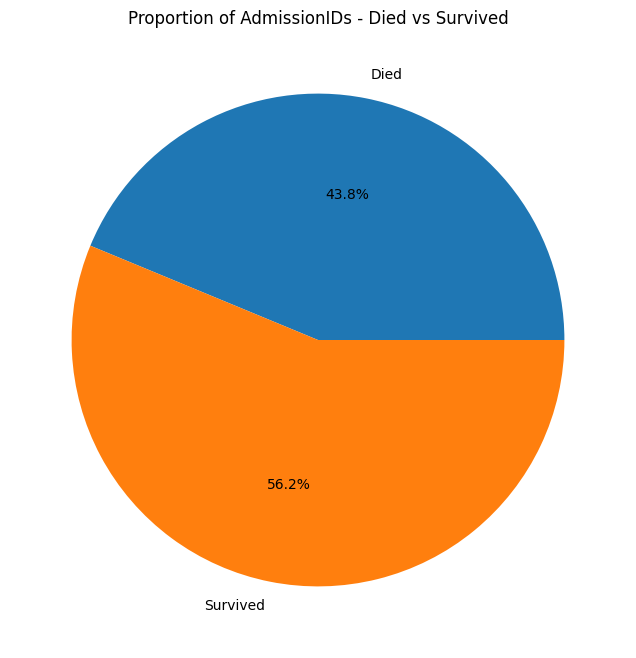

In [ ]:
# Count the number of unique AdmissionIDs where Death occurred
deaths_by_admission = result_105[result_105['Death'] == 1]['admissionid'].nunique()

# Count the number of unique AdmissionIDs where Death did not occur (optional for comparison)
survivors_by_admission = result_105[result_105['Death'] == 0]['admissionid'].nunique()

# Creating a pie chart to display the number of unique AdmissionIDs where Death occurred and didn't occur
plt.figure(figsize=(8, 8))
plt.pie([deaths_by_admission, survivors_by_admission], labels=['Died', 'Survived'], autopct='%1.1f%%')
plt.title('Proportion of AdmissionIDs - Died vs Survived')
plt.show()

In [ ]:
shock = adb.get_shock_patients(config_gbq)

Creating cohort shock at admission/first 24 hours (vasopressors/inotropes administered and lactate ≥2 mmol/l)...
Querying reason for admission...
Querying SOFA Cardiovascular: vasopressors/inotropes...
Processing SOFA Cardiovascular: vasopressors/inotropes...
Querying '/usr/local/lib/python3.10/dist-packages/amsterdamumcdb/sql/common/lactate.sql'...
Selecting patients with vasopressors and/or inotrope support (SOFA cardiovascular score 2 or higher), AND with lactate >= 2.0 mmol/l...


In [ ]:
#shock.head(5)

# unique_diagnoses = all['diagnosis'].unique()
# print(unique_diagnoses)

print(len(shock['patientid']))


5279


In [ ]:
number_of_patients = shock['patientid'].count()
number_of_unique_patientIDs = shock['patientid'].nunique()
print(f'The number of shock patient IDs is {number_of_patients} and unique shock ones {number_of_unique_patientIDs}')

The number of shock patient IDs is 5279 and unique shock ones 5115
